In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Generally these Ebay auction sales are for sports autographs. 

- The TestSet and TrainingSet are contain the whole dataset.

- The TrainingSubset and TestSubset contain the data with quantity sold equals 1 (auction leads to sell the product).

In [9]:
df1 = pd.read_csv(r"raw/TestSet.csv")

In [10]:
# To see the whole columns
pd.set_option('display.max_columns', None)

In [11]:
# What is happening with TestSet.csv
df1.head()

EbayID  QuantitySold   Price  PricePercent  StartingBidPercent  \
0  400476160084             0    0.99        0.5892              0.5892   
1  350785007664             0  119.00        1.1427              1.1427   
2  380629932508             1    1.75        1.0416              0.4464   
3  300896813674             1   66.00        0.6338              0.0000   
4  200918931232             0    9.99        0.5197              0.5197   

           SellerName  SellerClosePercent  Category  PersonID  StartingBid  \
0          harryjean0            0.128269     73409      8215         0.99   
1          rrsports23            0.116667     27260        34       119.00   
2             mojo640            0.531599     73409      8215         0.75   
3      mintsignatures            0.971014     27260        34         0.01   
4  realdealsignatures            0.187117     27285     28504         9.99   

   AvgPrice    EndDay  HitCount  AuctionAvgHitCount  ItemAuctionSellPercent  \
0    1.6800    Sunday         5                  78                       0   
1  104.1330    Monday         6                  77                       1   
2    1.6800  Thursday         8                  78                       0   
3  104.1330  Saturday       116                  77                       0   
4   19.2203  Thursday         2                  55                       0   

   SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  AuctionHitCountAvgRatio  \
0                 0.088608       0.42              3                        6   
1                 0.458494       1.67             50                       25   
2                 0.088608       0.30              2                        7   
3                 0.458494       0.80             49                       61   
4                 0.148515       0.28              2                        8   

   BestOffer  ReturnsAccepted  IsHOF  ItemListedCount  AuctionCount  \
0   0.064103                0      1                0            79   
1   0.077922                0      1                1          1819   
2   0.102564                0      0                0            79   
3   1.506494                0      1                1          1819   
4   0.036364                0      1                0           202   

   AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0                 7                2791                     358   
1               834                  60                       7   
2                 7                 269                     143   
3               834                 138                     134   
4                30                 326                      61   

   AuctionMedianPrice  
0                0.99  
1               77.00  
2                0.99  
3               77.00  
4               11.00

In [12]:
df1.shape

(37460, 28)

In [13]:
# What is happening with TrainingSubSet.csv
df2 = pd.read_csv(r"raw/TrainingSet.csv")
df2.head()

EbayID  QuantitySold  Price  PricePercent  StartingBidPercent  \
0  160983189073             1  27.25        1.4787              0.0537   
1  390549601720             1  43.00        1.4422              0.3350   
2  200901284676             1  11.00        0.5969              0.5426   
3  271162670857             0  10.00        0.5426              0.5426   
4  310611578768             0   9.99        1.9159              1.9159   

          SellerName  SellerClosePercent  Category  PersonID  StartingBid  \
0          petesandi            0.925926     73396      9174         0.99   
1         graphn4fun            0.990566     27278     11046         9.99   
2      hondo19461946            0.422131     73396      9174        10.00   
3        winemeyer45            0.245098     73396      9174        10.00   
4  chucksmemorabilia            0.295359     73396     17956         9.99   

   AvgPrice   EndDay  HitCount  AuctionAvgHitCount  ItemAuctionSellPercent  \
0   18.4273  Tuesday        57                  37                       0   
1   29.8150   Sunday        34                  84                       1   
2   18.4273   Monday        12                  37                       0   
3   18.4273   Monday        10                  37                       0   
4    5.2142   Monday        10                  50                       0   

   SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  AuctionHitCountAvgRatio  \
0                 0.499142       2.06             56                       29   
1                 0.358333       0.92             52                       55   
2                 0.499142       0.91             18                       21   
3                 0.499142       0.86             19                       26   
4                 0.321168       0.59             33                       53   

   BestOffer  ReturnsAccepted  IsHOF  ItemListedCount  AuctionCount  \
0   1.540541                0      1                1           583   
1   0.404762                0      0                0           120   
2   0.324324                0      1                1           583   
3   0.270270                0      0                1           583   
4   0.200000                0      1                0           137   

   AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0               291                  54                      50   
1                43                 106                     105   
2               291                 244                     103   
3               291                 102                      25   
4                44                 237                      70   

   AuctionMedianPrice  
0               12.26  
1               24.45  
2               12.26  
3               12.26  
4                3.02

In [14]:
df2.shape

(258588, 28)

So the total number of records οn this dataset (both Test and Training Set) is 296048.<br>
The training subset is the 0.12 (12%) percentage of the whole dataset.<br>
The testing subset is the 0.88(88%) percentage of the whole dataset.<br>

# What does the meaning of each value ? <br>

EbayID --> Unique ID of each and every auction. 

QuantitySold --> If the auction leads to sell. Represented by a 0 or 1.

Price --> Final price of the auction. If the listing does not result in a sale, the Price will be equal to the StartingBid.  

PricePercent --> tells you how the item’s final price compares to a reference “typical” price for similar auctions.<br>
    - This price can be computed by subtracting the 'Price' with 'AvgPrice'  (Price/AvgPrice).

StartingBidPercent --> The ratio of the StartingBid divided by sku’s AvgPrice. (StartingBid/AvgPrice)

SellerName --> The name of the person who put his autographed item for sale.

SellerClosePercent --> The ratio of the number of auctions resulting in sale for a seller divided <br> by total number of auctions the seller listed.

Category --> eBay autograph category by sport.

PersonID -->  ID of the person which is host auction.   

StartingBid --> Minimum bid for the auction.

AvgPrice --> The average sale price by sku (Stock Keeping Unit: μια μονάδα απογραφής. Υπάρχει μοναδικός αριθμός SKU για κάθε προιόν) 

EndDay --> The week days (Monday,Tuesday, Thursday ... Sunday) which happened the auction.

HitCount --> how many times the site of this specific auction has been seen (πόσες φορες έχουν δει την δημοπρασια όσο πιο πολλές τόσο πιο δημοοφιλές). 

AuctionAvgHitCount --> Avg hits for auctions of the same type or same product. 

ItemAuctionSellPercent --> The ratio of the number of auctions resulting in sale for a sku divided by total number of auctions the listed for the sku. 

SellerSaleAvgPriceRatio --> The ratio of the sale price realized by a specific seller divided by the average price of the same skus.  (SellerAvg/AvgPrice)

SellerAvg --> Average Price value for this specific seller (not for this specific product bur for each one that sold by the seller).  

SellerItemAvg --> Average quantity sold by this seller this specific item. 

AuctionHitCountAvgRatio --> Ratio of hits for a specific auction related to average hits for similar products. (HitCount/AuctionAvgHitCount)

BestOffer --> Best bid on auction.

ReturnsAccepted --> Whether the seller accepts returns.

IsHOF --> IsHOF	Whether the player in their sport’s Hall of Fame. 

ItemListedCount --> Total number of times this SKU has been listed on eBay.Sellers may list the same SKU multiple times (different auctions). ItemListedCount is the total count of all those listings.

AuctionCount --> The number of auctions listed by sku. how many times this product has been listed in this dataset.

AuctionSaleCount --> How many auctions have been completed with a sale. (AuctionSaleCount< AuctionCount) -----------

SellerAuctionCount -->   Πόσα auctions έχει δημιουργήσει ο συγκεκριμένος seller.-------------

SellerAuctionSaleCount --> 	Total number of auctions by this seller that resulted in a sale.

AuctionMedianPrice -->  Median sale price of auctions for the same SKU (PersonID).(median is less sensitive to outliers).

In [15]:
#Testing Subset
df3 = pd.read_csv(r'raw/TestSubset.csv')
df3.head()

EbayID  Price  PricePercent  StartingBidPercent       SellerName  \
0  310660463424   7.99        0.9038              0.9038        det.tigss   
1  300896439219   0.99        1.0000              1.0000          sprad22   
2  190830497666  14.99        0.2814              0.2814     phillyguy856   
3  310659262203  10.50        0.5070              0.2892            tmt51   
4  221218670032  43.88        0.8970              0.0202  rochestersports   

   SellerClosePercent  Category  PersonID  StartingBid  AvgPrice     EndDay  \
0            0.152542     73396       303         7.99    8.8400     Friday   
1            0.107143        53       343         0.99    0.9900     Friday   
2            0.380952     27260       412        14.99   53.2615   Thursday   
3            0.333333     27265       412         5.99   20.7066     Friday   
4            0.995726     27277       429         0.99   48.9142  Wednesday   

   QuantitySold  HitCount  AuctionAvgHitCount  Authenticated  \
0             1         4                   3              0   
1             1        11                  11              0   
2             1        25                 102              0   
3             1        67                  63              0   
4             1        32                  84              0   

   ItemAuctionSellPercent  SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  \
0                0.600000                     0.52          6             12   
1                1.000000                     0.52          2              4   
2                0.411765                     0.45          8             18   
3                0.321429                     1.27         43             46   
4                0.904762                     0.88         78             89   

   AuctionHitCountAvgRatio  BestOffer  ReturnsAccepted  IsHOF  BidCount  \
0                 1.333333          0                0      0         1   
1                 1.000000          0                0      0         1   
2                 0.245098          0                0      0         1   
3                 1.063492          0                1      0         2   
4                 0.380952          0                1      0        10   

   AuctionCount  AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0             5                 3                  59                       9   
1             1                 1                 616                      66   
2            51                21                  84                      32   
3            28                 9                 204                      68   
4            21                19                1638                    1631   

   PriceBuckets  AuctionMedianPrice  IsInMedianRatio10Percent  \
0            10                7.99                         1   
1             5                0.99                         1   
2            15               26.00                         0   
3            15               15.25                         0   
4            45               45.88                         1   

   IsInMedianRatio20Percent  IsInMedianRatio25Percent  
0                         1                         1  
1                         1                         1  
2                         0                         0  
3                         0                         0  
4                         1                         1

In [16]:
df3.shape

(9392, 33)

In [17]:
#Training subset
df4 = pd.read_csv(r'raw/TrainingSubset.csv')
df4.head()

EbayID  Price  PricePercent  StartingBidPercent      SellerName  \
0  350752140634   0.01        0.0038              0.0038     inkcasualty   
1  380610306320   5.55        1.0000              0.0018   prettysam1012   
2  151033305503   0.99        0.6832              0.6832      harryjean0   
3  350756072255   0.06        1.0000              0.1666     inkcasualty   
4  121072982322   0.99        0.2826              0.2826  lock-em-up-bob   

   SellerClosePercent  Category  PersonID  StartingBid  AvgPrice  EndDay  \
0            0.725377     73396        33         0.01    2.5808  Friday   
1            0.563847     27260        39         0.01    5.5500  Sunday   
2            0.128269     73396        39         0.99    1.4490  Sunday   
3            0.725377     73396       182         0.01    0.0600  Friday   
4            0.605851     73396       265         0.99    3.5025  Monday   

   QuantitySold  HitCount  AuctionAvgHitCount  Authenticated  \
0             1         6                  58              0   
1             1        16                   9              0   
2             1         8                  97              0   
3             1         4                  15              0   
4             1         4                  28              0   

   ItemAuctionSellPercent  SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  \
0                0.227723                     0.37          1              4   
1                1.000000                     0.94         14             15   
2                0.038462                     0.42          3              6   
3                0.076923                     0.37          1              4   
4                0.042254                     0.91          7              9   

   AuctionHitCountAvgRatio  BestOffer  ReturnsAccepted  IsHOF  BidCount  \
0                 0.103448          0                0      0         1   
1                 1.777778          0                1      0         7   
2                 0.082474          0                1      0         1   
3                 0.266667          0                0      0         2   
4                 0.142857          0                1      0         1   

   AuctionCount  AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0           101                23                1726                    1252   
1             1                 1                 603                     340   
2            26                 1                2791                     358   
3            13                 1                1726                    1252   
4            71                 3                1880                    1139   

   PriceBuckets  AuctionMedianPrice  IsInMedianRatio10Percent  \
0             5                1.00                         0   
1            10                5.55                         1   
2             5                0.99                         1   
3             5                0.06                         1   
4             5                0.99                         1   

   IsInMedianRatio20Percent  IsInMedianRatio25Percent  
0                         0                         0  
1                         1                         1  
2                         1                         1  
3                         1                         1  
4                         1                         1

In [18]:
df4.shape

(79732, 33)

Extra columns in Subset 's data:

Authenticated: Whether the received third party authentication. Represented by a 0 or 1. 

Price Bucket: PriceBuckets is a categorical grouping of prices into ranges (bins).

IsInMedianRatio10Percent: if the item’s sale price is within ±10% of the AuctionMedianPrice.

IsInMedianRatio10Percent: if the item’s sale price is within ±20% of the AuctionMedianPrice.

IsInMedianRatio10Percent: if the item’s sale price is within ±25% of the AuctionMedianPrice.

As we can see on this dataset maybe there will be a problem which is called the "Curse Of dimensionality".<br>
The curse of dimensionality is a problem that arises when we are working with a lot of data having<br> multiple features or we can say it as high dimensional data. The dimension of the data means the number<br> of features or columns in our dataset.

On this dataset we have:
- 28 dimensions for the 'Full dataset'

- 33 dimensions for the Subsets dataset.

On these both datasets we can drop the categories EbayID, SellerName, and PersonID as they don 't give predictive information.<br>
Apart from that QuantitySold category is 1 for both TrainingSubset and TestSubset (so we drop this column too from Subsets set).

# First Task
I will work on the subset of the data corresponding to auctions that resulted in a sale in order to build a regression model for predicting the final auction price.

# Assumptions of Multiple Regression

- Linearity: Relationship between dependent and independent variables should be linear.

- Homoscedasticity: Variance of errors should remain constant across all levels of independent variables.

- No Multicollinearity: Independent variables should not be highly correlated.

- Multivariate Normality: Residuals should follow a normal distribution.

In [19]:
# First we will combine the Training and Test Subset
df_sub = pd.concat([df3,df4],ignore_index=True, sort=False)
df_sub.head()

EbayID  Price  PricePercent  StartingBidPercent       SellerName  \
0  310660463424   7.99        0.9038              0.9038        det.tigss   
1  300896439219   0.99        1.0000              1.0000          sprad22   
2  190830497666  14.99        0.2814              0.2814     phillyguy856   
3  310659262203  10.50        0.5070              0.2892            tmt51   
4  221218670032  43.88        0.8970              0.0202  rochestersports   

   SellerClosePercent  Category  PersonID  StartingBid  AvgPrice     EndDay  \
0            0.152542     73396       303         7.99    8.8400     Friday   
1            0.107143        53       343         0.99    0.9900     Friday   
2            0.380952     27260       412        14.99   53.2615   Thursday   
3            0.333333     27265       412         5.99   20.7066     Friday   
4            0.995726     27277       429         0.99   48.9142  Wednesday   

   QuantitySold  HitCount  AuctionAvgHitCount  Authenticated  \
0             1         4                   3              0   
1             1        11                  11              0   
2             1        25                 102              0   
3             1        67                  63              0   
4             1        32                  84              0   

   ItemAuctionSellPercent  SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  \
0                0.600000                     0.52          6             12   
1                1.000000                     0.52          2              4   
2                0.411765                     0.45          8             18   
3                0.321429                     1.27         43             46   
4                0.904762                     0.88         78             89   

   AuctionHitCountAvgRatio  BestOffer  ReturnsAccepted  IsHOF  BidCount  \
0                 1.333333          0                0      0         1   
1                 1.000000          0                0      0         1   
2                 0.245098          0                0      0         1   
3                 1.063492          0                1      0         2   
4                 0.380952          0                1      0        10   

   AuctionCount  AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0             5                 3                  59                       9   
1             1                 1                 616                      66   
2            51                21                  84                      32   
3            28                 9                 204                      68   
4            21                19                1638                    1631   

   PriceBuckets  AuctionMedianPrice  IsInMedianRatio10Percent  \
0            10                7.99                         1   
1             5                0.99                         1   
2            15               26.00                         0   
3            15               15.25                         0   
4            45               45.88                         1   

   IsInMedianRatio20Percent  IsInMedianRatio25Percent  
0                         1                         1  
1                         1                         1  
2                         0                         0  
3                         0                         0  
4                         1                         1

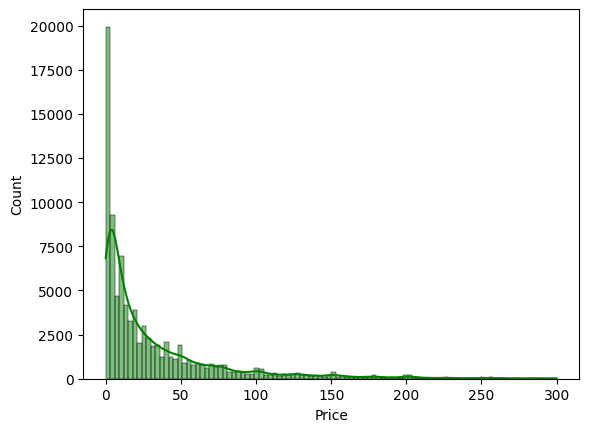

In [63]:
# Distribution of Price (dependent variable)
sns.histplot(df_sub['Price'], color='g', bins=100,kde = True);

The dependent variable is not normally distributed.

In [20]:
# Take a copy of the main (subset) data
df_sub = df_sub.copy()

In [21]:
# Drop the columns which are not give further information (EbayID, SellerName, and PersonID)
df_sub = df_sub.drop(columns=['EbayID','SellerName','PersonID','QuantitySold'],axis=1)

In [22]:
# On Testing and Training Subset 
# The best offer category has only zero values
df_sub["BestOffer"].value_counts()

BestOffer
0    89124
Name: count, dtype: int64

In [23]:
# Drop the BestOffer column which has only zero values
df_sub = df_sub.drop(columns=["BestOffer"],axis=1)

In [24]:
# Check if the data concatenated
df_sub.shape

(89124, 28)

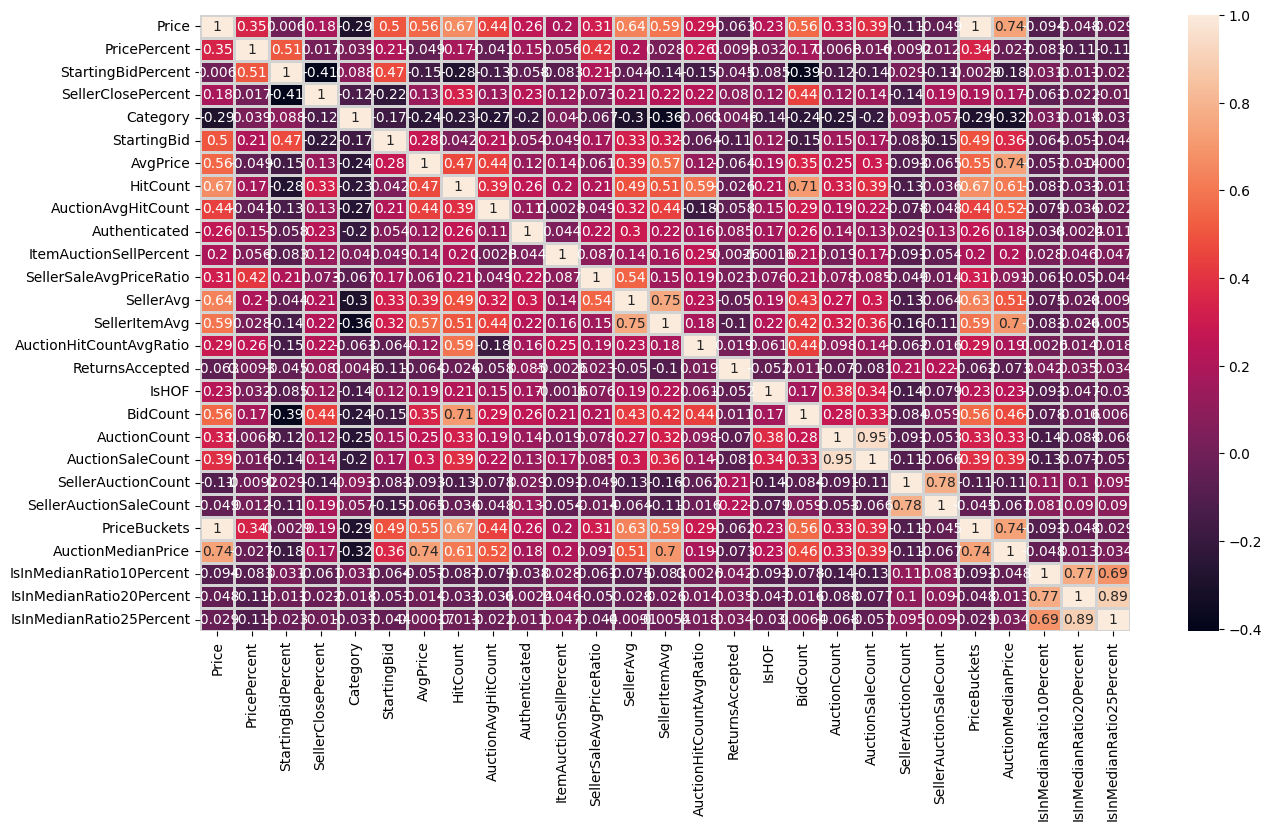

In [25]:
# Display Correlation matrix only for the numerical variables (only EndDay excluded)
plt.figure(figsize = (15, 8))
sns.heatmap(df_sub.select_dtypes(include='number').corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

- Multicollinearity is a condition that may occur during regression analysis where two or more independent variables are highly correlated with one another.<br> While the strength of a regression model improves with increasing correlation between the predictors and the dependent variable, the presence of strong correlations among the <br> independent variables can have a detrimental effect on model explainability and predictor standard error.

- A quick way to identify potential multicollinearity is to review the correlation matrix for the predictor variables.<br> A correlation coefficient with an absolute value > 0.7 typically indicates a strong correlation between predictor variables

# Pearson 's correlation outcome.
- PriceBuckets and Price have the biggest correlation = +1. 

- SellerAvg and SellerItemAvg are highly (positive) correlated (correlation = + 0.75).

- AuctionCount and AuctionSaleCount are highly (positive) correlated (correlation = + 0.95).

- IsInMedianRatio20Percent and	IsInMedianRatio25Percent are highly (positive) correlated (correlation = + 0.89).

- IsInMedianRatio10Percent and	IsInMedianRatio20Percent are highly (positive) correlated (correlation = + 0.77).

- IsInMedianRatio10Percent and	IsInMedianRatio25Percent are highly (positive) correlated (correlation = + 0.69).

- PriceBuckets and AuctionMedianPrice are highly (positive) correlated (correlation = + 0.74).

- AuctionMedianPrice and AvgPrice are highly (positive) correlated (correlation = + 0.74).

- BidCount and Hitcount are highly (positive) correlated (correlation = + 0.71).

- SellerAuctionSaleCount and SellerAuctionCount highly (positive) correlated (correlation = + 0.74).

- SellerItemAvg and AuctionMedianPrice highly (positive) correlated (correlation = + 0.7).

The presence of these correlations suggest that multicollinearity among some predictors may be present but further analysis is needed.<br> That 's why i 'll use variance inflation factor.

# Variance Inflation Factors (VIF)
VIF = 1: No correlation between the predictor variable and other variables. <br>
1 < VIF < 5: Moderate correlation; generally acceptable. <br>
VIF ≥ 5: Indicates potentially problematic multicollinearity.<br>
VIF ≥ 10: Indicates serious multicollinearity.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_sub.select_dtypes(include='number')
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

                     feature          VIF
22              PriceBuckets  1345.528575
0                      Price  1289.397040
18              AuctionCount    20.051670
19          AuctionSaleCount    19.676789
25  IsInMedianRatio20Percent     9.830031
13             SellerItemAvg     8.663001
26  IsInMedianRatio25Percent     8.247862
12                 SellerAvg     7.865771
7                   HitCount     7.610632
3         SellerClosePercent     7.180447
23        AuctionMedianPrice     7.064469
11   SellerSaleAvgPriceRatio     6.786727
10    ItemAuctionSellPercent     5.969058
1               PricePercent     5.596466
17                  BidCount     5.332951
8         AuctionAvgHitCount     5.113811
21    SellerAuctionSaleCount     4.846641
4                   Category     4.594203
14   AuctionHitCountAvgRatio     4.585152
20        SellerAuctionCount     4.492339
2         StartingBidPercent     4.219058
5                StartingBid     3.460827
24  IsInMedianRatio10Percent     3

As we can see from the above the Independent variables:
- PriceBuckets VIF = 1345.528575
- AuctionCount VIF = 20.051670
- AuctionSaleCount VIF = 19.676789

These indicates extreme multicollinearity and these features are almost linearly dependent on others. <br>
In order to improve model 's interpretability and stability in and i will remove only PriceBuckets and AuctionCount and then i will recalculate the vif.

In [27]:
# Drop the multicollinearity variables
df_sub = df_sub.drop(columns=["PriceBuckets",'AuctionCount'],axis=1)

In [28]:
# Calculate again the VIF.
X = df_sub.select_dtypes(include='number')
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

                     feature       VIF
23  IsInMedianRatio20Percent  9.829794
0                      Price  8.997769
13             SellerItemAvg  8.603904
24  IsInMedianRatio25Percent  8.245137
12                 SellerAvg  7.848074
7                   HitCount  7.579608
21        AuctionMedianPrice  7.038010
3         SellerClosePercent  6.736821
11   SellerSaleAvgPriceRatio  6.719231
1               PricePercent  5.589240
10    ItemAuctionSellPercent  5.337125
17                  BidCount  5.323311
8         AuctionAvgHitCount  5.020466
20    SellerAuctionSaleCount  4.841193
14   AuctionHitCountAvgRatio  4.553780
19        SellerAuctionCount  4.456359
2         StartingBidPercent  4.200439
4                   Category  4.190284
5                StartingBid  3.452925
22  IsInMedianRatio10Percent  3.386018
15           ReturnsAccepted  3.264144
6                   AvgPrice  3.057832
18          AuctionSaleCount  2.086466
16                     IsHOF  1.599194
9              Authentica

So now the variance inflation factor is < 10 for each numeric variable.

# EDA

In [29]:
# Extracting discrete_numerical and continuous_numerical , categorical
discrete_numerical = [
    "Authenticated",
    "ReturnsAccepted",
    "IsHOF",
    "IsInMedianRatio10Percent",
    "IsInMedianRatio20Percent",
    "IsInMedianRatio25Percent",
]

continuous_numerical = [
    "Price",
    "PricePercent",
    "StartingBidPercent",
    "SellerClosePercent",
    "HitCount",
    "AvgPrice",
    "AuctionAvgHitCount",
    "ItemAuctionSellPercent",
    "SellerSaleAvgPriceRatio",
    "AuctionHitCountAvgRatio",
    "AuctionMedianPrice",
    "SellerAvg",
    "SellerItemAvg",
    'AuctionSaleCount',
    "SellerAuctionCount",
    "StartingBid",
    "SellerAuctionSaleCount"
]

categorical = [
    "EndDay",
    "Category",
    "BidCount"
]

In [30]:
print(len(discrete_numerical))
print(len(continuous_numerical))
print(len(categorical))

6
17
3


# Step 1: Univariate Analysis

- Categorical Variables

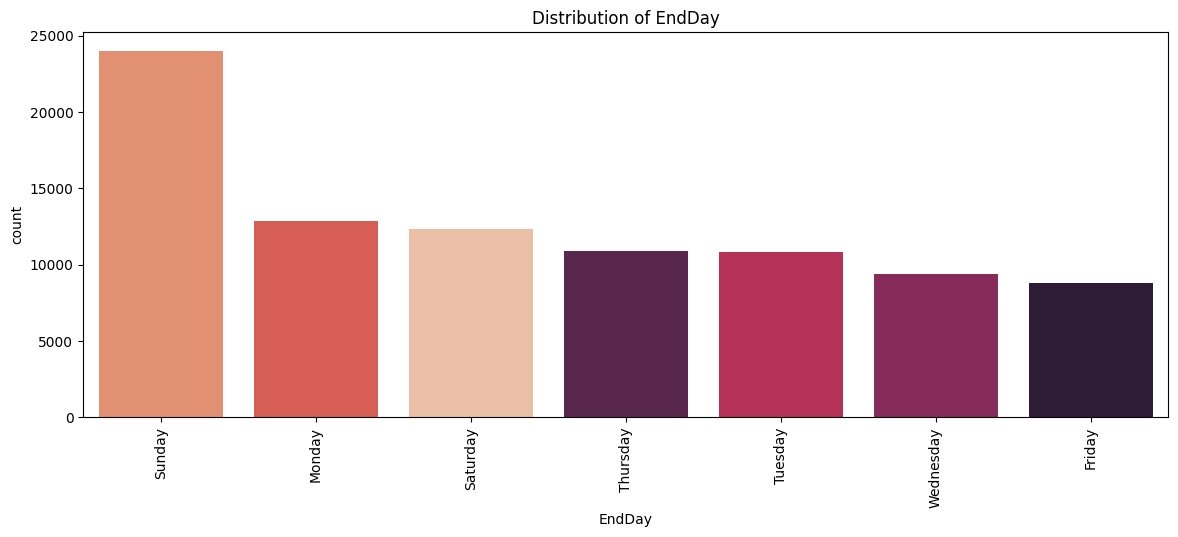

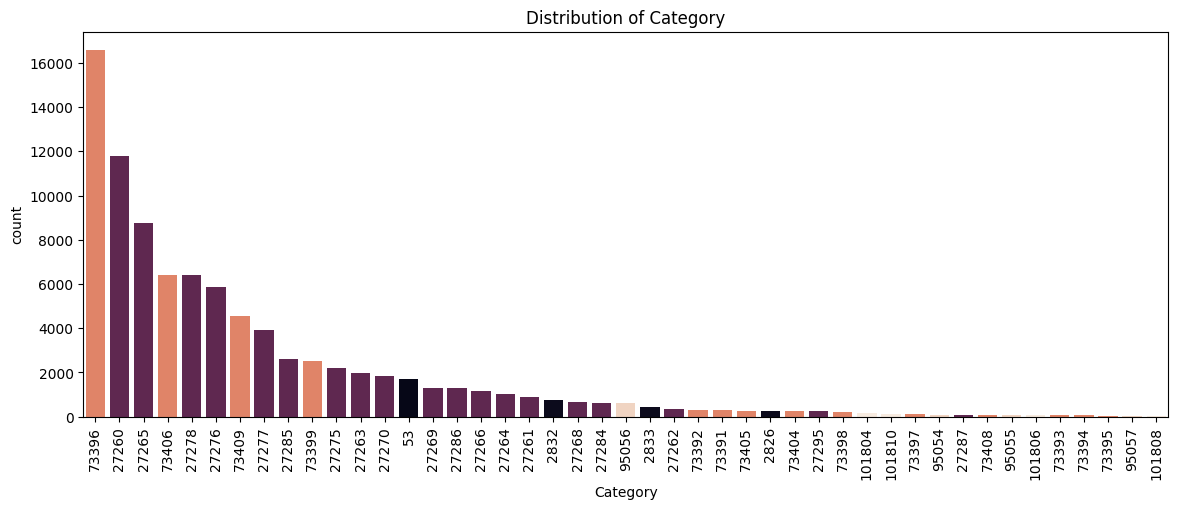

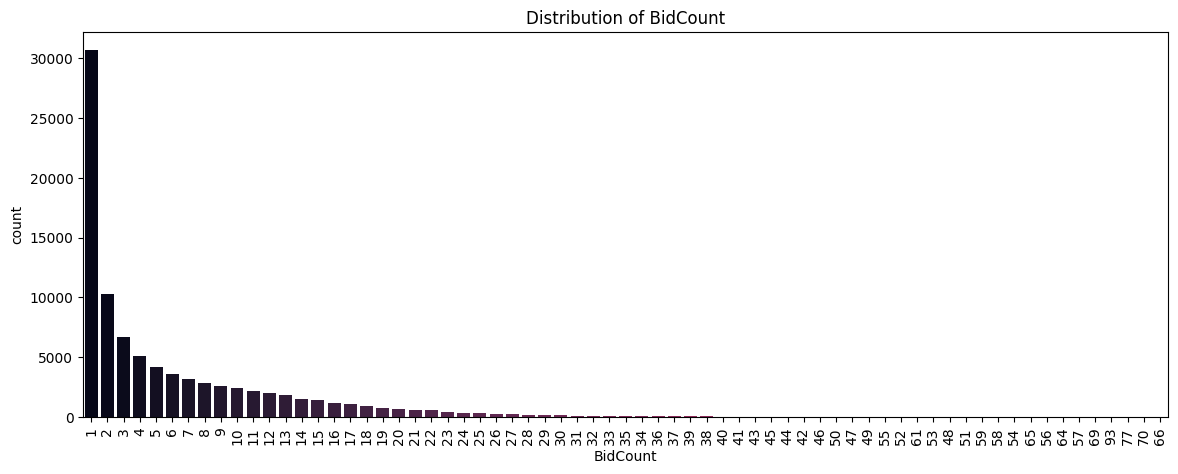

In [31]:
# Let 's plot the categorical variables
def categ(col):
    order = df_sub[col].value_counts().index
    plt.figure(figsize=(14, 5))
    sns.countplot(x=col, data=df_sub, order=order, palette='rocket',legend=False,hue=col)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    
for i in categorical:
    categ(i)

- Discrete variables

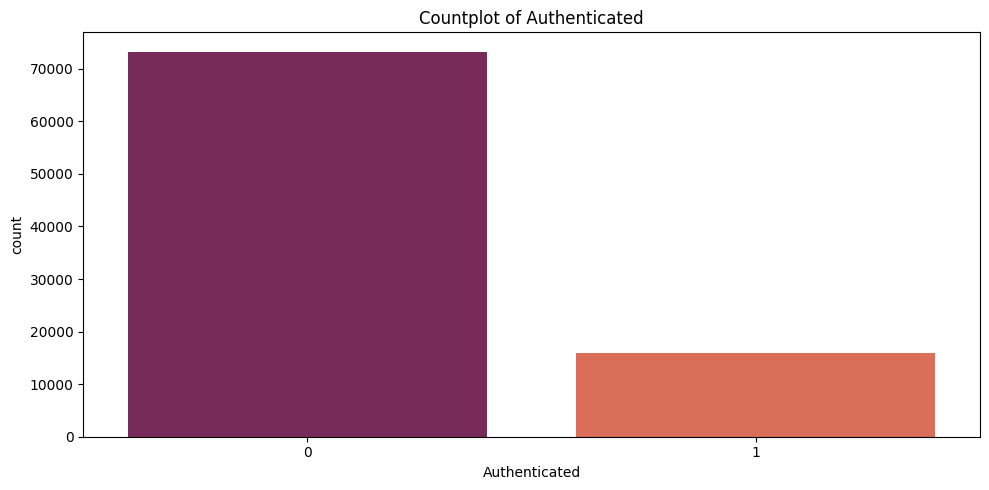

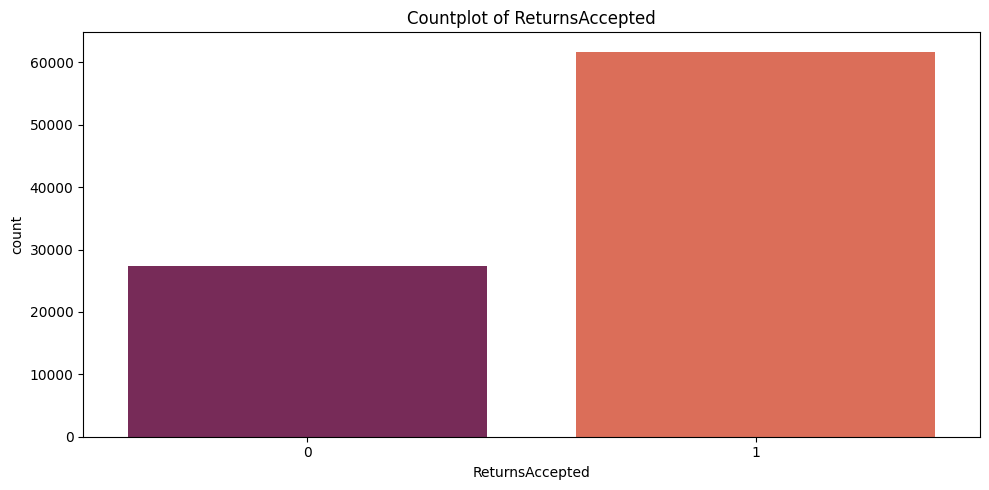

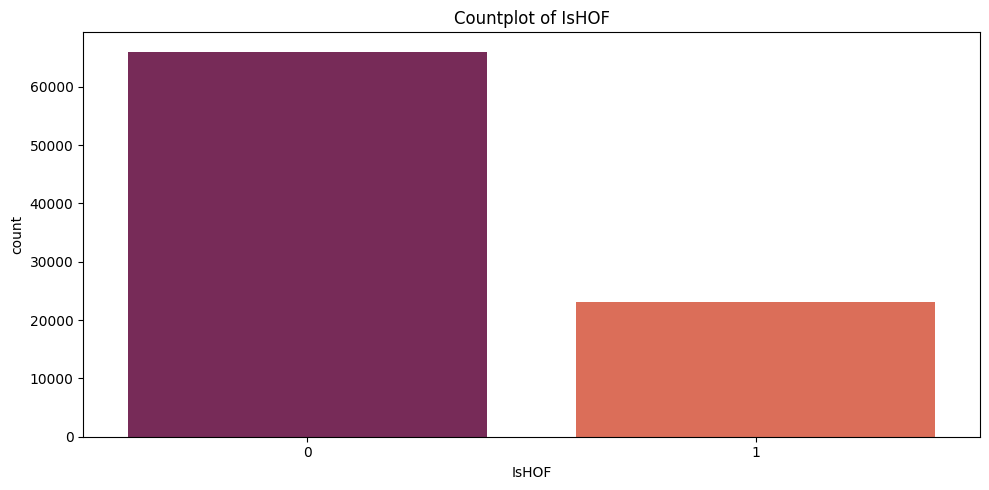

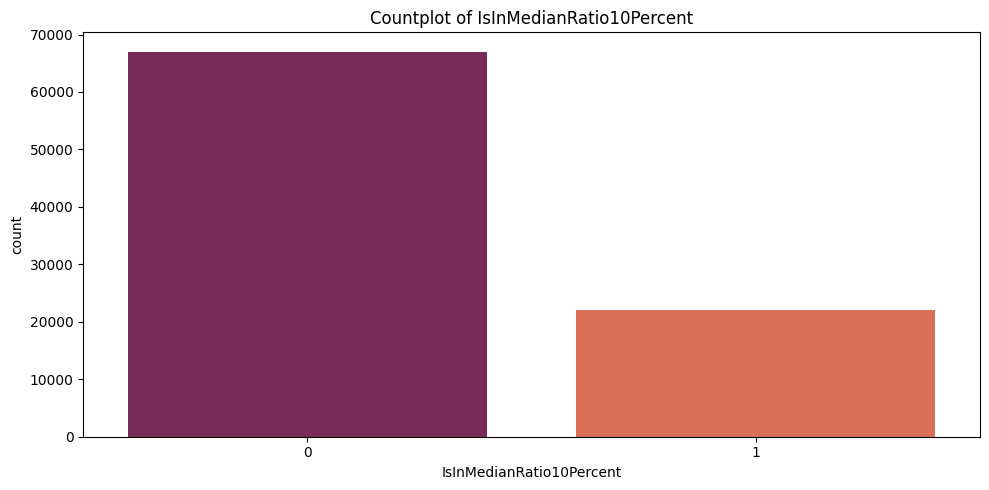

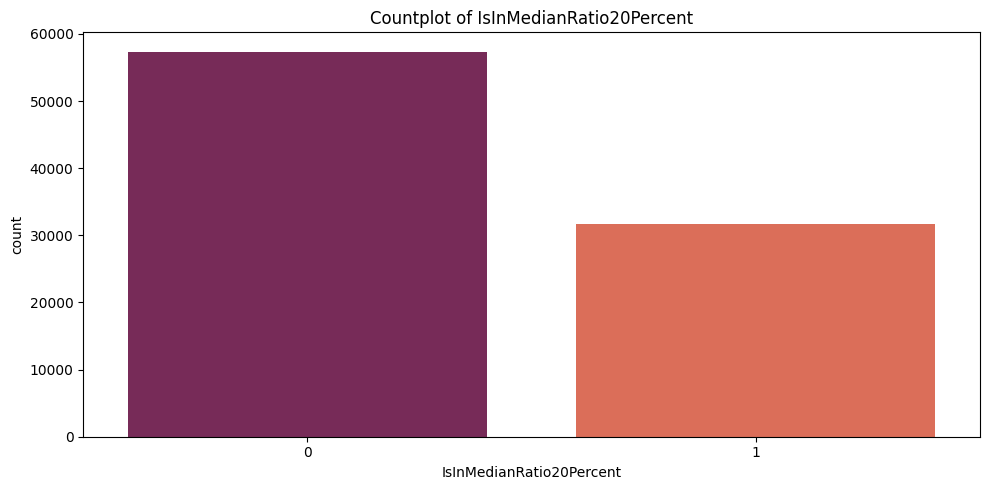

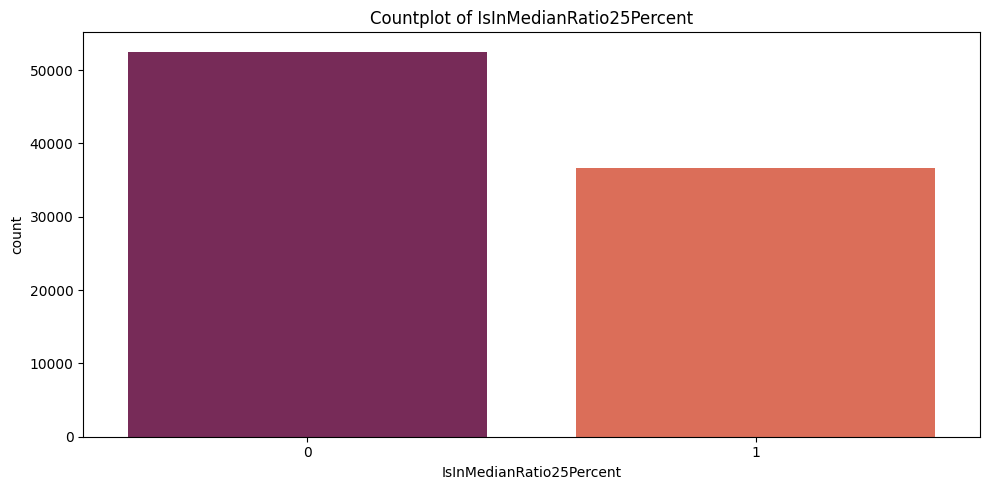

In [32]:
# Looking at categorical / discrete columns
def plot_count(df, column, palette='rocket'):
    plt.figure(figsize=(10,5))
    sns.countplot(x=column, data=df, palette=palette,hue = column,legend=False)
    plt.title(f"Countplot of {column}")
    plt.tight_layout()
    plt.show()

for col in discrete_numerical:   # loop over column names
    print('=============='*3)
    plot_count(df_sub, col)      # pass both DataFrame and column
    print('=============='*3)


- Continuous numerical variables

In [ ]:
def plot_hist_box(col, color="mediumspringgreen", figsize=(20,13)):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)

    # Histogram + KDE
    sns.histplot(data=df_sub, x=col, kde=True, color=color, ax=axes[0])
    axes[0].set_title(f"{col} Histogram", fontsize=18)
    axes[0].set_xlabel(None)

    # Boxplot
    sns.boxplot(data=df_sub, x=col, color=color, ax=axes[1])
    axes[1].set_title(f"{col} Boxplot", fontsize=18)
    axes[1].set_xlabel(None)

    plt.tight_layout()
    plt.show()

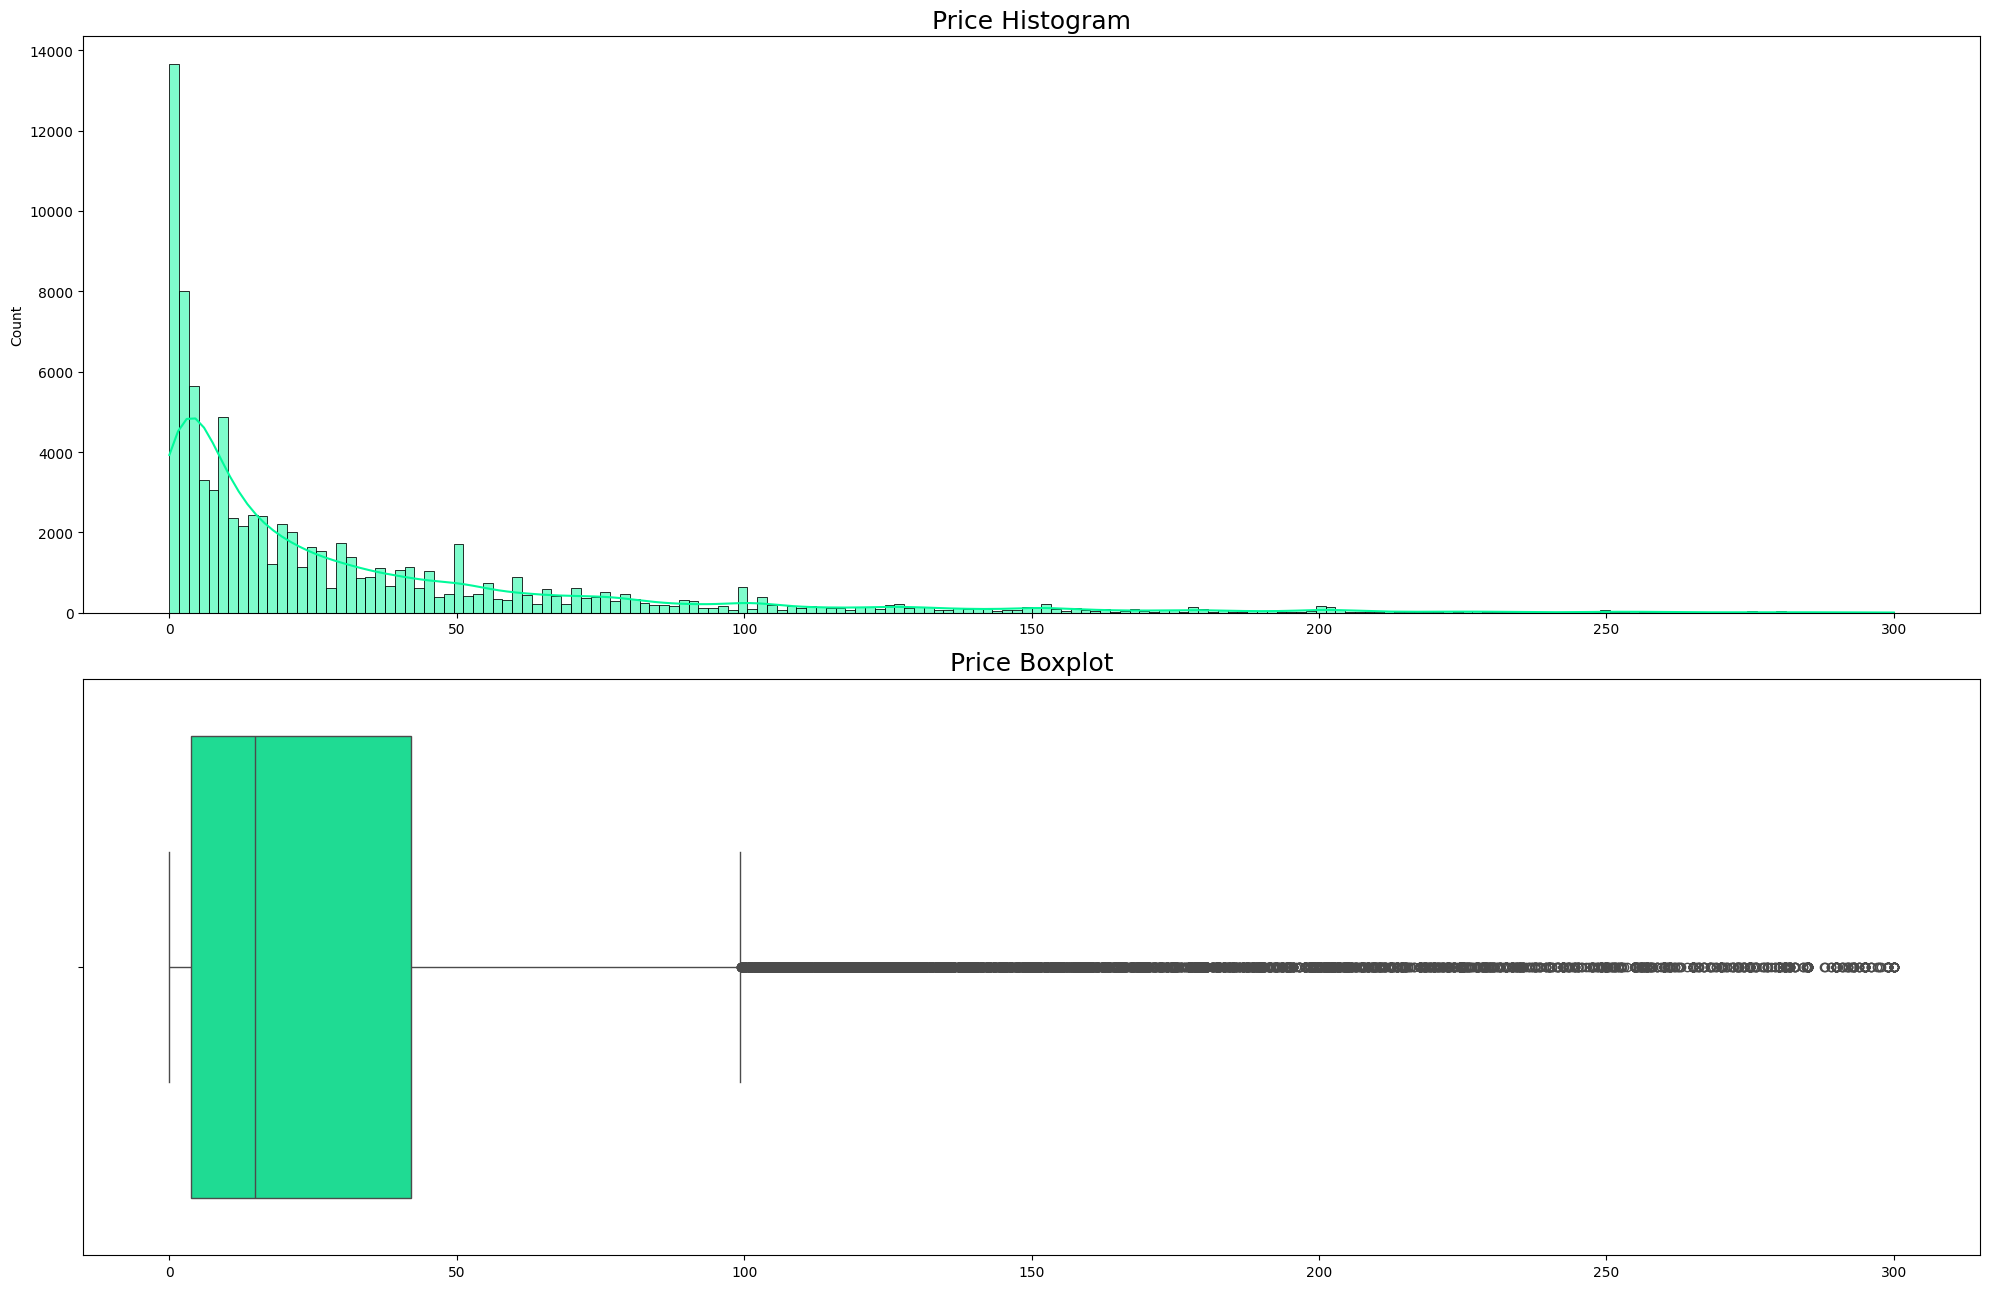

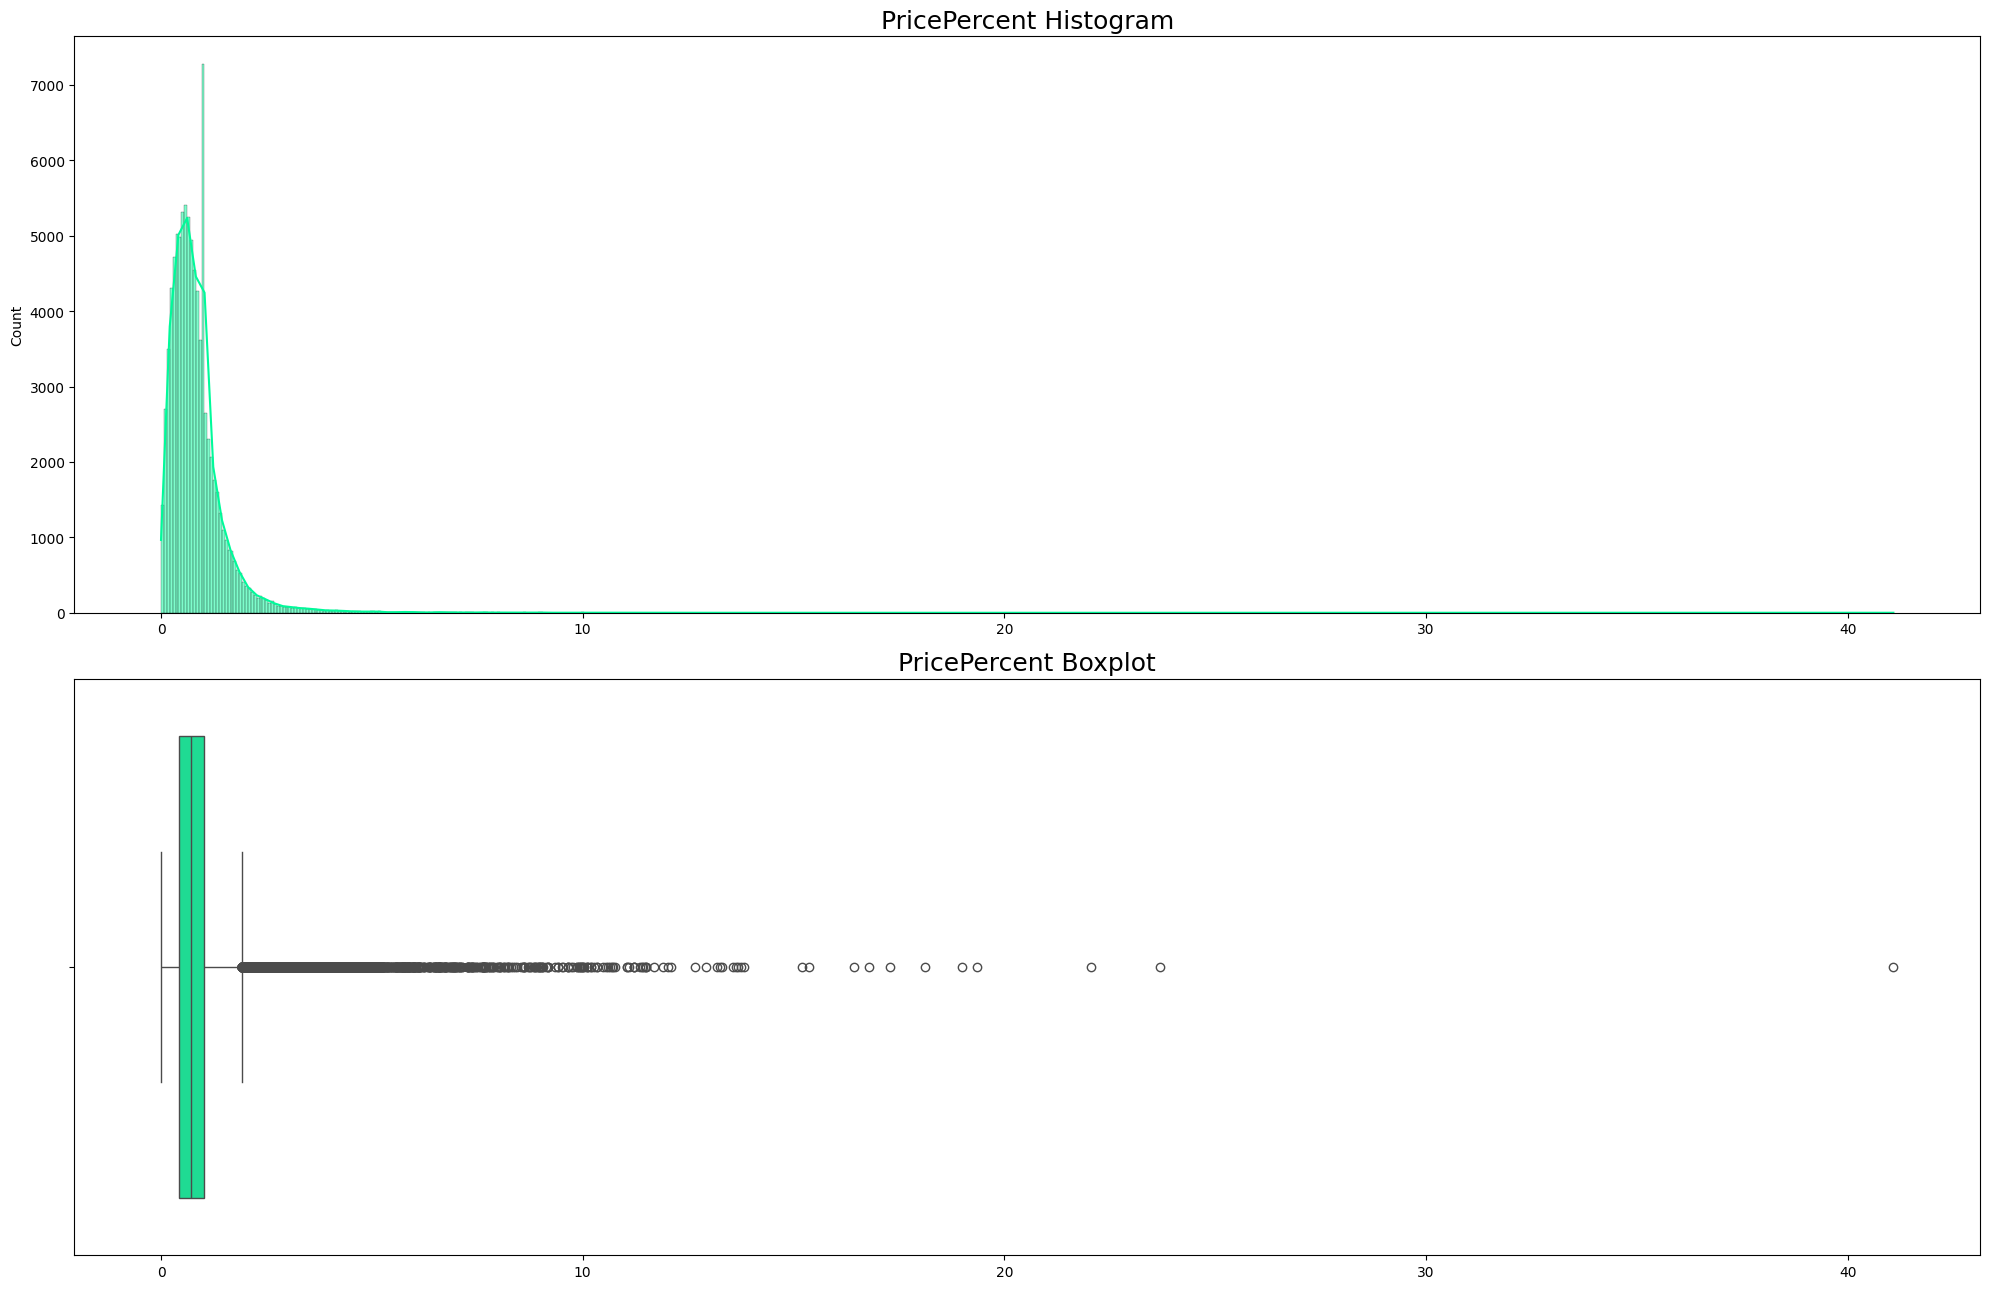

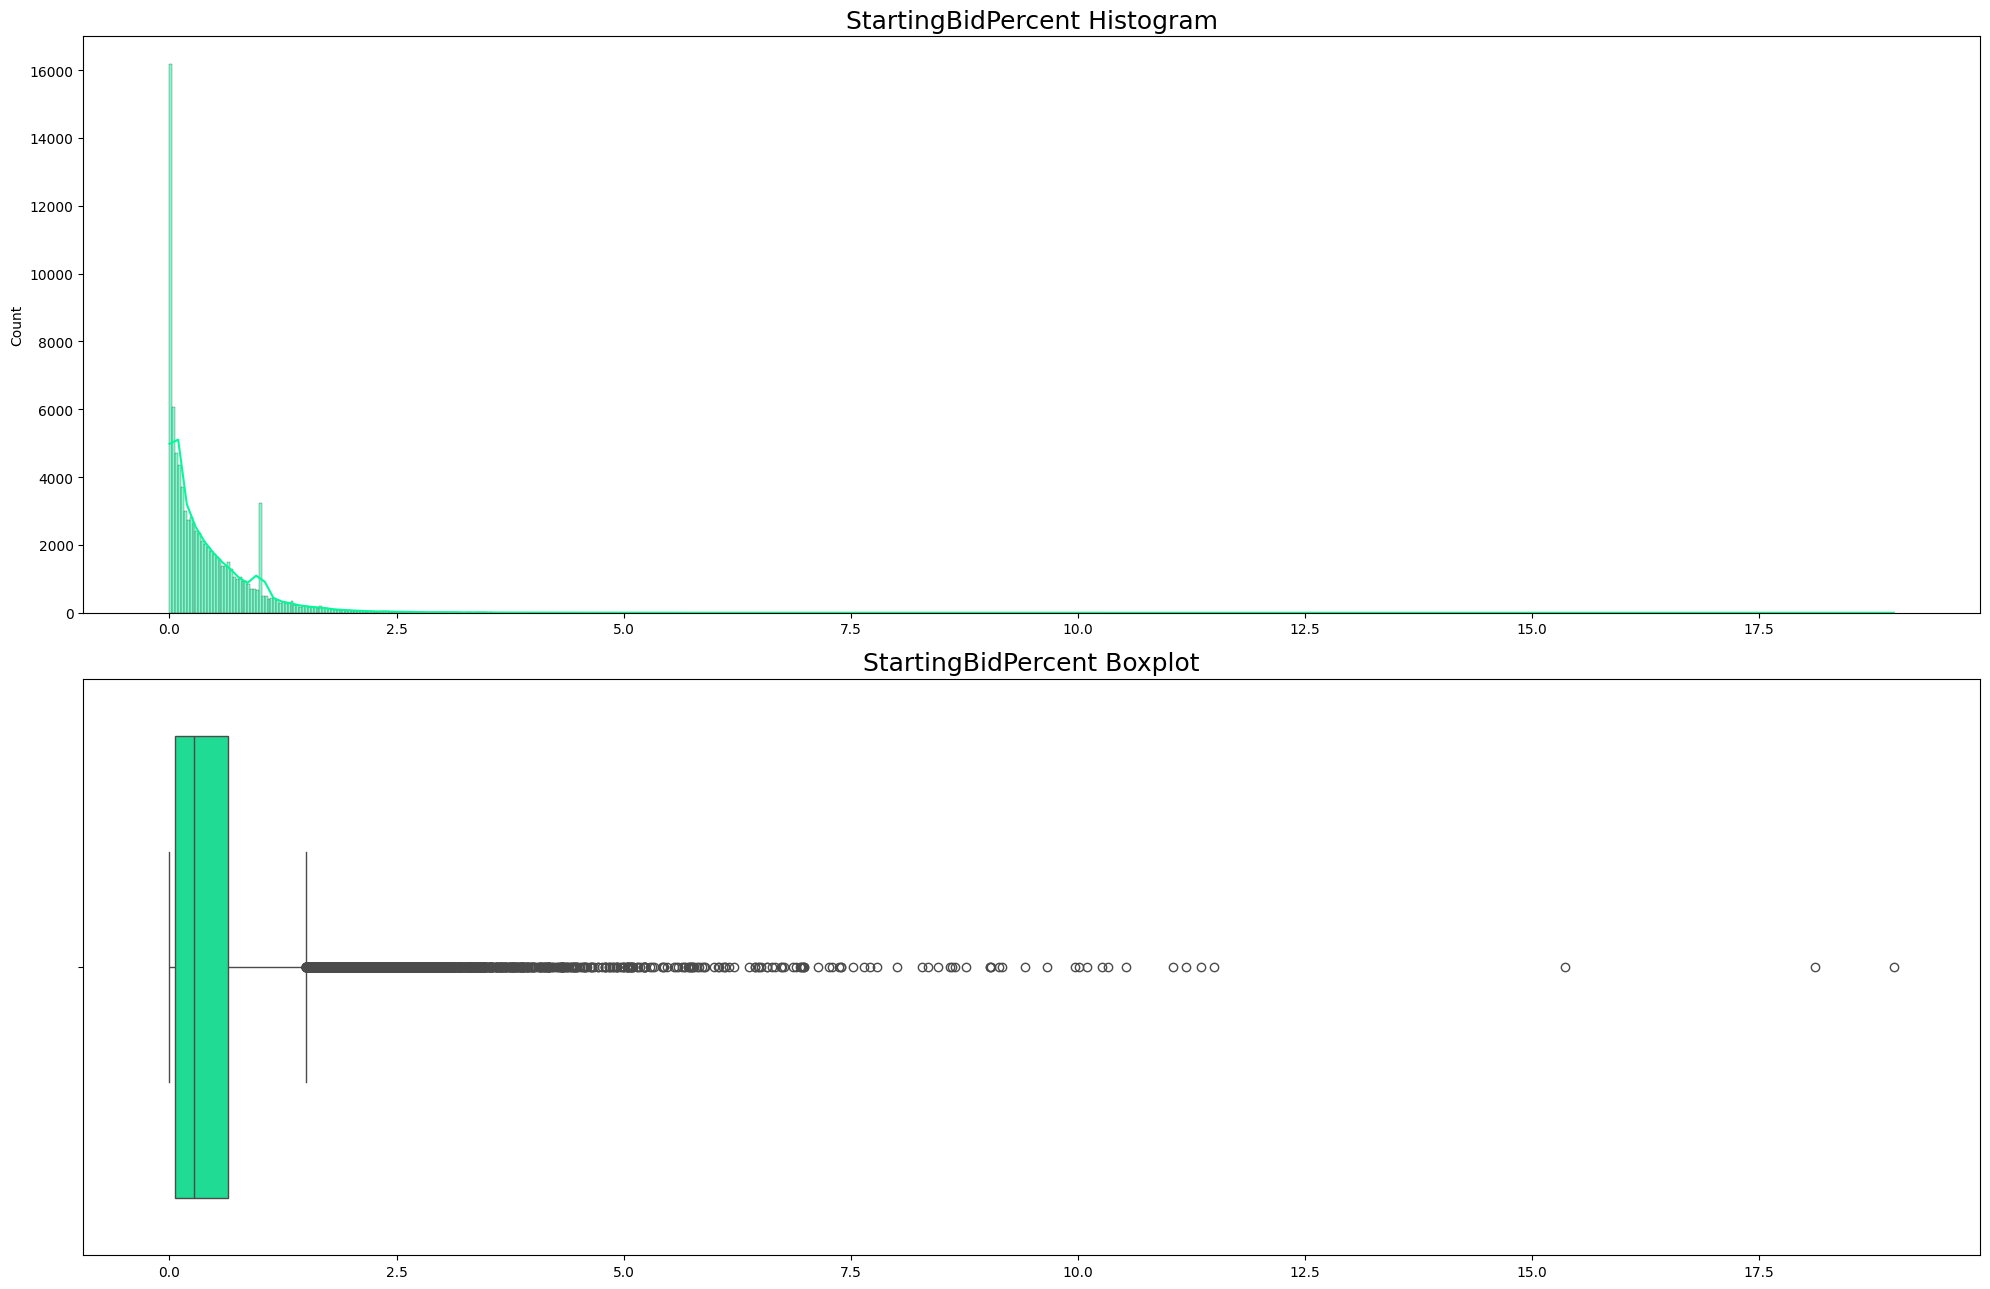

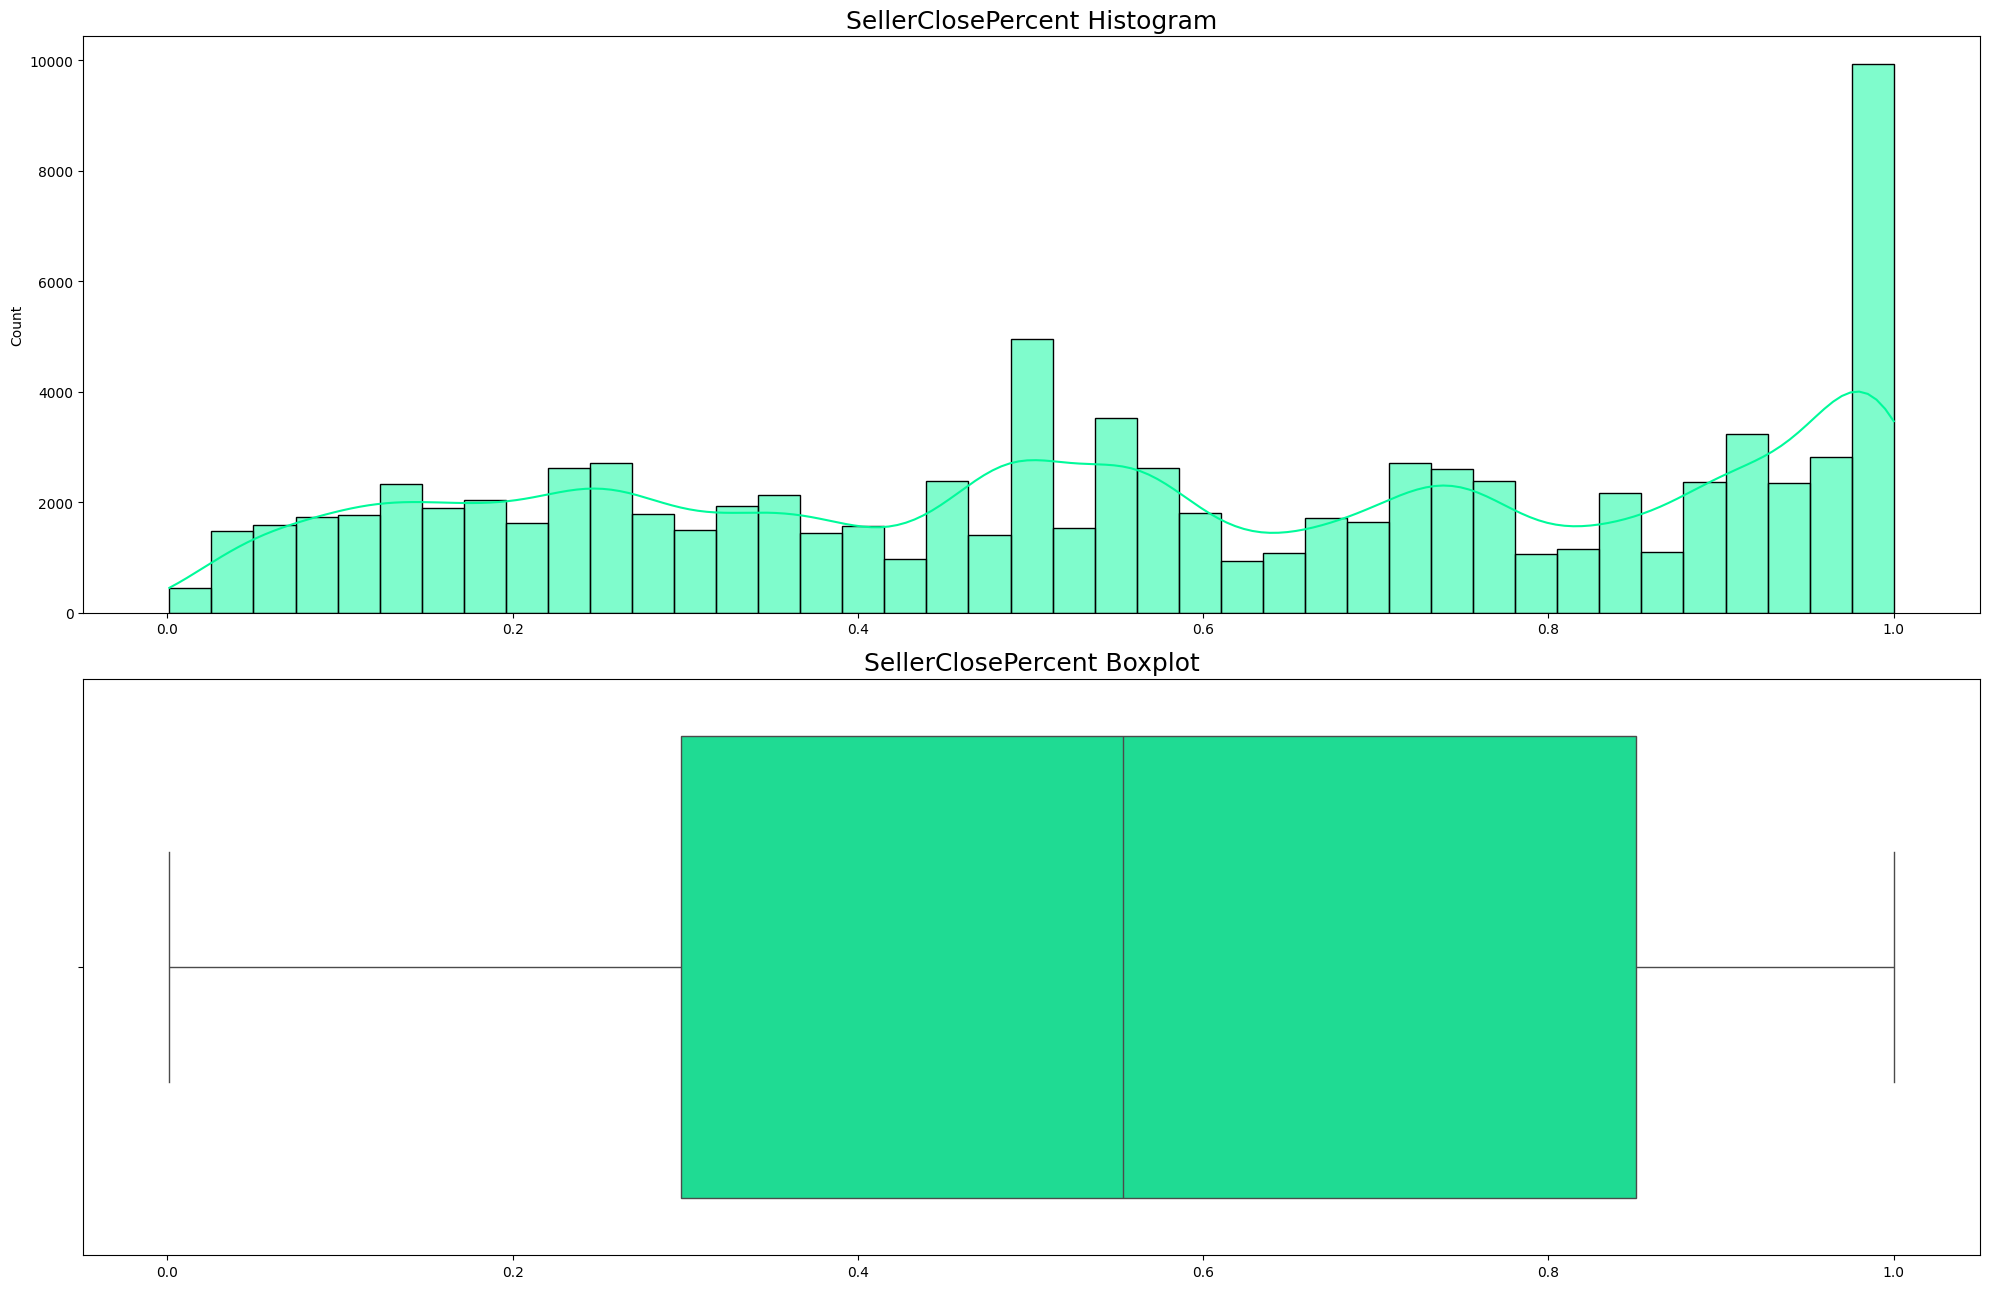

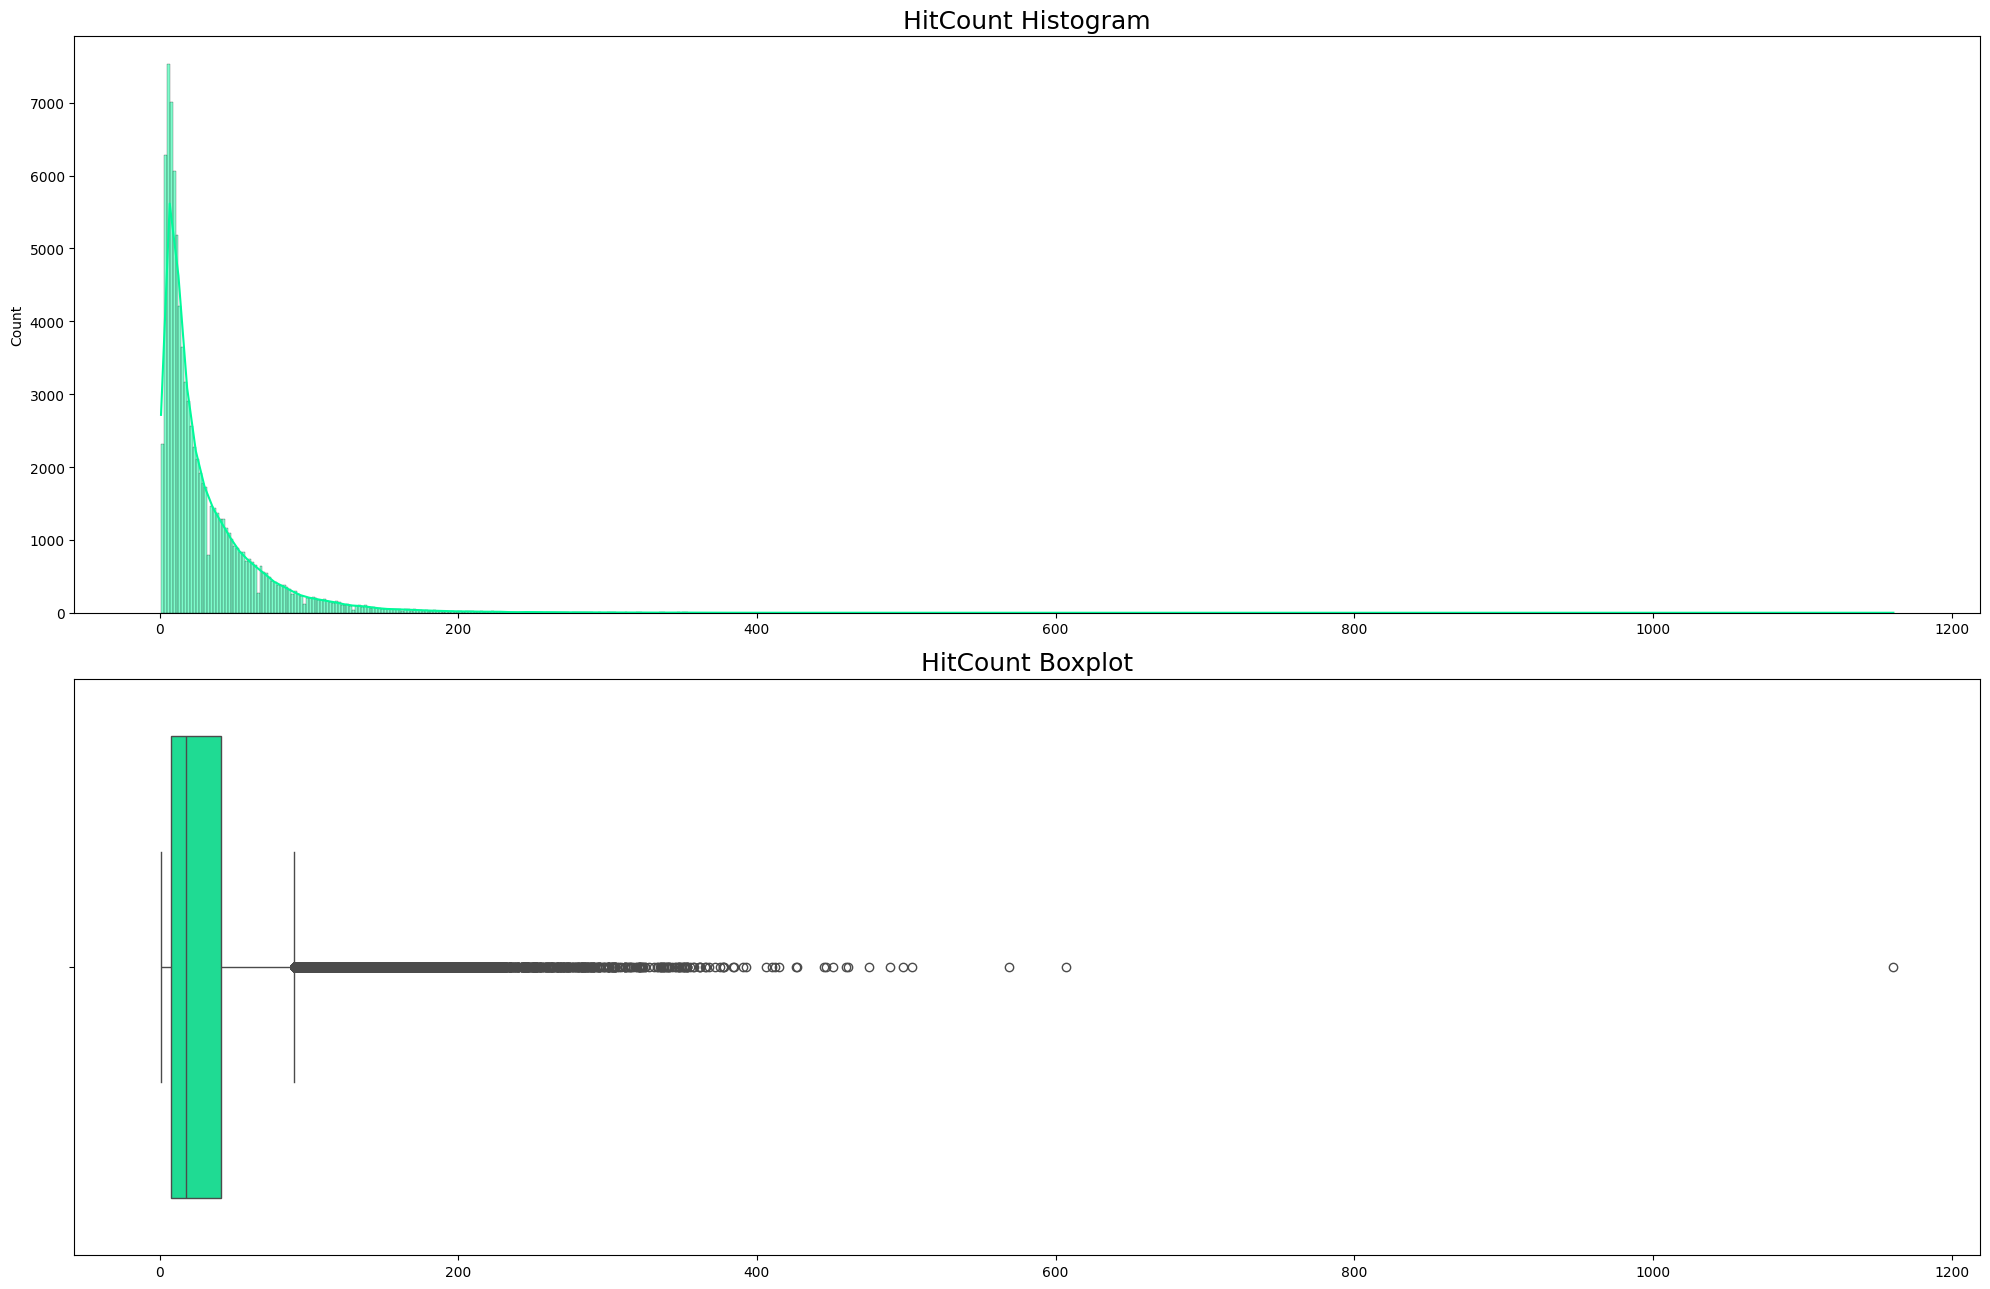

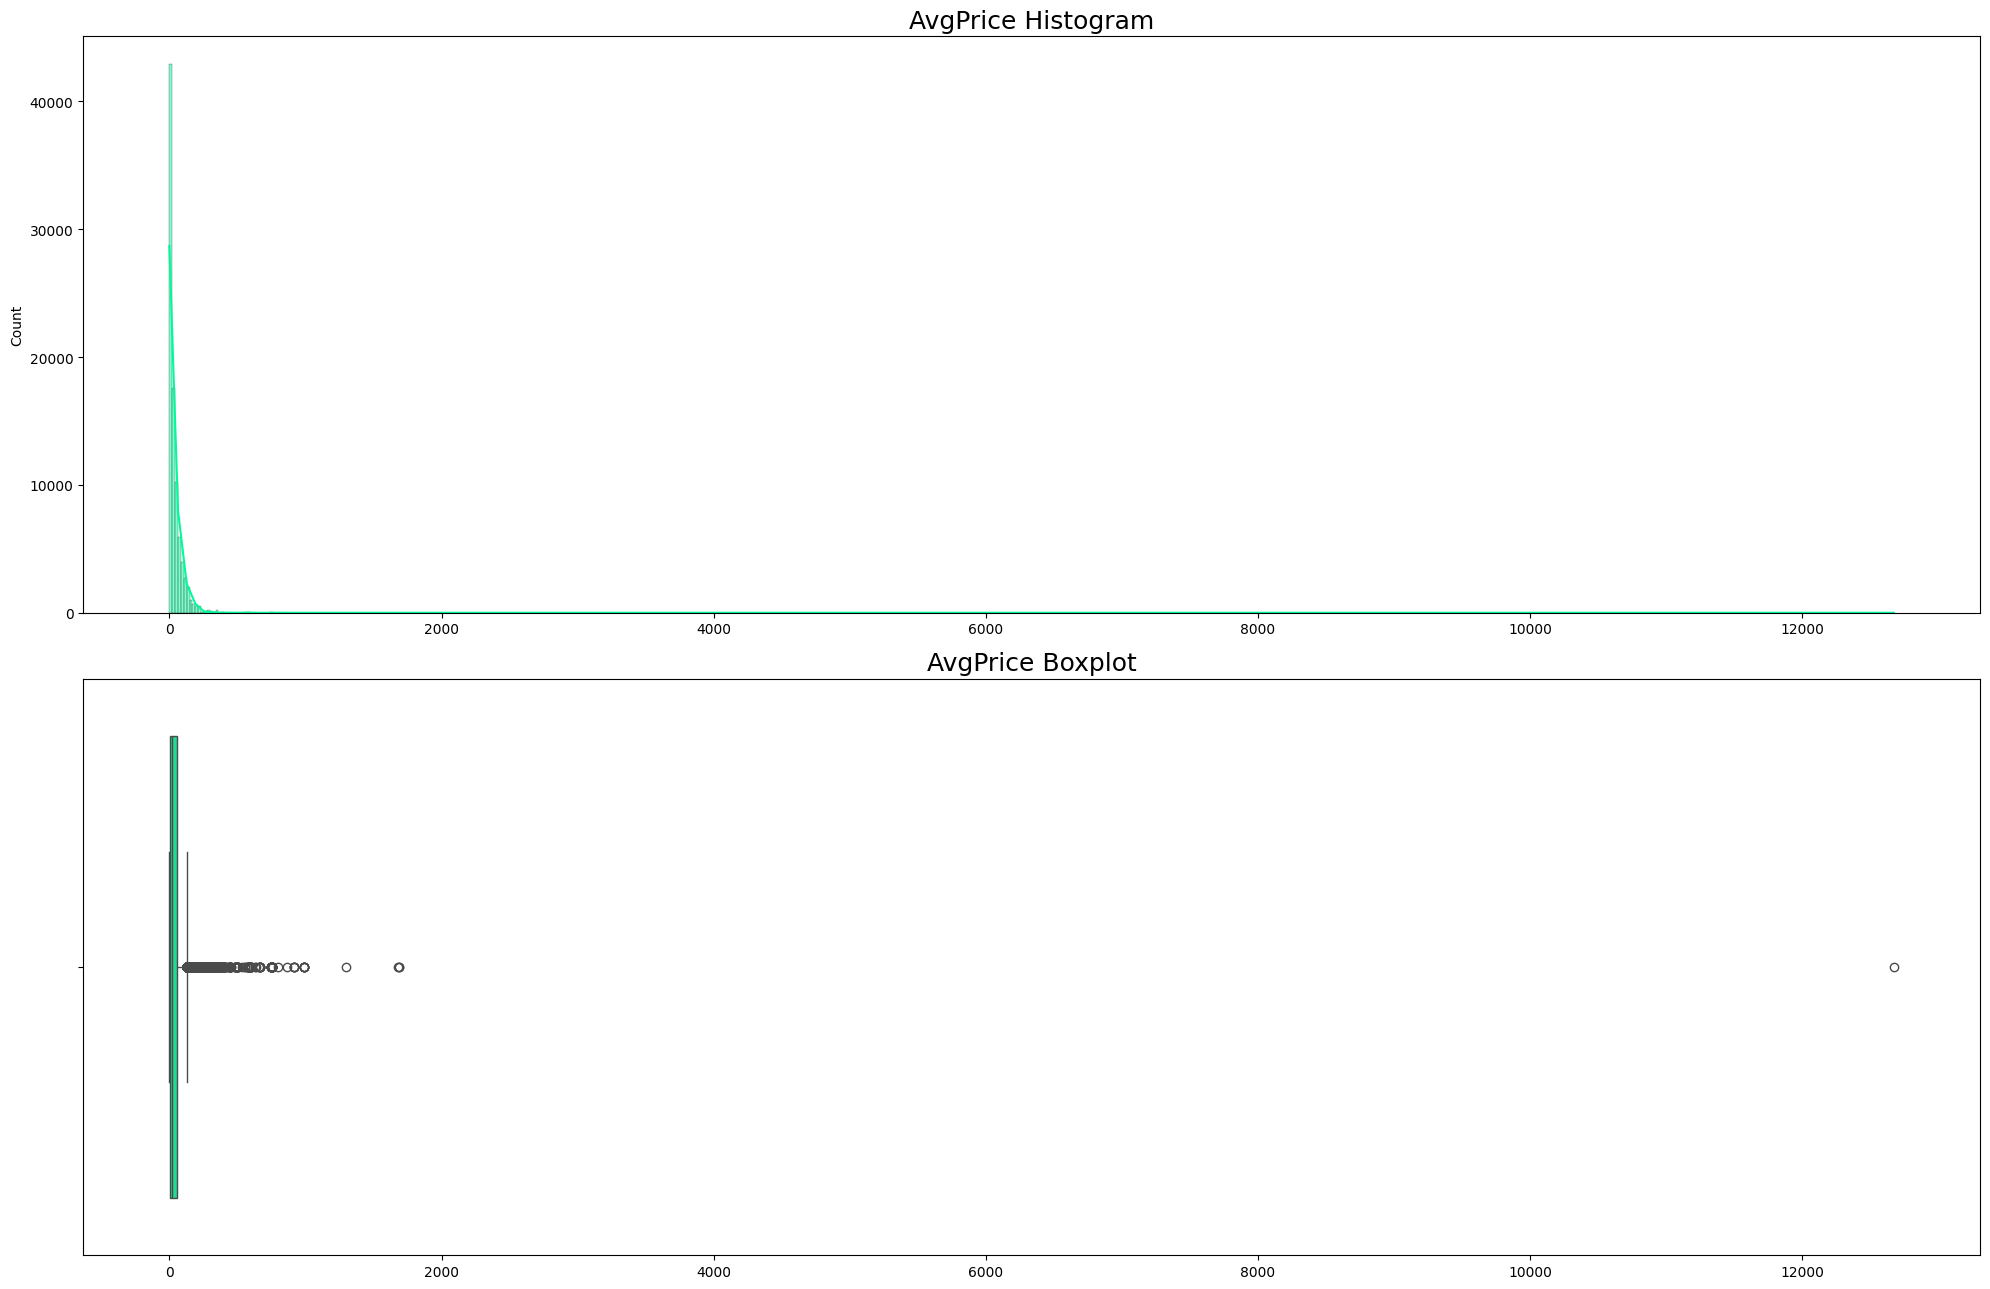

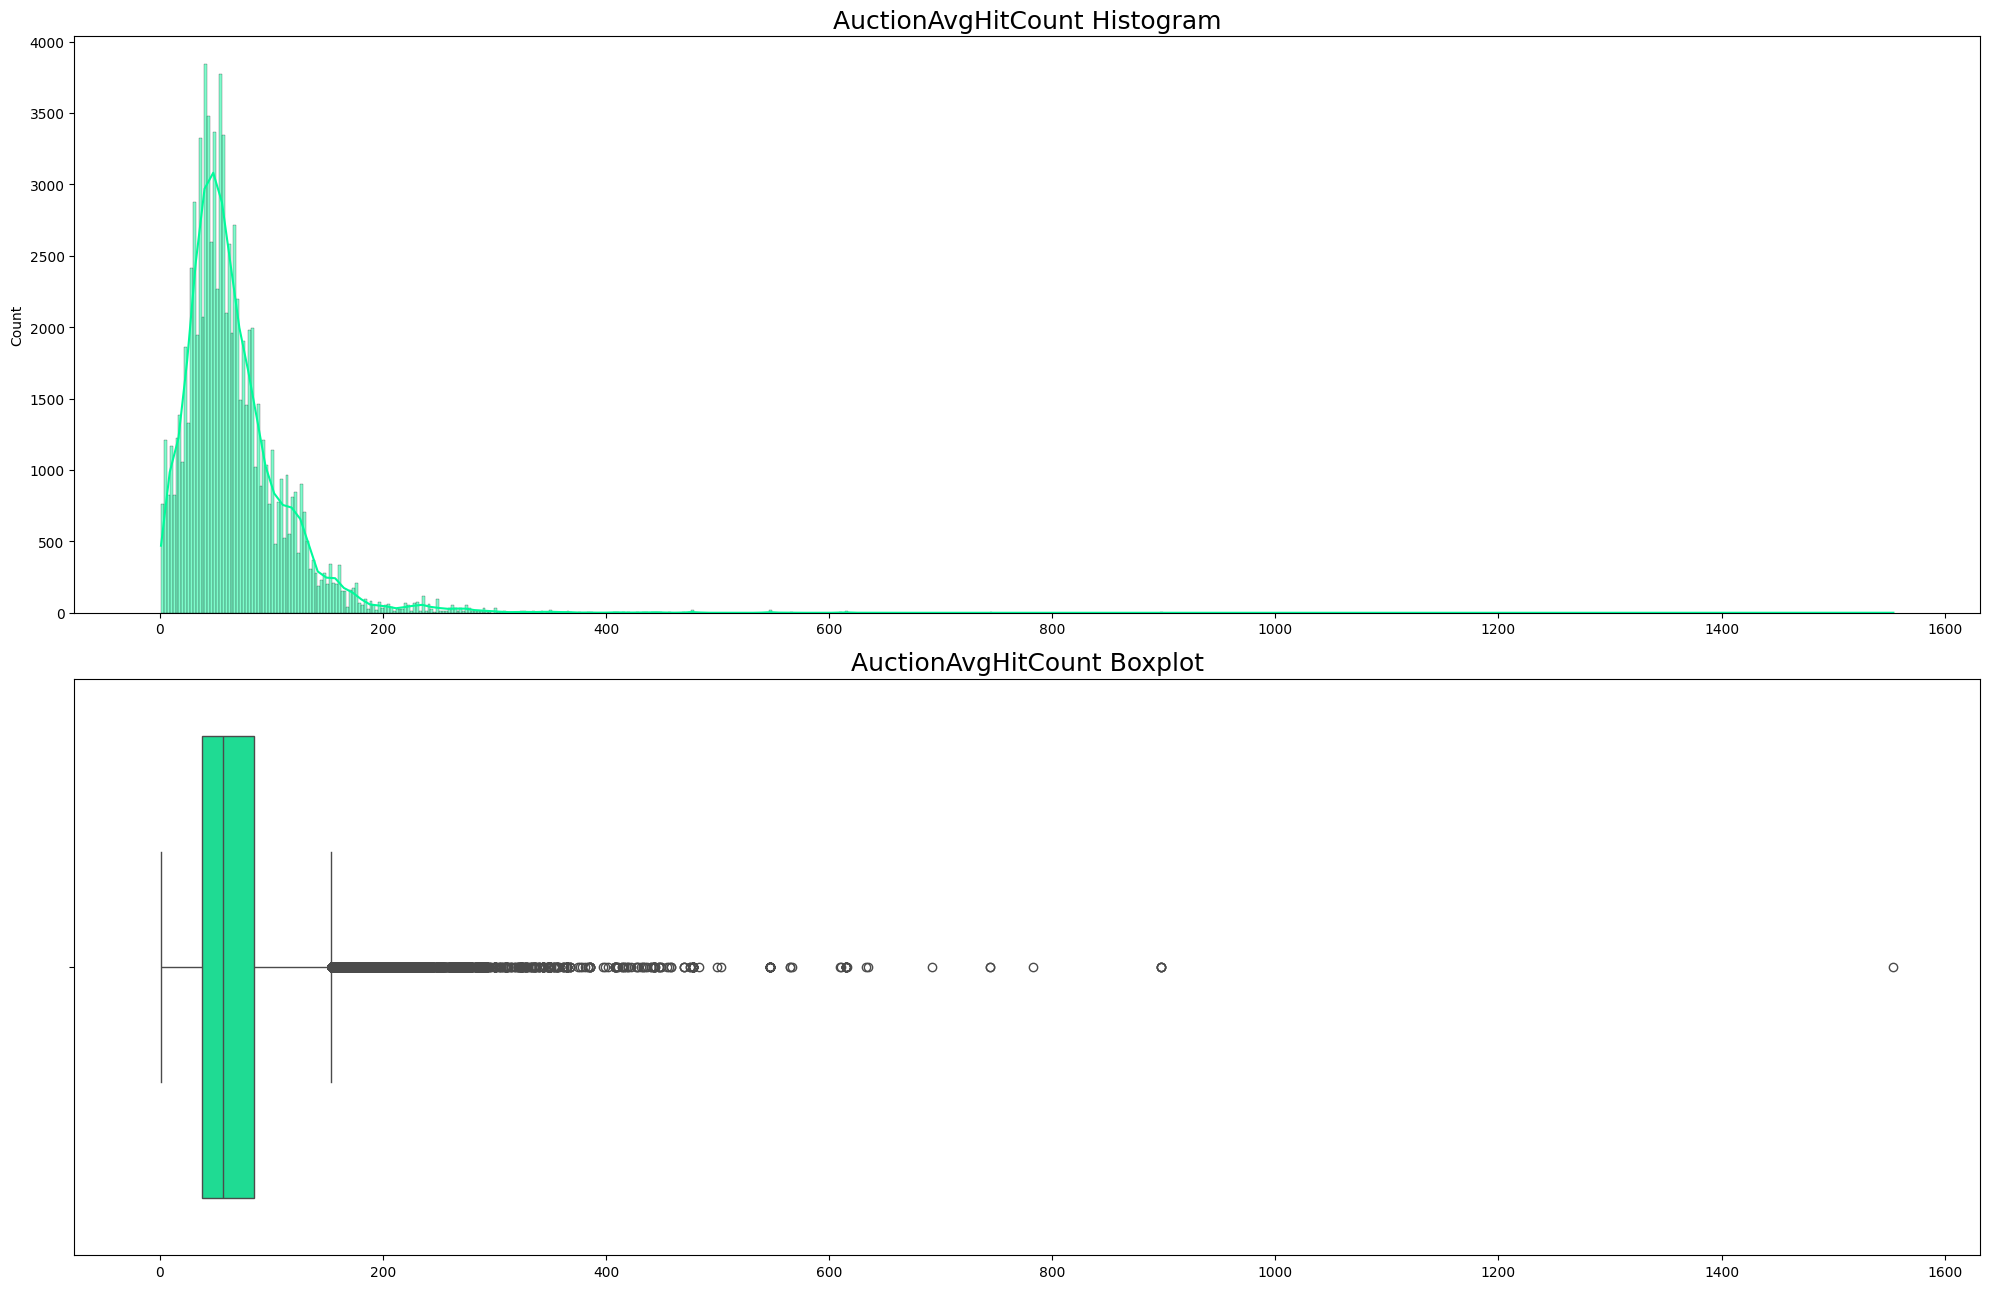

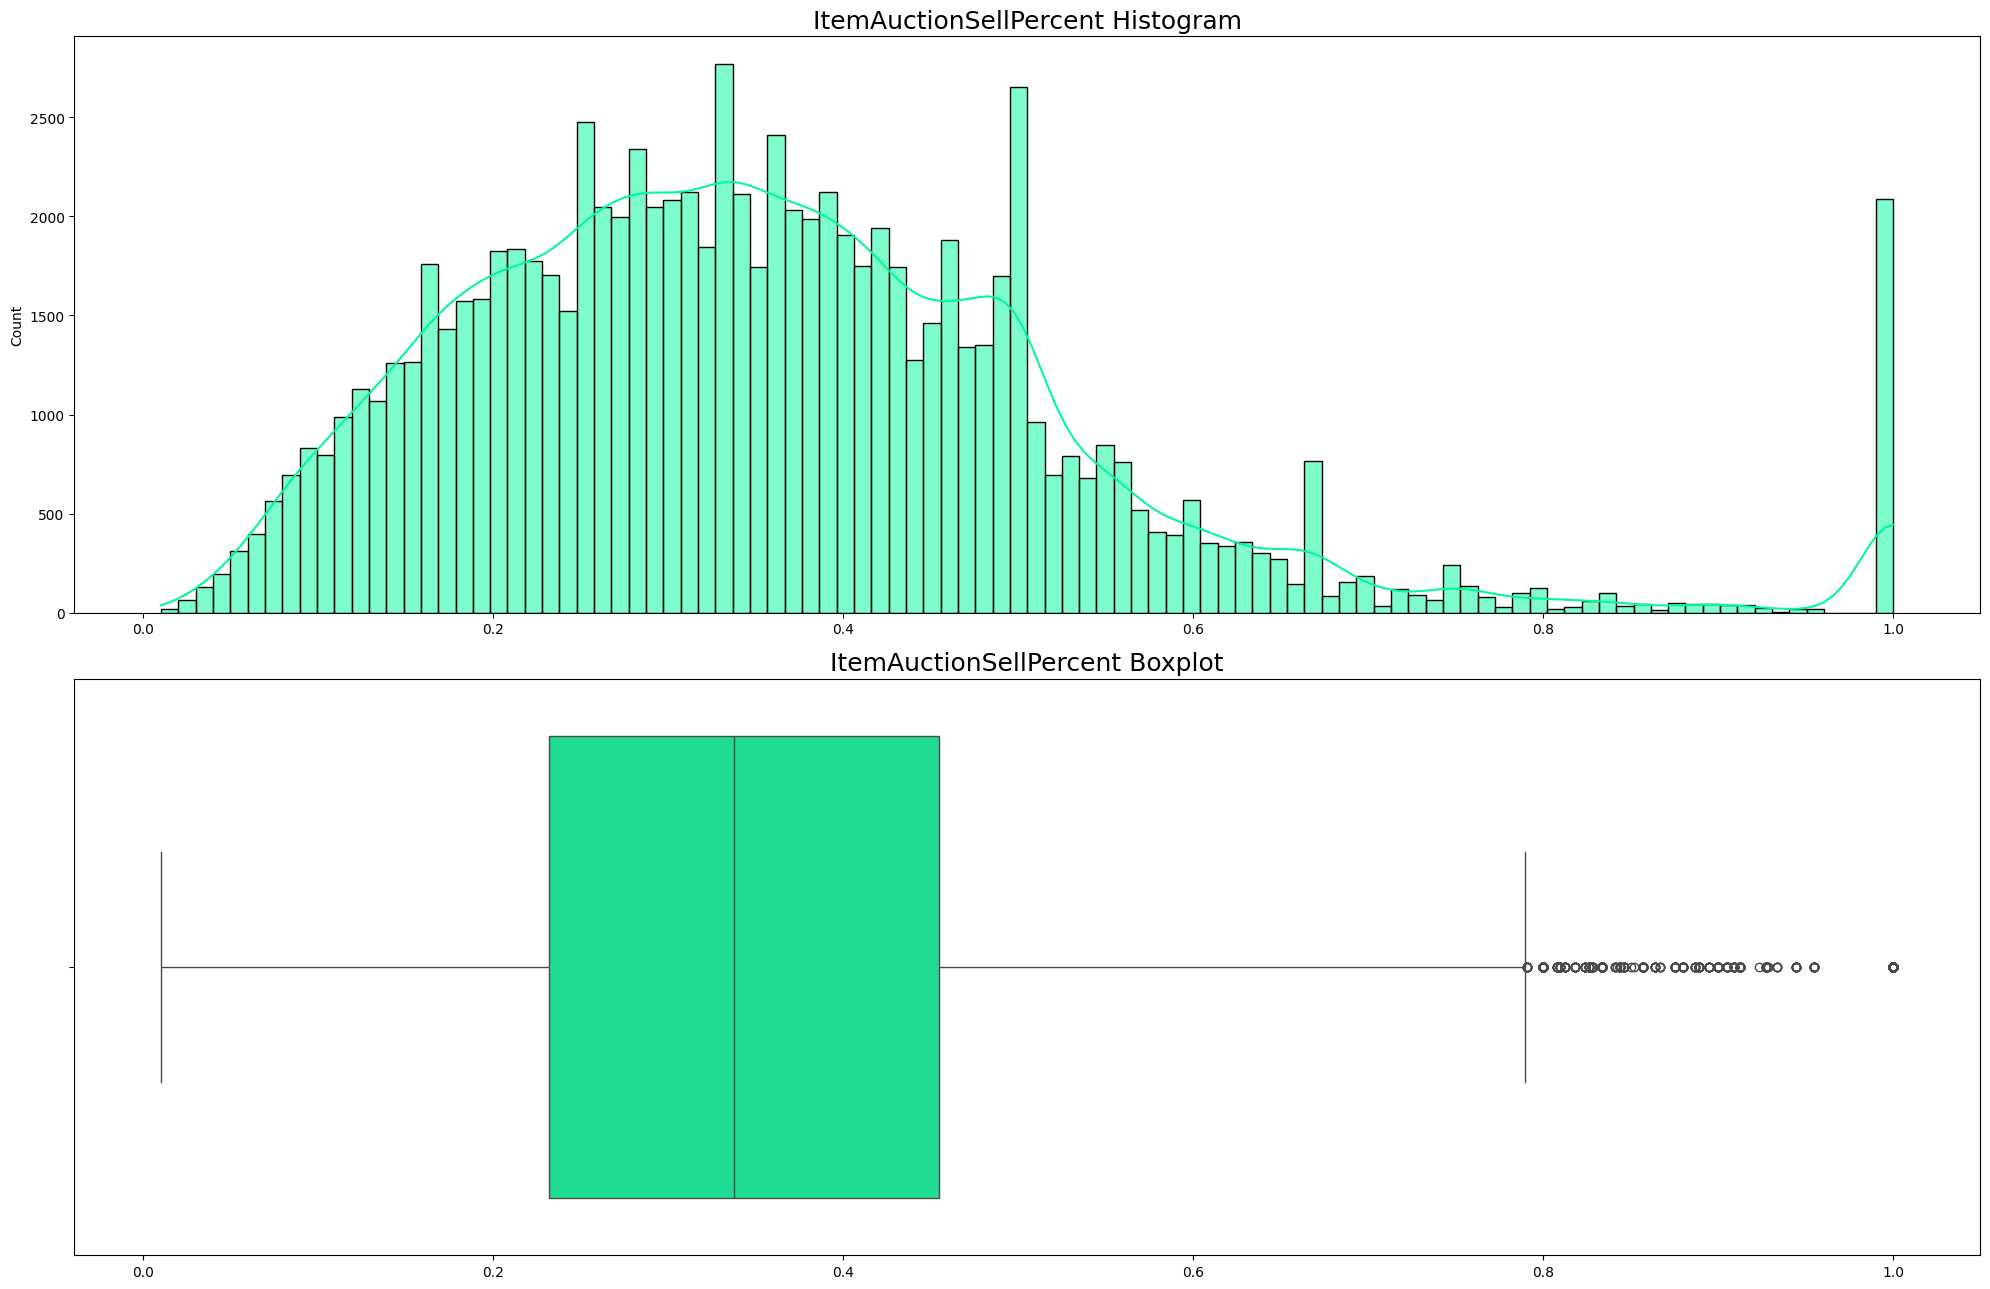

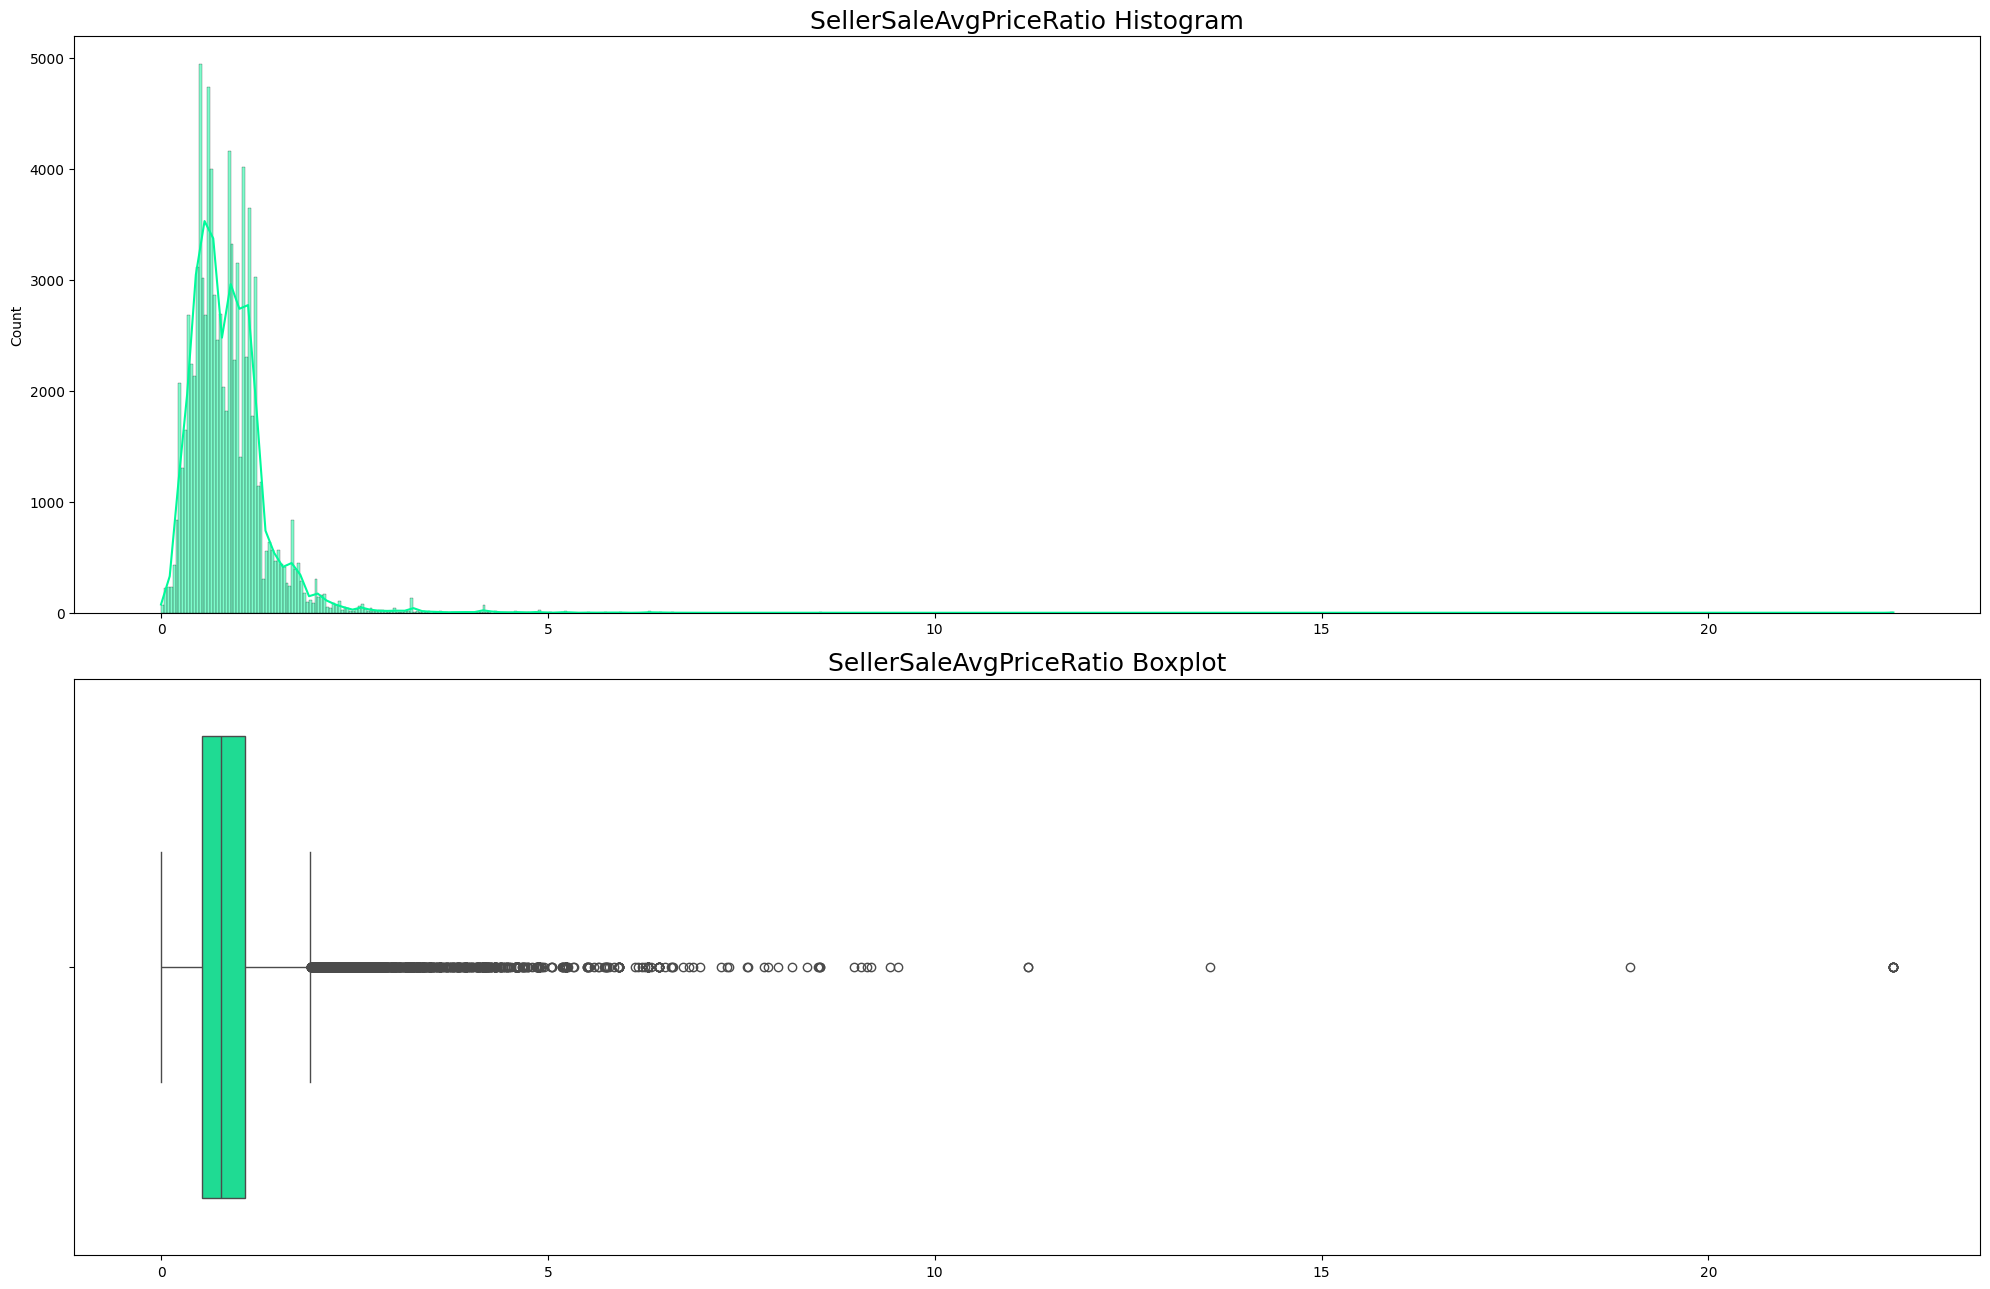

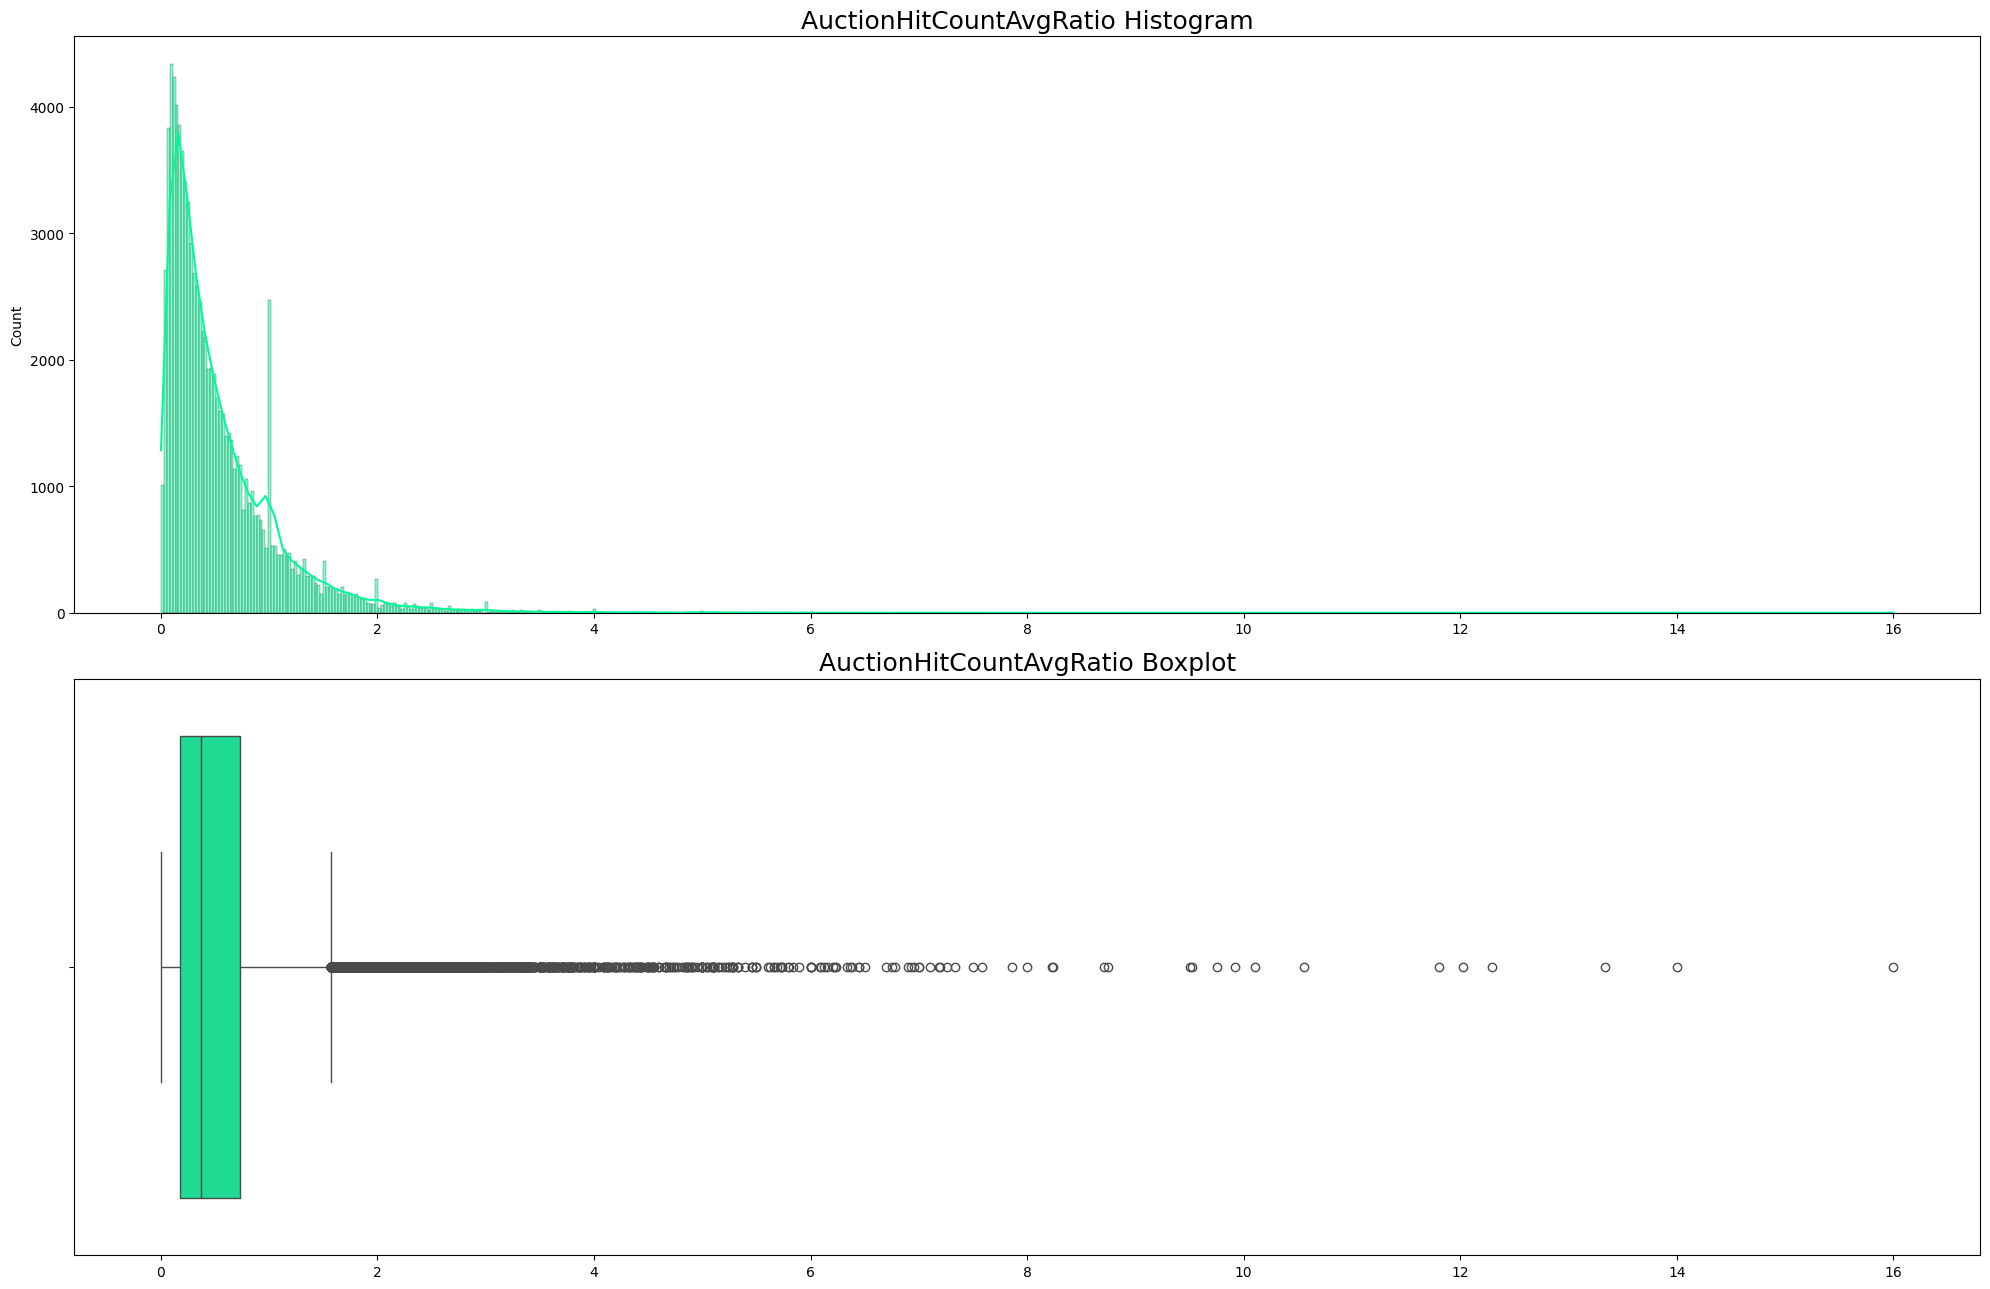

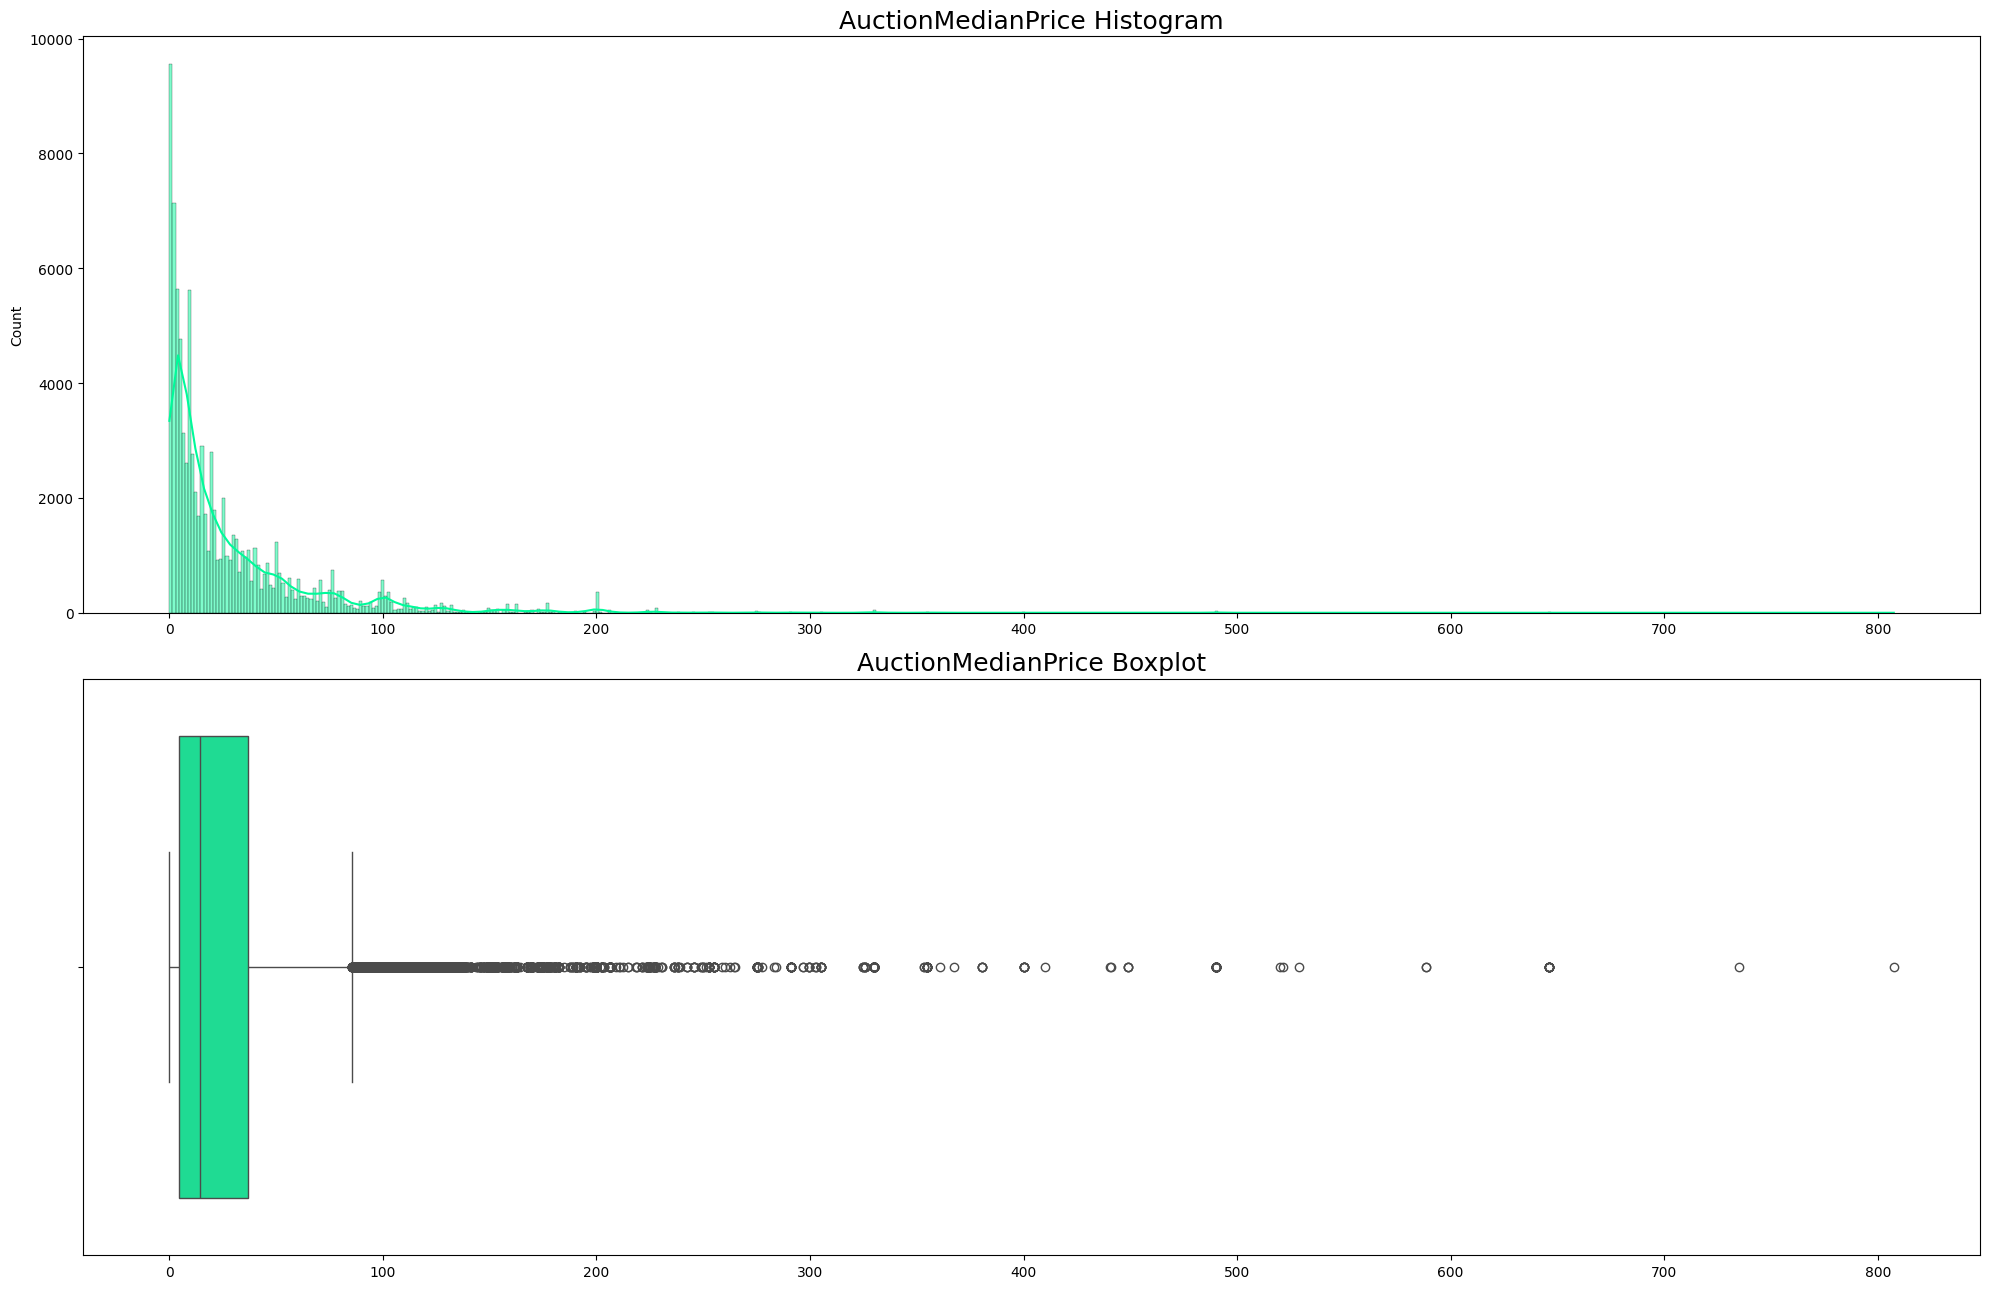

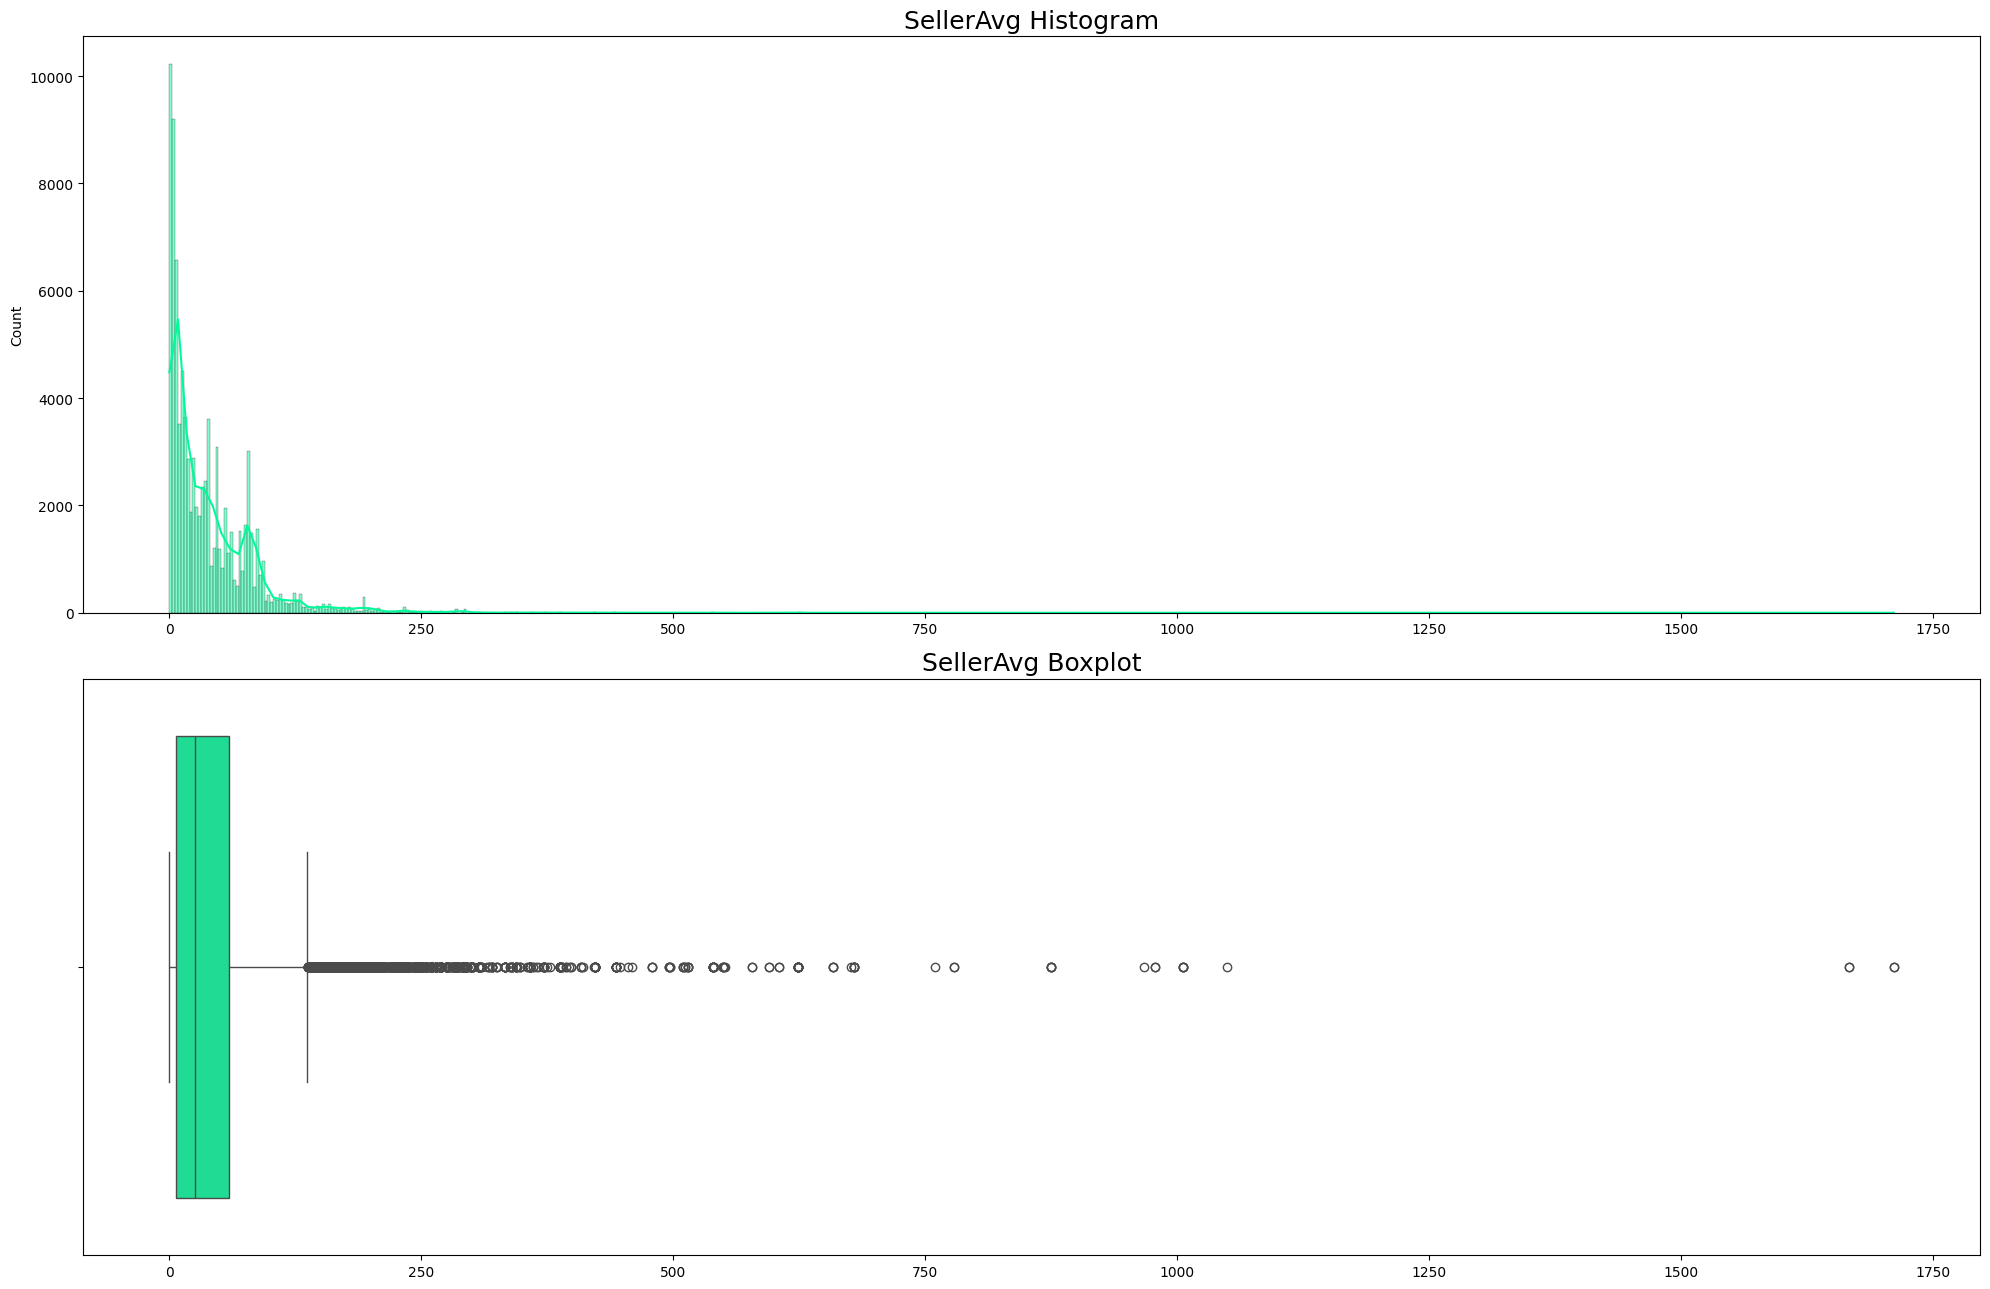

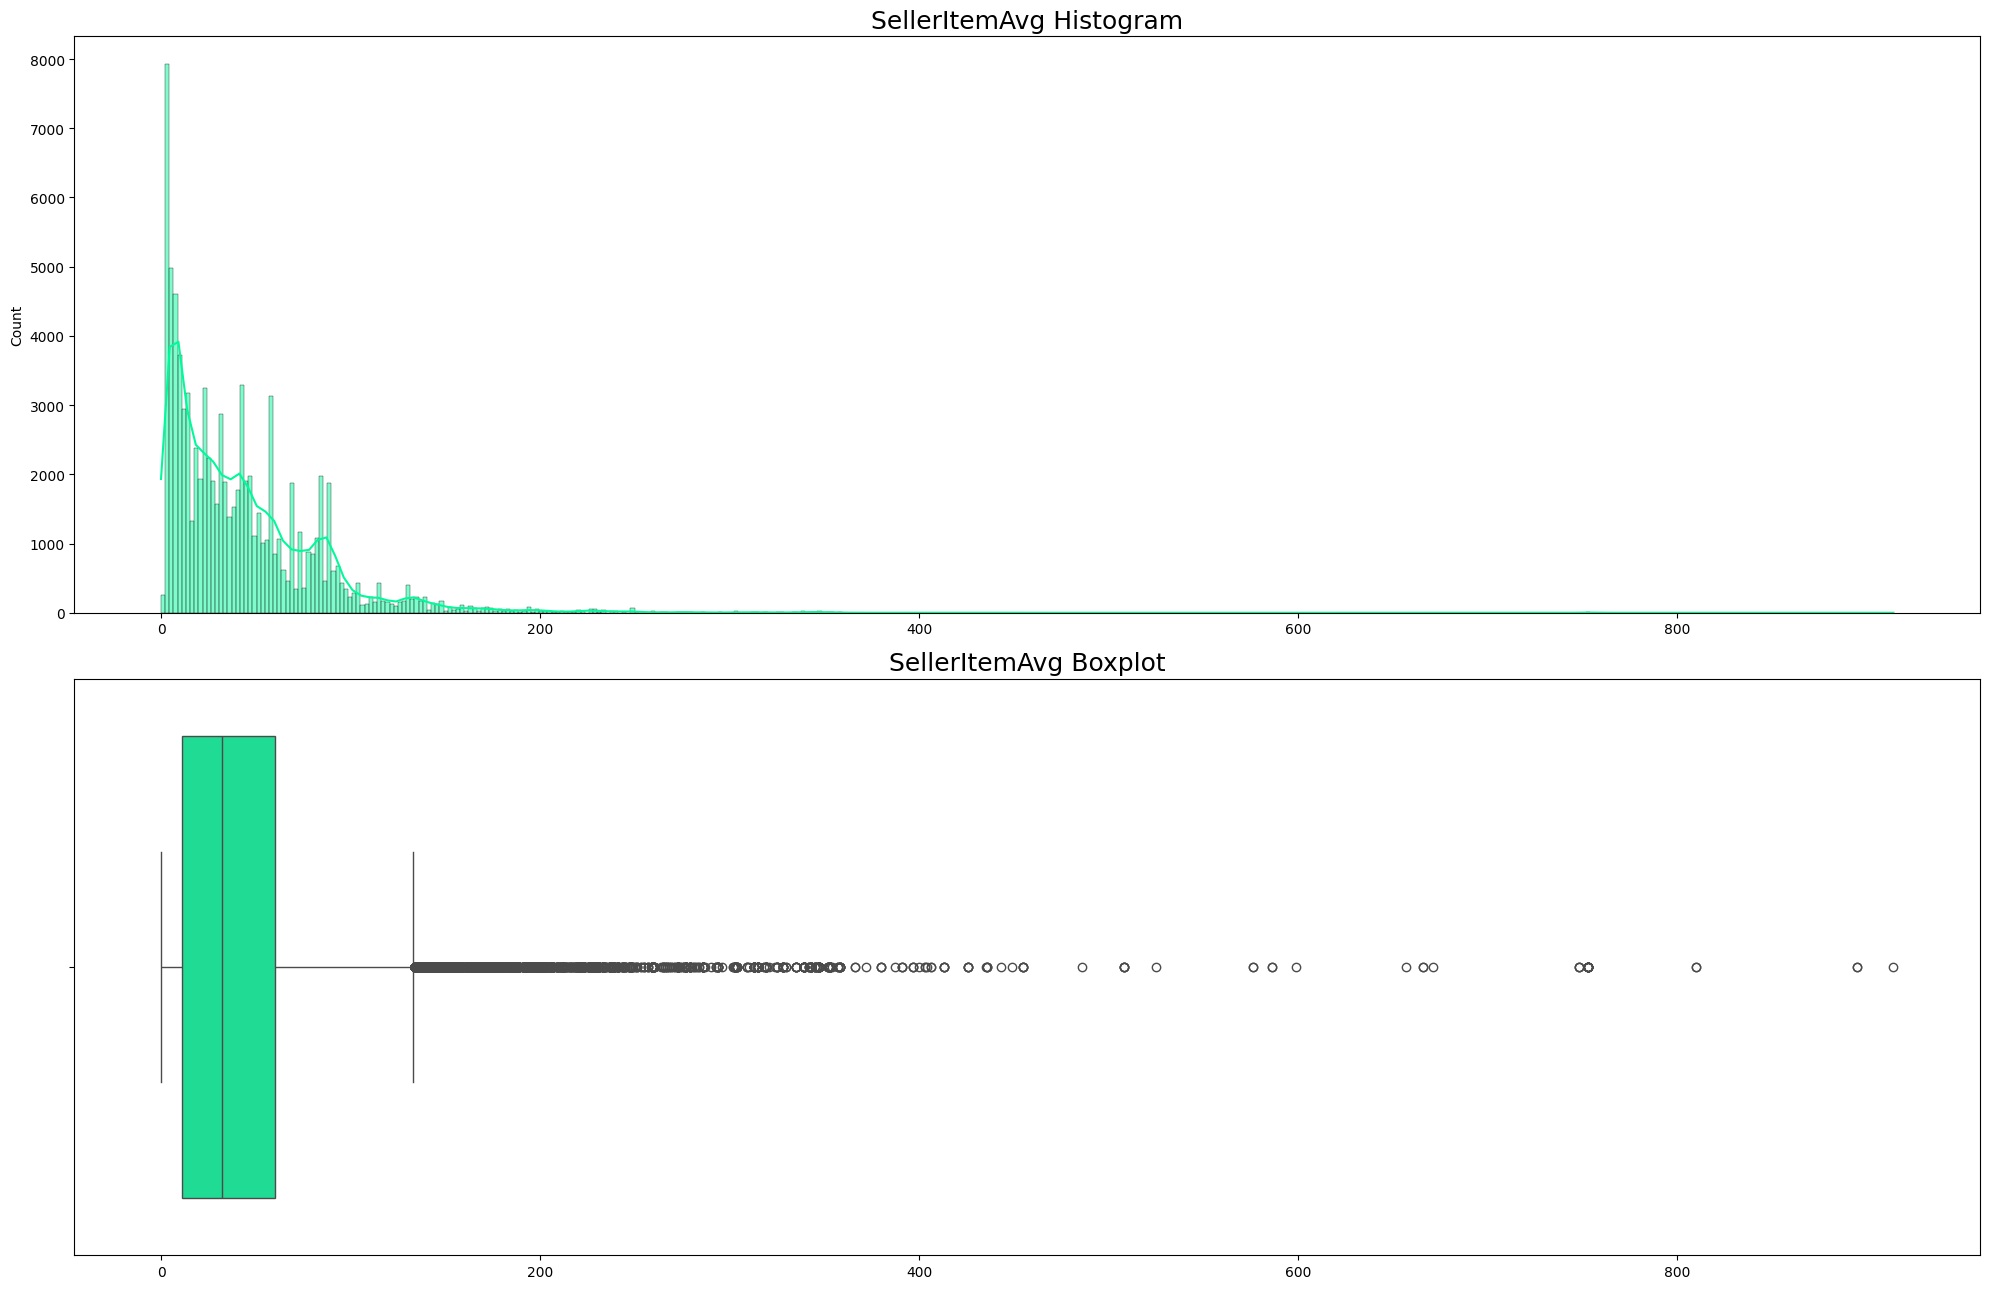

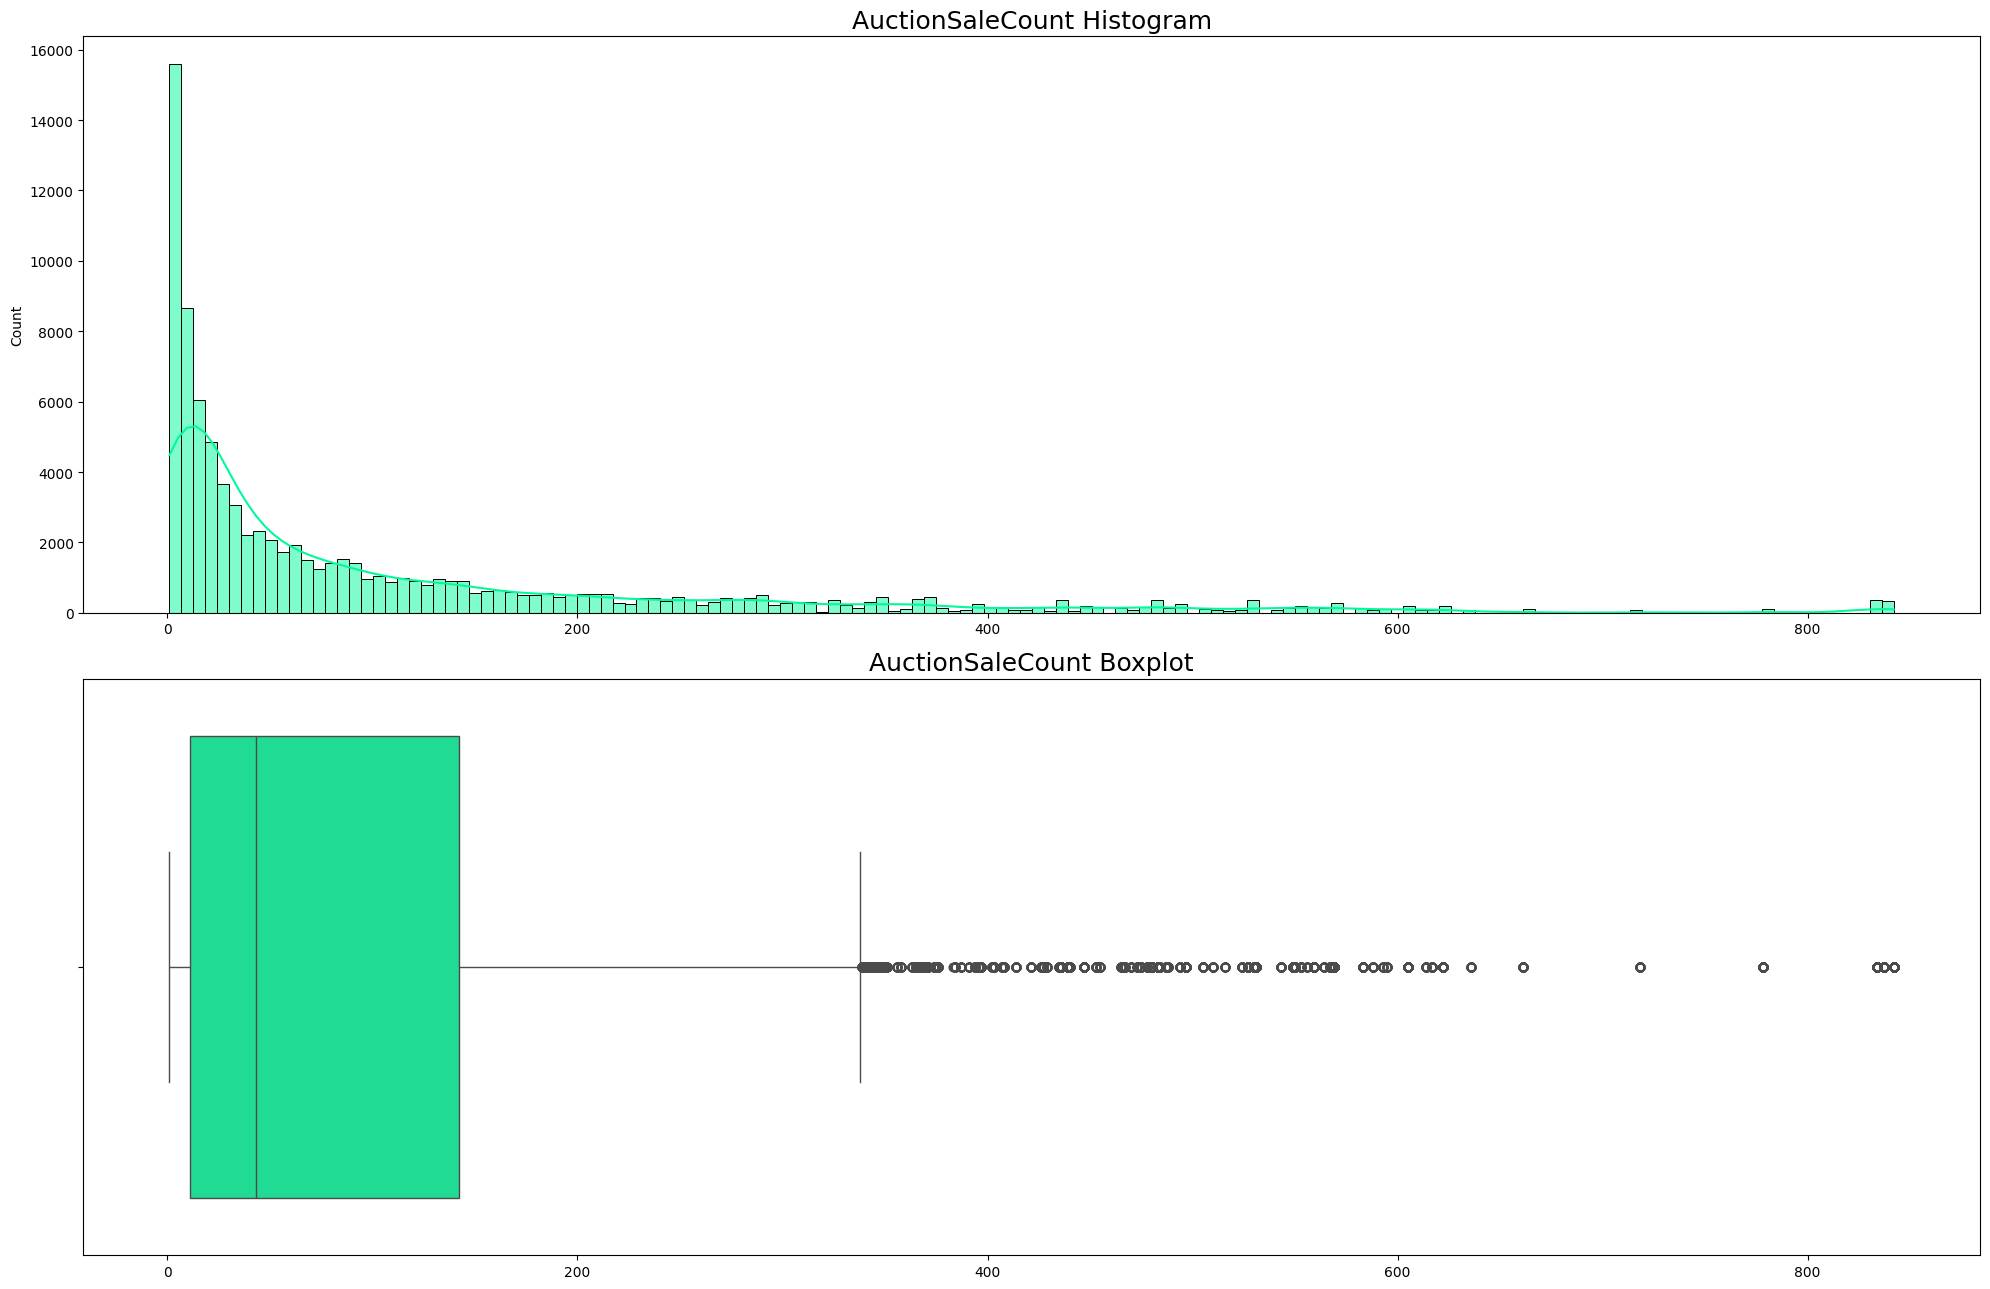

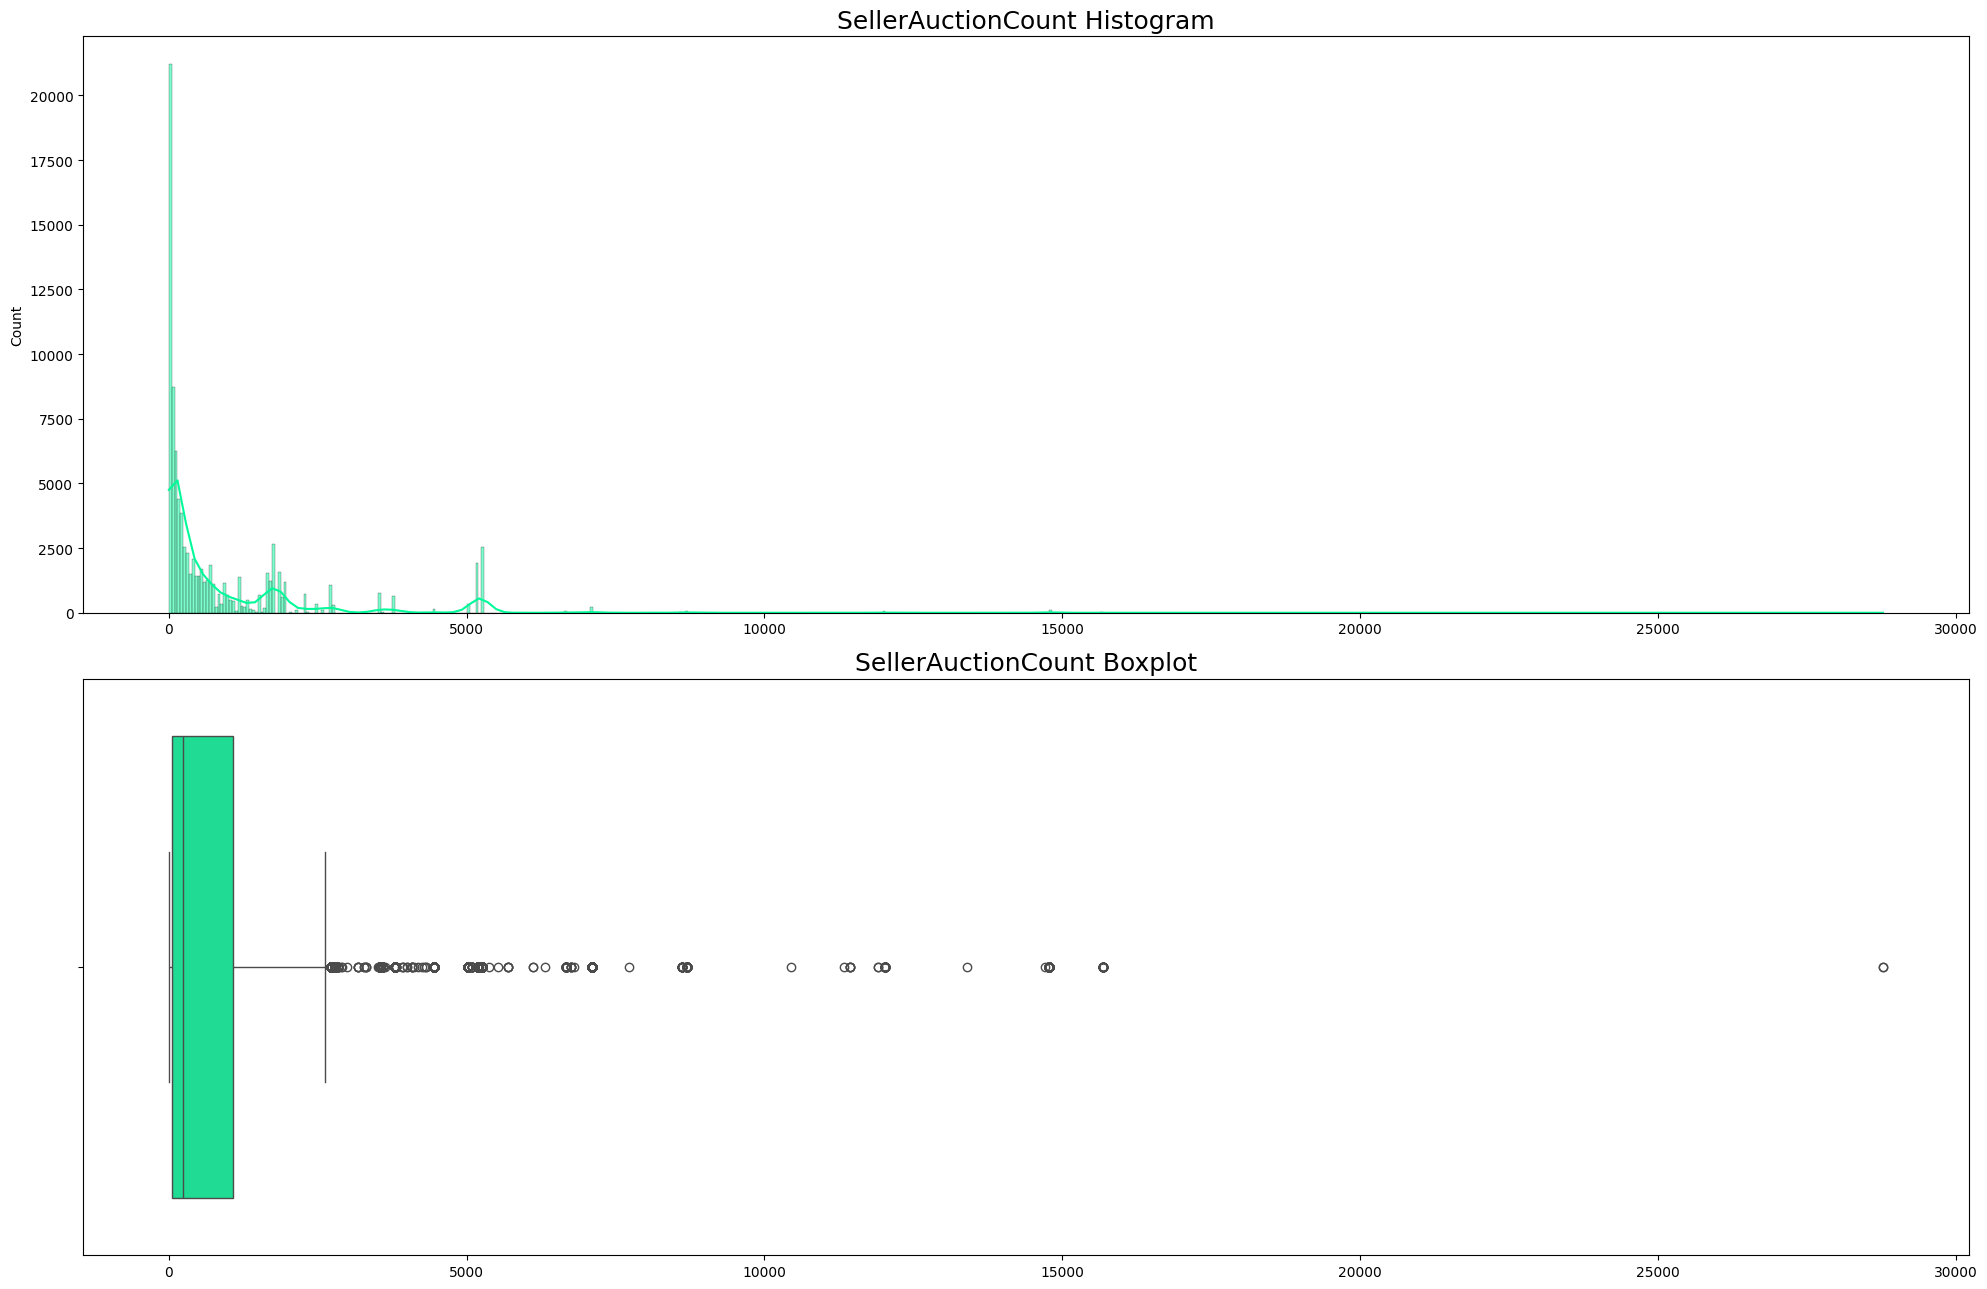

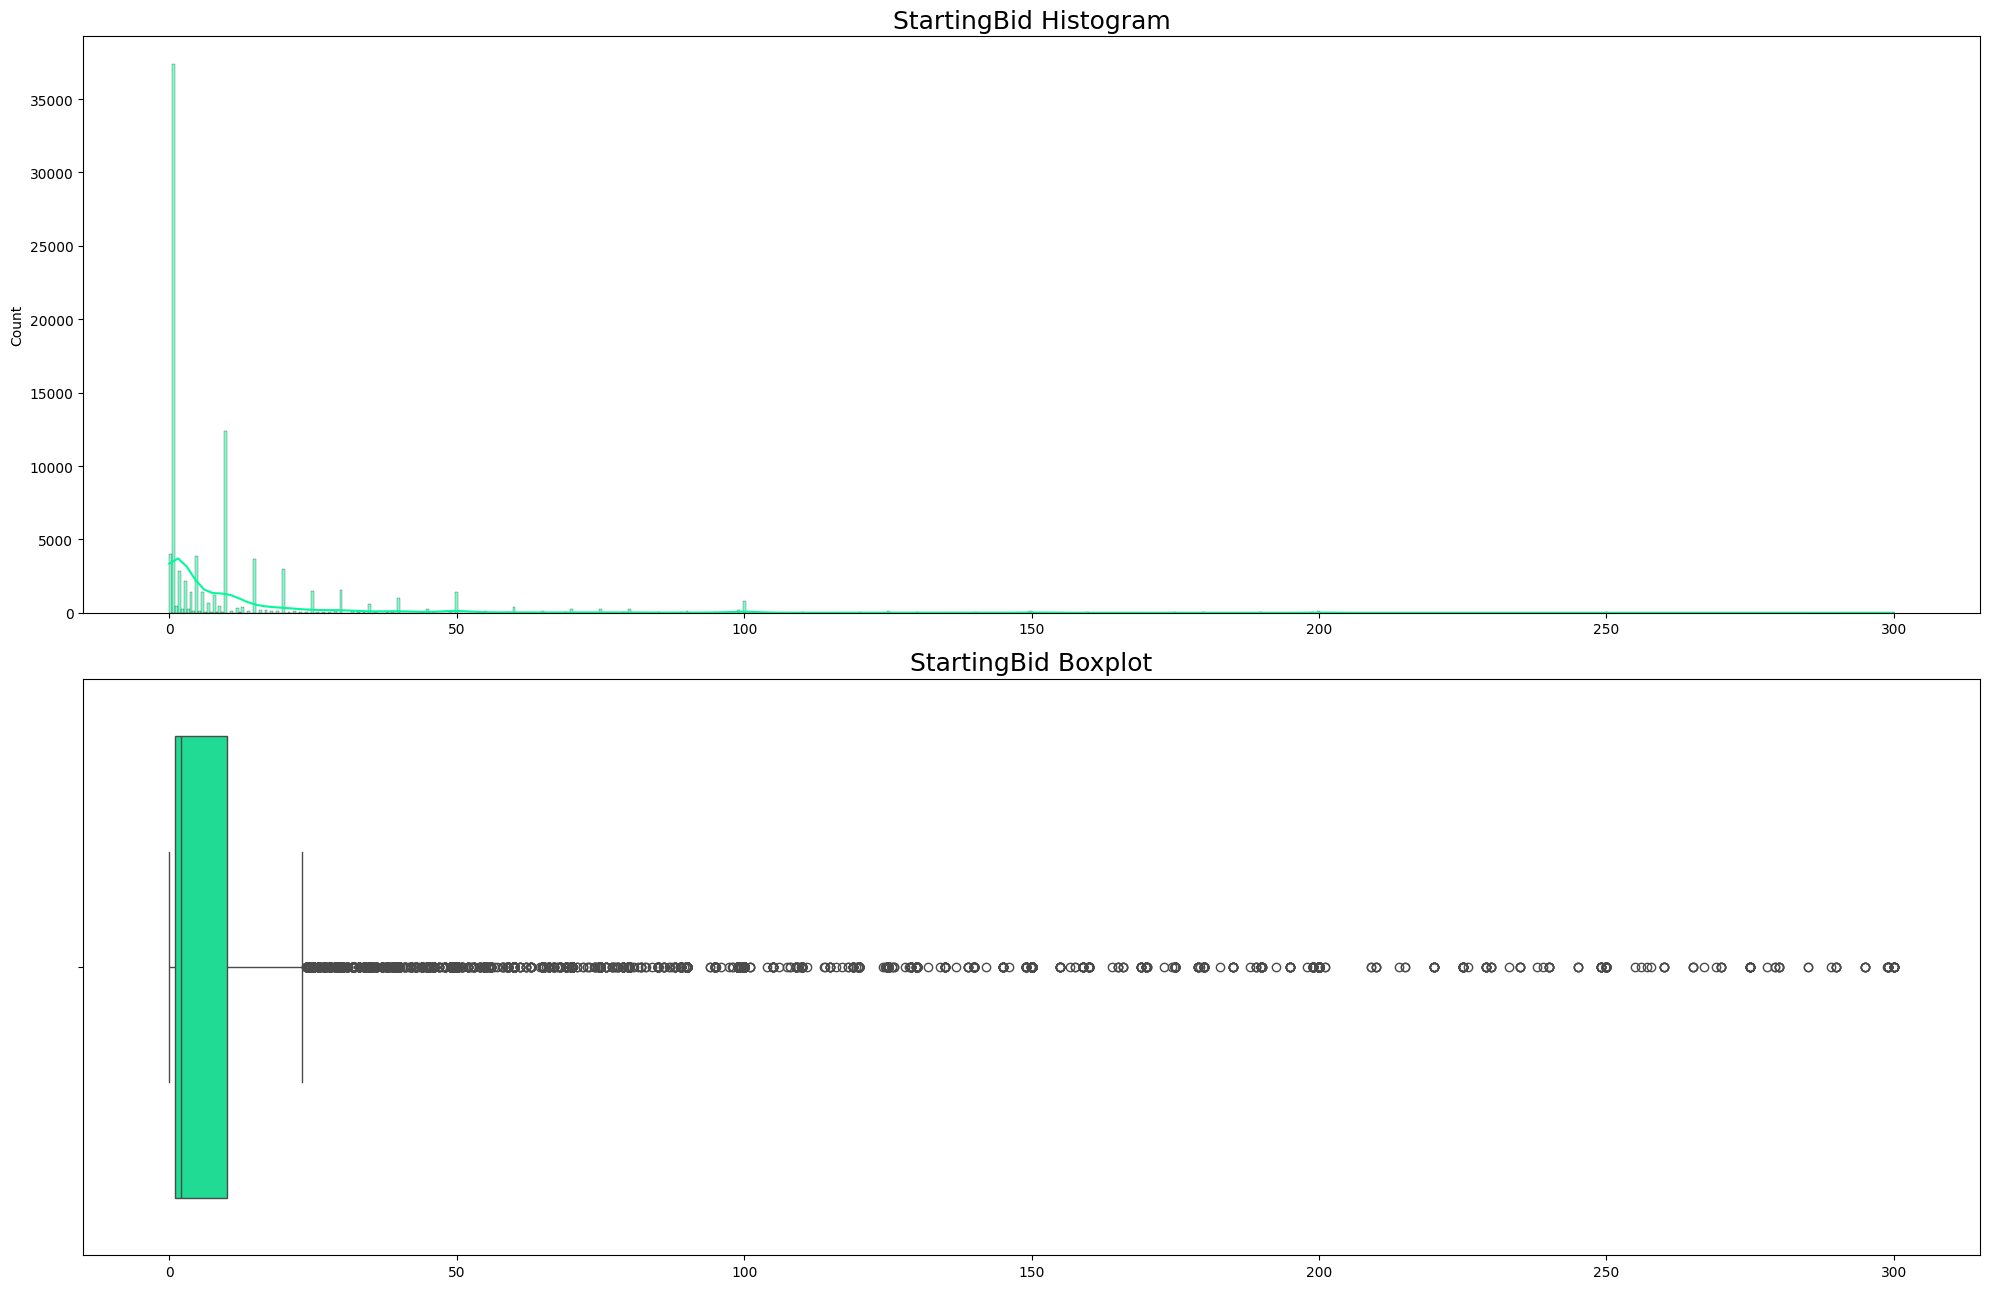

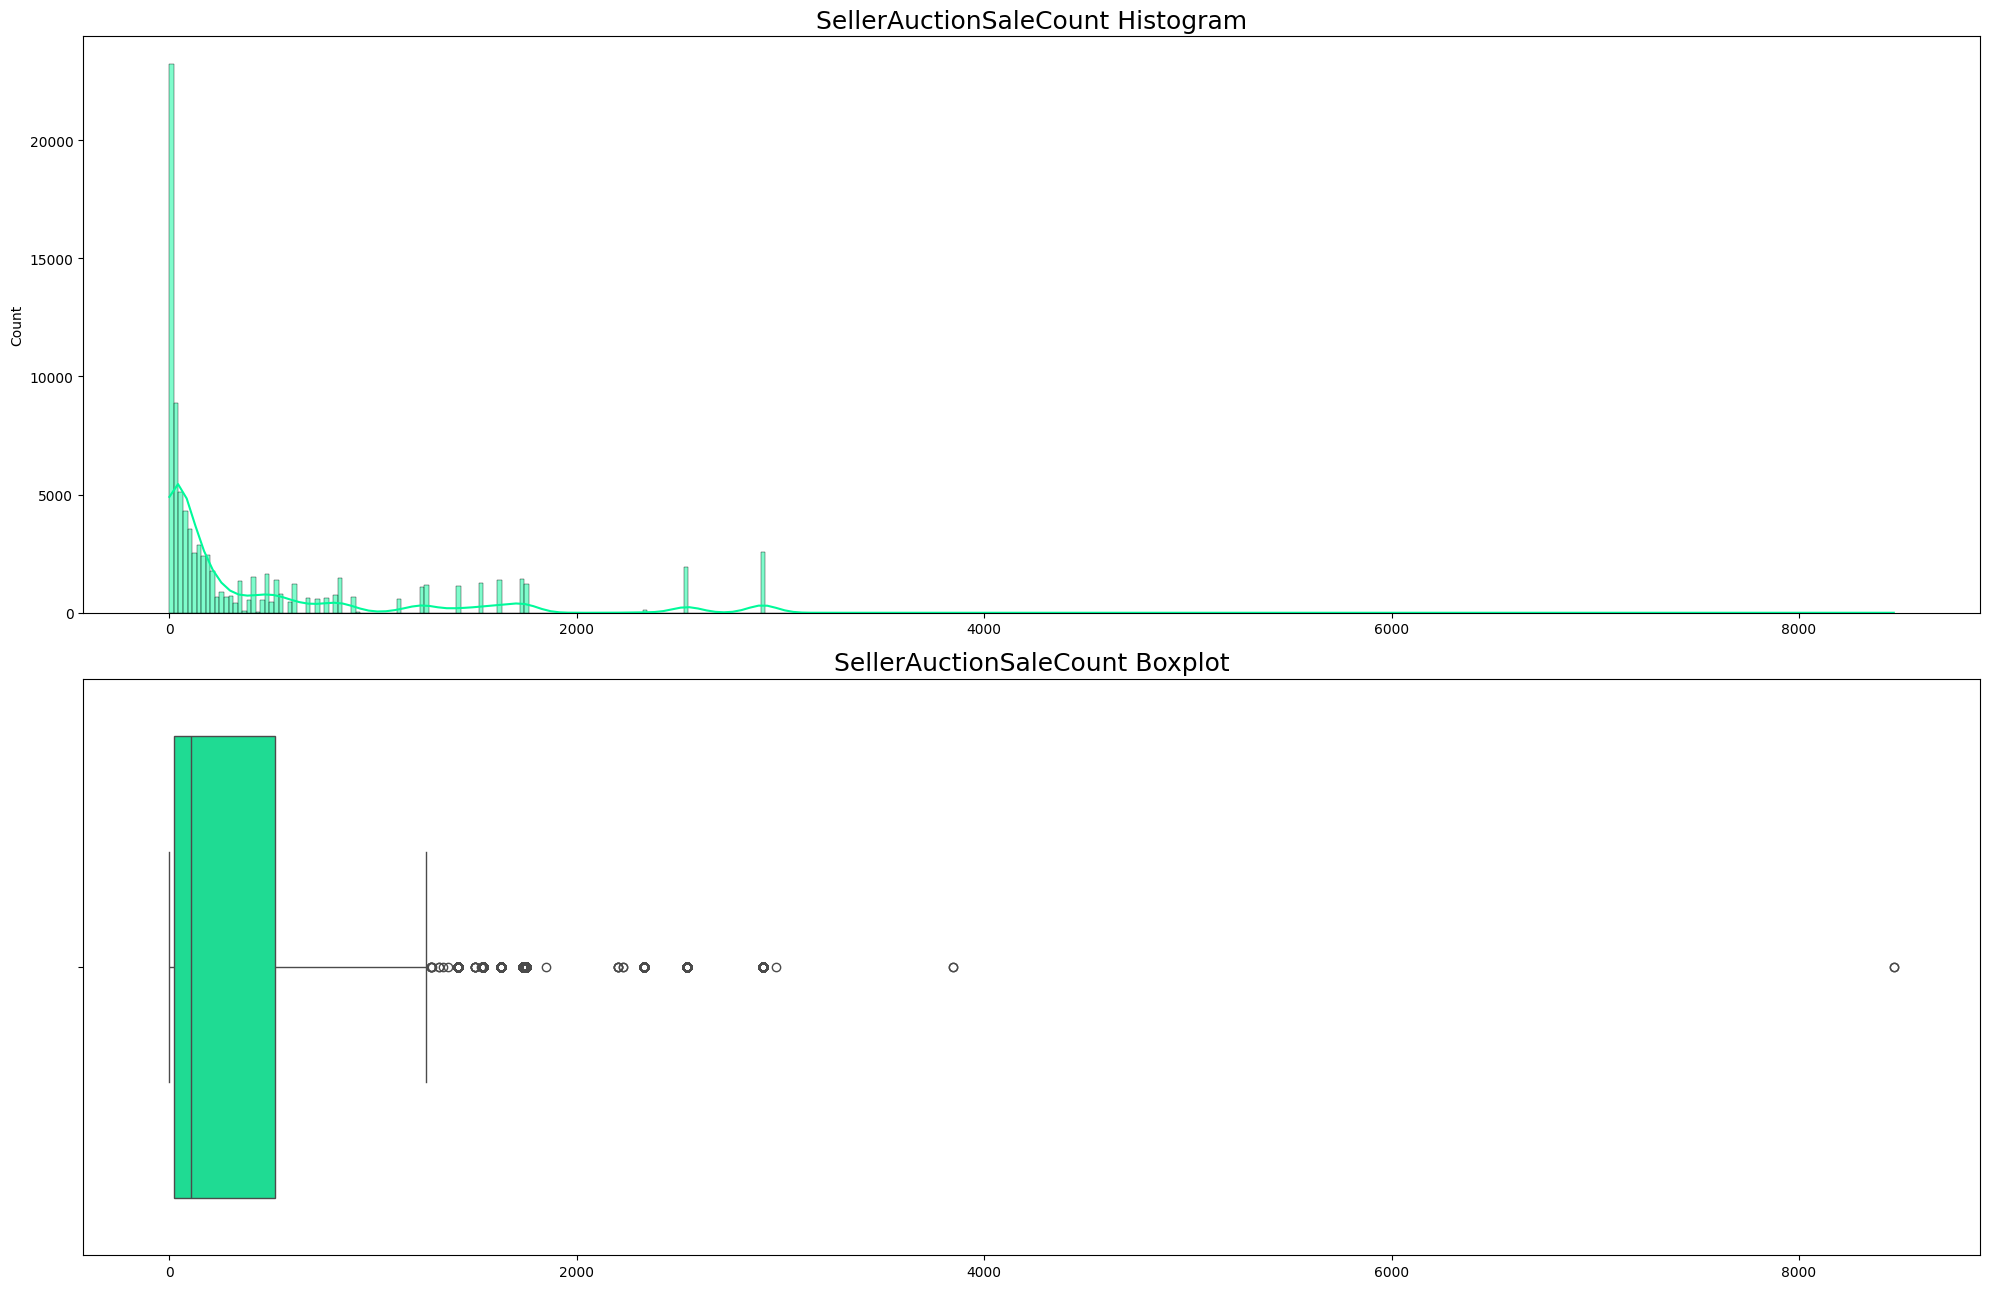

In [34]:
# loop over continuous numerical data 
for col in continuous_numerical:
    print('\n')
    plot_hist_box(col)

In [66]:
outliers = {}

for col in numerical_cols:
    Q1 = np.percentile(df_sub[col], 25)
    Q3 = np.percentile(df_sub[col], 75)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    
    # Get values that are outliers
    outlier_values = df_sub[col][(df_sub[col] < low_lim) | (df_sub[col] > up_lim)]
    
    if not outlier_values.empty:
        outliers[col] = outlier_values.values

# Print summary
for col, vals in outliers.items():
    print(f"{col} has {len(vals)} outliers: {vals[:10]} ...")  # show first 10


PricePercent has 4610 outliers: [ 2.387   4.4003  2.7463  4.3789  3.6393  2.1916  4.4559 16.783   1.9736
  5.2613] ...
StartingBidPercent has 3550 outliers: [2.7463 3.0547 1.7991 3.4477 2.1916 3.8708 1.9736 1.5649 2.5665 1.8189] ...
StartingBid has 11457 outliers: [ 49.   209.    29.99 149.99  24.99  29.95  79.99  39.99  99.99  24.99] ...
AvgPrice has 5714 outliers: [226.6297 144.4341 150.4786 150.4786 190.5    192.9262 148.9276 149.8656
 226.266  226.266 ] ...
HitCount has 5838 outliers: [210 102 211 158 202 175 157 111 100 102] ...
AuctionAvgHitCount has 3881 outliers: [368 173 166 281 178 365 202 244 262 290] ...
Authenticated has 15819 outliers: [1 1 1 1 1 1 1 1 1 1] ...
ItemAuctionSellPercent has 2772 outliers: [1.        0.9047619 0.9047619 0.9047619 0.9047619 0.9047619 1.
 1.        1.        1.       ] ...
SellerSaleAvgPriceRatio has 2483 outliers: [2.03 2.15 2.16 5.26 2.29 2.63 6.87 2.59 2.31 2.  ] ...
SellerAvg has 3165 outliers: [269 243 222 388 173 193 255 250 515 153] ...


# Step 2 Bivariate Analysis

- Continous variables vs Price

In [35]:
import plotly.express as px
# defining function to create plot
def bivariate(col):
    sns.scatterplot(data=df_sub, x='Price',
                    y=col, color='orange', s=80)
    sns.regplot(data=df_sub, x='Price',
                y=col, scatter=False, color='blue')
    plt.title(f" Price vs {col}")
    plt.xlabel("Price")
    plt.ylabel(f"{col}")
    plt.show()

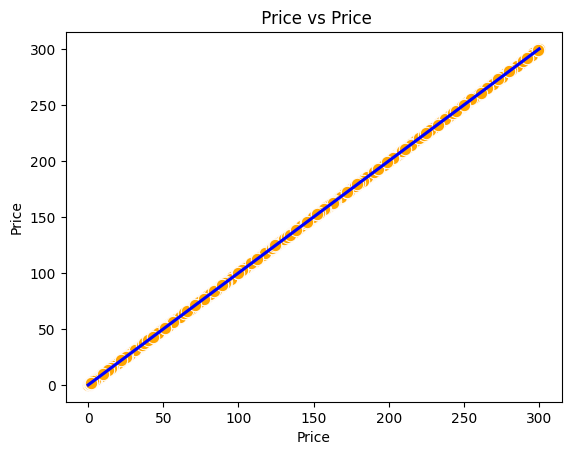

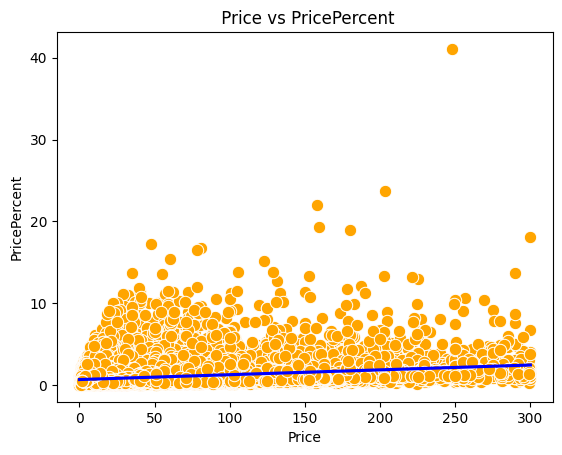

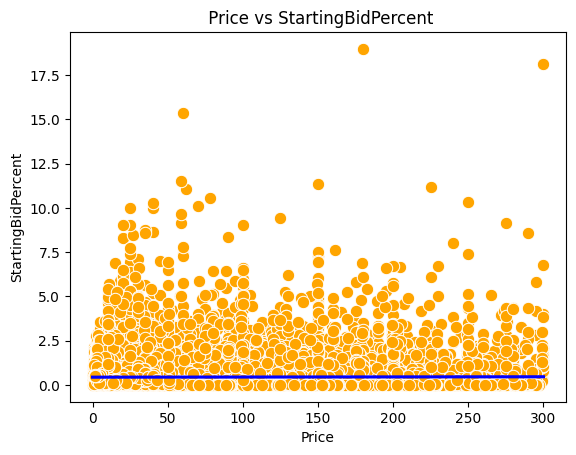

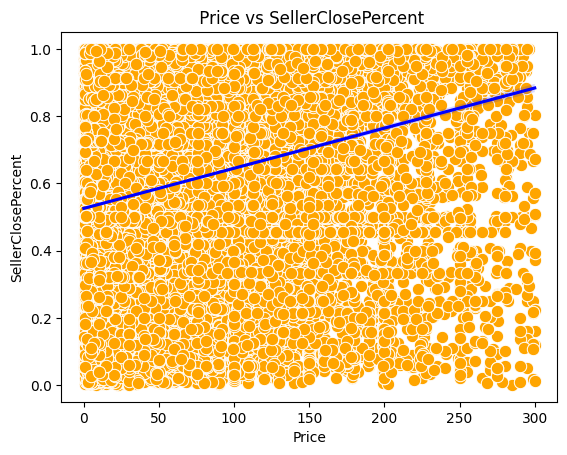

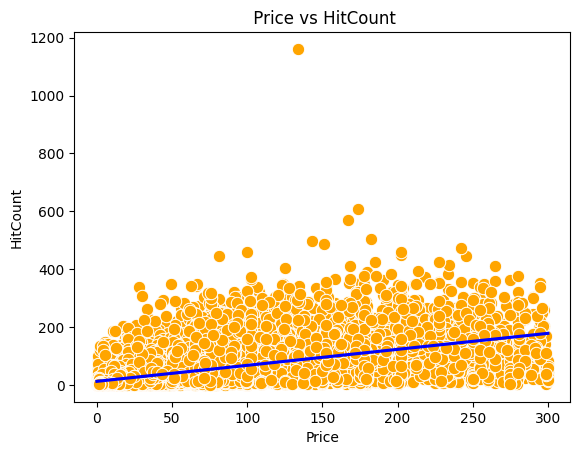

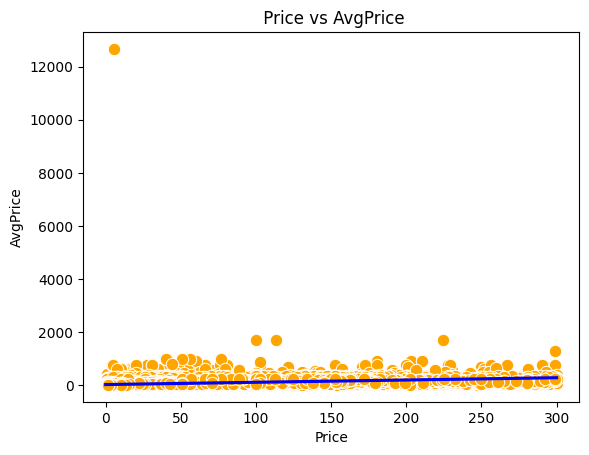

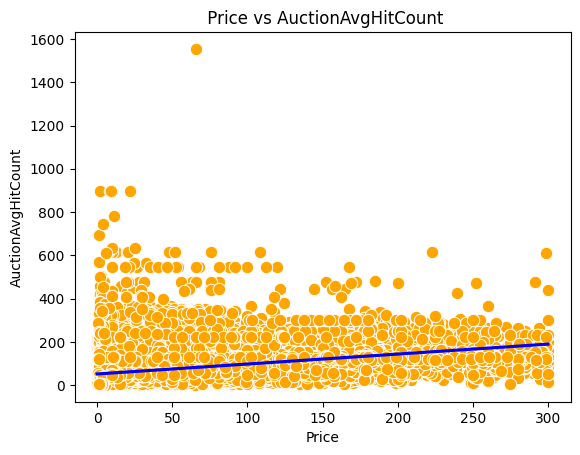

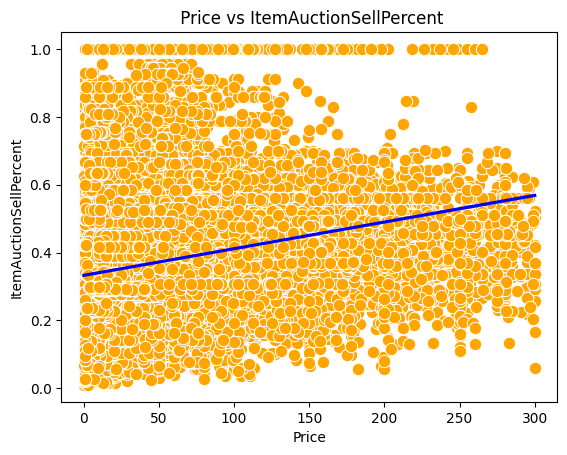

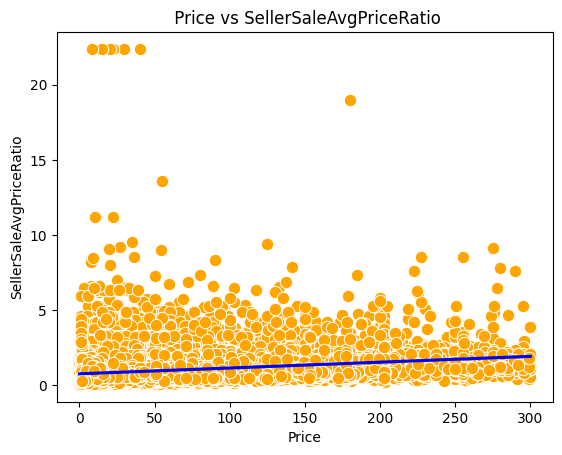

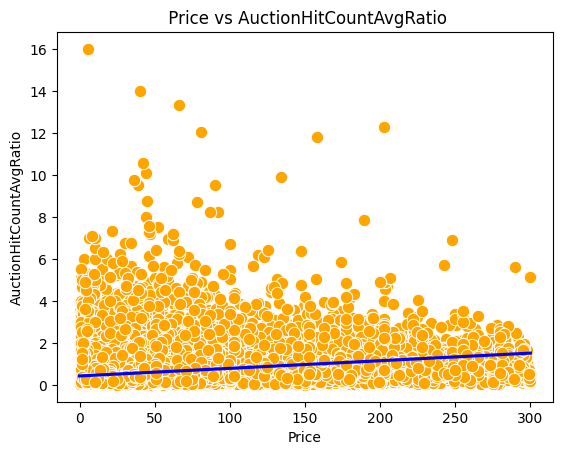

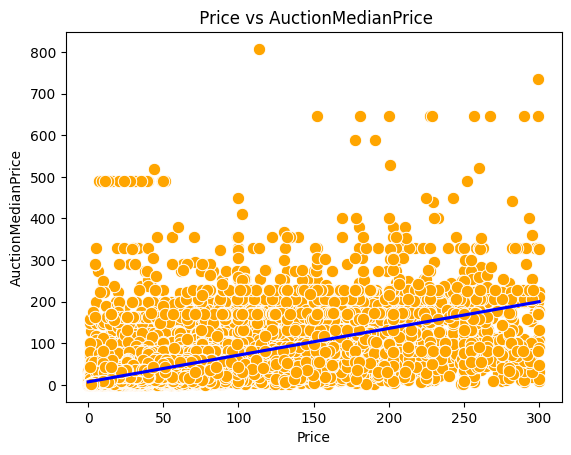

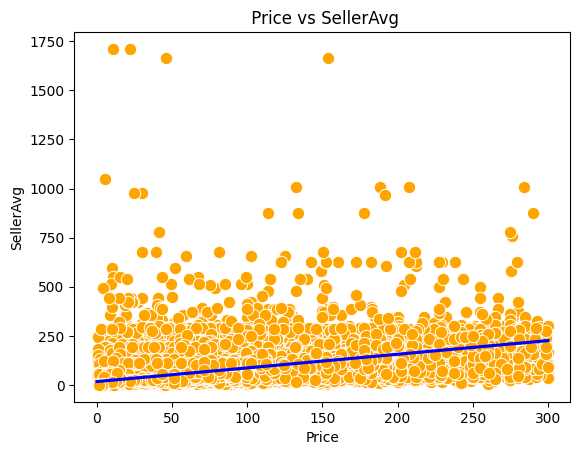

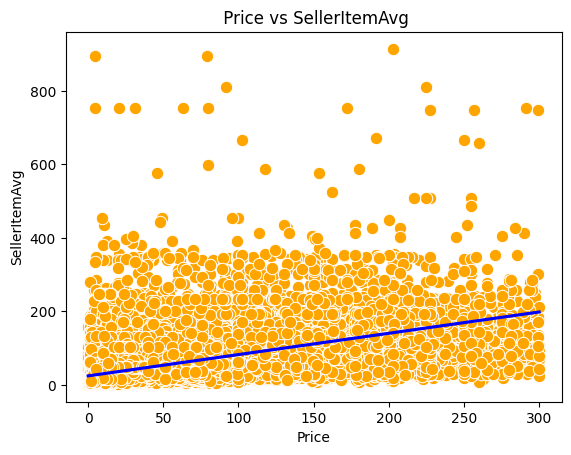

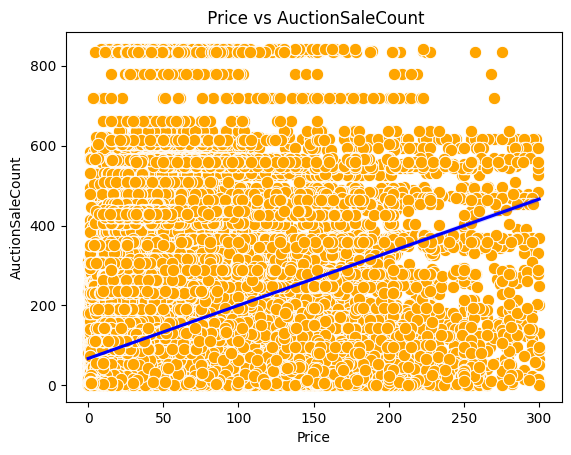

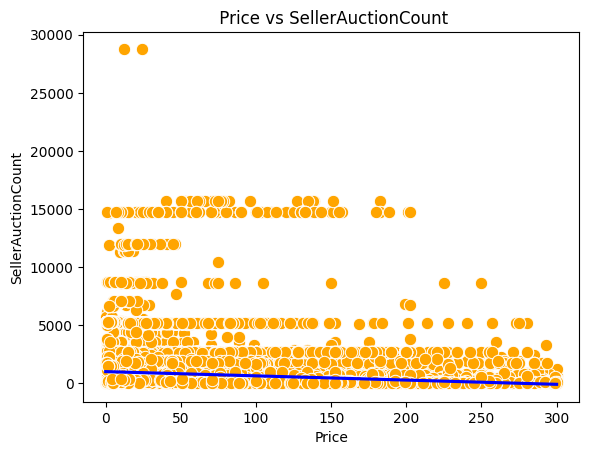

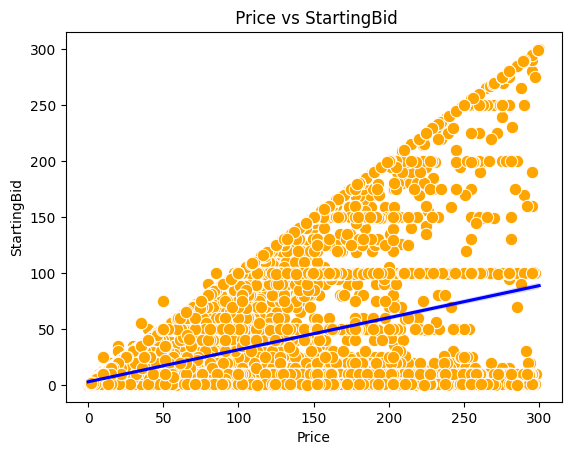

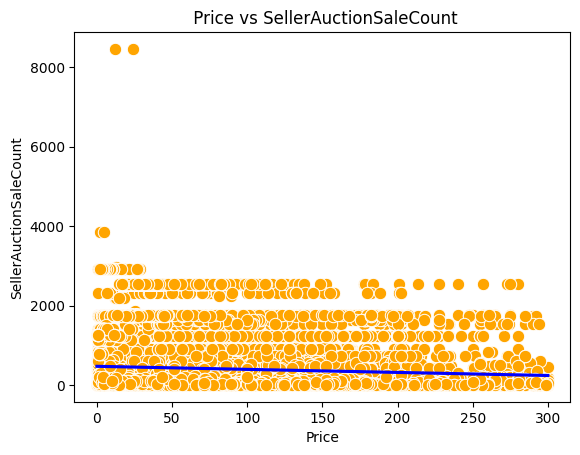

In [36]:
for i in continuous_numerical:
    bivariate(i)

- Discrete variables vs Price

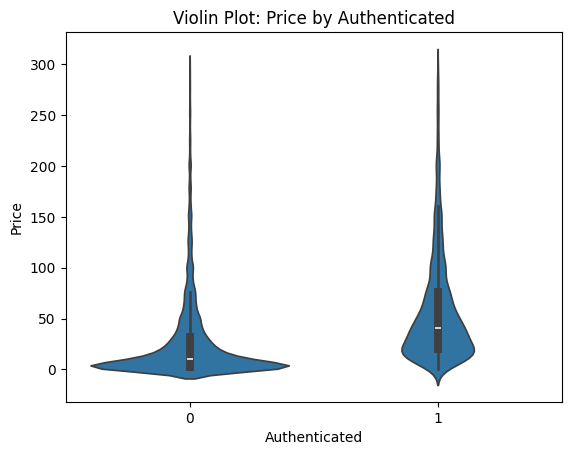

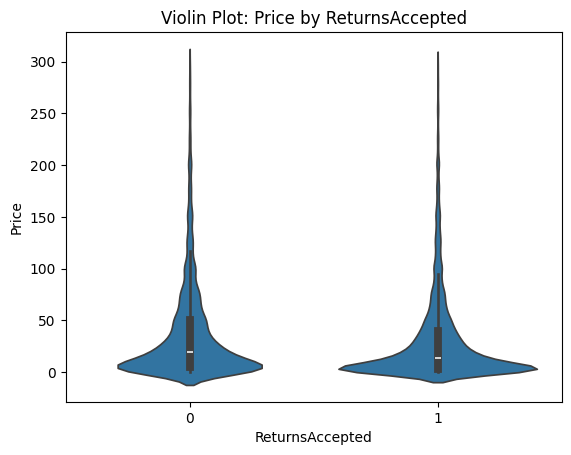

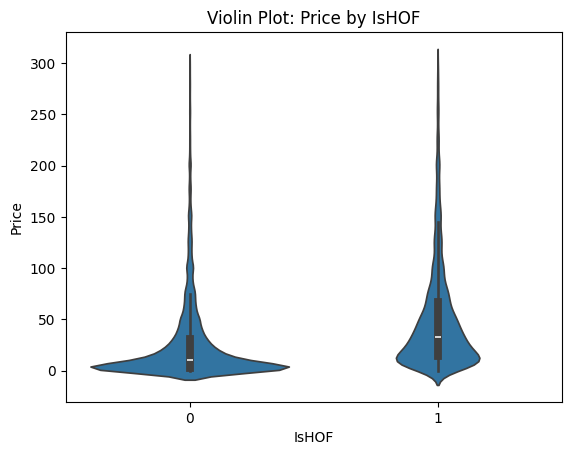

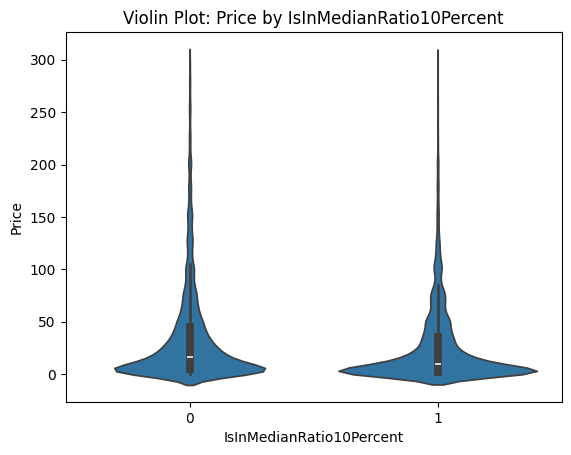

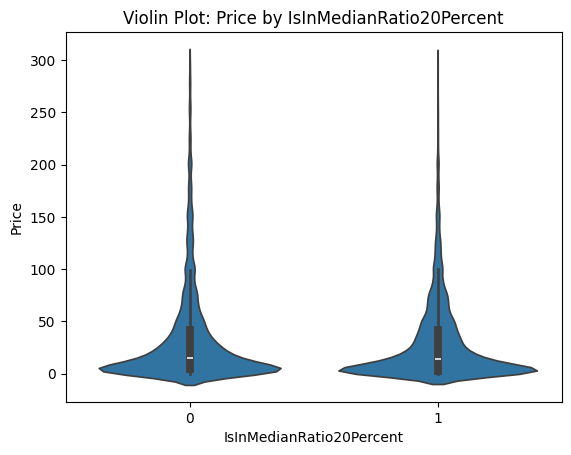

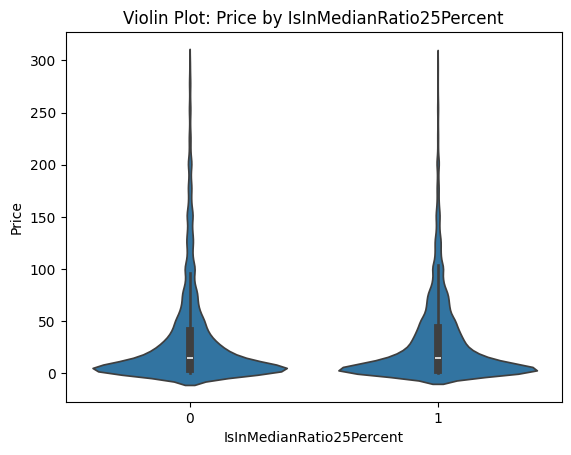

In [53]:
def disc_biv(col):
    sns.violinplot(x=col, y='Price', data=df_sub)
    plt.title(f"Violin Plot: Price by {col}")
    plt.show()
    
for i in discrete_numerical:
    disc_biv(i)

- categorical vs Price

C:\Users\Xaris\AppData\Local\Temp\ipykernel_19052\1938123635.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


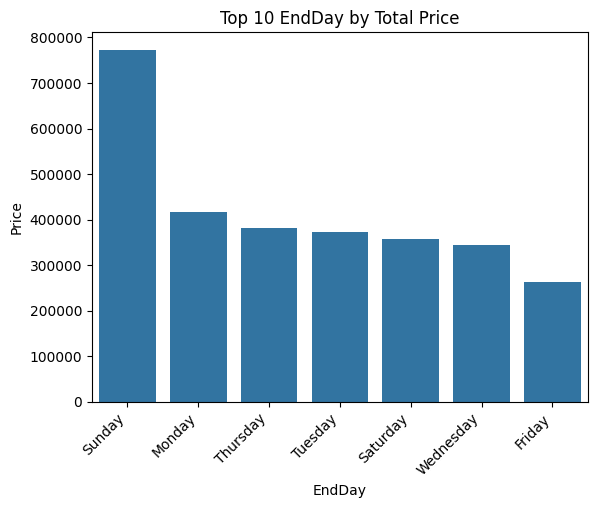

C:\Users\Xaris\AppData\Local\Temp\ipykernel_19052\1938123635.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


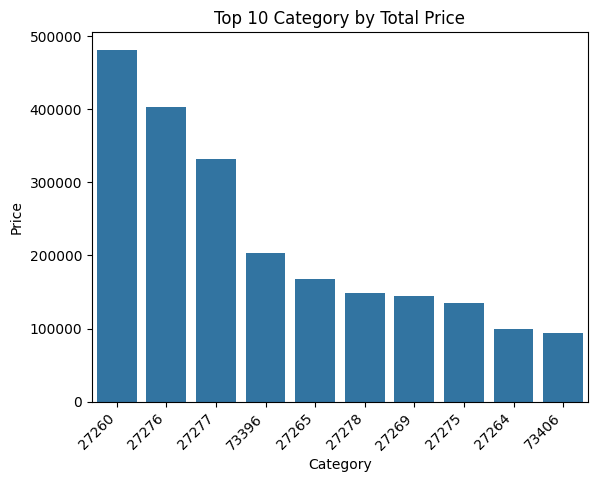

C:\Users\Xaris\AppData\Local\Temp\ipykernel_19052\1938123635.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


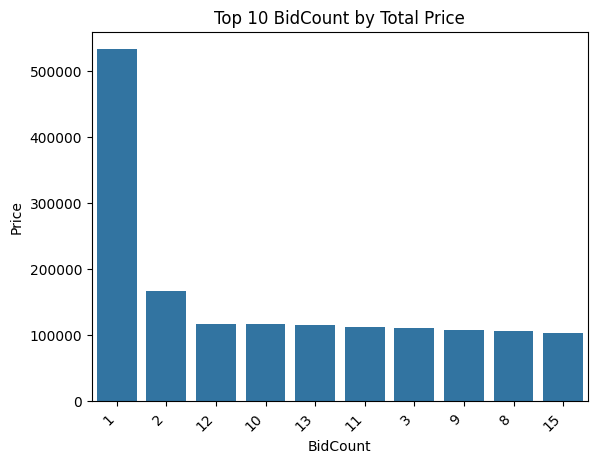

In [38]:
def categ_biv(col):
    # get top 10 categories by sum of Price
    top10 = (
        df_sub
        .groupby(col)['Price']
        .sum()
        .nlargest(10)
        .index
    )
    
    # filter dataframe
    df_top10 = df_sub[df_sub[col].isin(top10)]
    
    sns.barplot(
        x=col,
        y='Price',
        data=df_top10,
        estimator=sum,
        ci=None,
        order=top10
    )
    
    plt.title(f"Top 10 {col} by Total Price")
    plt.xticks(rotation=45, ha='right')
    plt.show()

for i in categorical:
    categ_biv(i)

# Data Preprocessing

Data Cleaning

In [39]:
# Check for null values
df_sub.isnull().sum()

Price                       0
PricePercent                0
StartingBidPercent          0
SellerClosePercent          0
Category                    0
StartingBid                 0
AvgPrice                    0
EndDay                      0
HitCount                    0
AuctionAvgHitCount          0
Authenticated               0
ItemAuctionSellPercent      0
SellerSaleAvgPriceRatio     0
SellerAvg                   0
SellerItemAvg               0
AuctionHitCountAvgRatio     0
ReturnsAccepted             0
IsHOF                       0
BidCount                    0
AuctionSaleCount            0
SellerAuctionCount          0
SellerAuctionSaleCount      0
AuctionMedianPrice          0
IsInMedianRatio10Percent    0
IsInMedianRatio20Percent    0
IsInMedianRatio25Percent    0
dtype: int64

There are no missing values in the columns.

In [40]:
# Check for duplicated values
df_sub.duplicated().sum()

np.int64(389)

In [41]:
# Drop the duplicates
df_sub = df_sub.drop_duplicates()

# Feature Encoding

The EndDay column is an ordinal variables. I need to encode this column since the linear models require numerical inputs.<br>
I will encode this column using One Hot Encoding Technique since the order of days do not matters.<br>
However there is a problem with this technique since the dimensions raised.<br>
Feature Encoding will be implemented after splitting the data in order to prevent data leakage and promote better model generalization.

# Split the data

Split the data into 3 parts.<br>
Training Set, Validation Set, and Validation Set. The validation set it is used for hyperparameter tuning of a model.<br>
So we will keep the 80% as training set.<br>
10% as testing set. <br>
10% as validation set.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# The X value are the independent variables
X = df_sub.iloc[:,1:]

# The target variables for this Task is the 'Price'
y = df_sub.iloc[:,:1]

# Splitting dataset in 80-20 fashion .i.e. 
# Training set is 80% of total data
# Combined set of testing & validation is 
# 20% of total data
X_train, x_Combine, y_train, y_Combine = train_test_split(X,y,
                                              train_size=0.8,
                                              random_state=42)

# Splitting combined dataset in 50-50 fashion .i.e. 
# Testing set is 50% of combined dataset
# Validation set is 50% of combined dataset
X_val, X_test, y_val, y_test = train_test_split(x_Combine,
                                                y_Combine,
                                                test_size=0.5,
                                                random_state=42)

# Define which cateogory needs to encoding
encod_cat = ['EndDay']
numerical_cols = X_train.drop(columns=encod_cat).columns

# Define the preprocess 
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False),
         ['EndDay'])
    ],
    remainder='passthrough'
)

# Fit on training data
X_train = preprocess.fit_transform(X_train)

# Transform validation & test data
X_val = preprocess.transform(X_val)
X_test = preprocess.transform(X_test)

In [44]:
# Training set 
print("Training set x: ",X_train.shape)
print("Training set y: ",y_train.shape)
print("  ")

# Testing set 
print("Testing set x: ",X_test.shape)
print("Testing set y: ",y_test.shape)
print("  ")

# Validation set 
print("Validation set x: ",X_val.shape)
print("Validation set y: ",y_val.shape)

Training set x:  (70988, 31)
Training set y:  (70988, 1)
  
Testing set x:  (8874, 31)
Testing set y:  (8874, 1)
  
Validation set x:  (8873, 31)
Validation set y:  (8873, 1)


Apply backward feature selection for linear regression

In [45]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, ElasticNet
# Define model
linearreg = LinearRegression()

# Define backward feature selector
sfs = SequentialFeatureSelector(
    estimator=linearreg,
    direction='backward',       #  backward selection
    scoring='r2',              # use 'r2' for regression
    cv=5,                      # cross-validation folds
    n_jobs=-1                  # parallel processing
)

# Fit on training data
sfs.fit(X_train, y_train)
# Get feature names from the preprocessor
feature_names = preprocess.get_feature_names_out()
# Get selected feature indices
selected_features = feature_names[sfs.get_support()]
print(selected_features)

['remainder__PricePercent' 'remainder__StartingBidPercent'
 'remainder__SellerClosePercent' 'remainder__StartingBid'
 'remainder__HitCount' 'remainder__Authenticated'
 'remainder__ItemAuctionSellPercent' 'remainder__SellerSaleAvgPriceRatio'
 'remainder__SellerAvg' 'remainder__SellerItemAvg'
 'remainder__AuctionHitCountAvgRatio' 'remainder__BidCount'
 'remainder__AuctionSaleCount' 'remainder__SellerAuctionSaleCount'
 'remainder__AuctionMedianPrice' 'remainder__IsInMedianRatio10Percent']


As we can see it keeps only 16 features out of 31.

In [46]:
import pandas as pd
import statsmodels.api as sm

# Convert preprocessed arrays to DataFrame with feature names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df  = pd.DataFrame(X_test, columns=feature_names)

# Select only the features chosen by SFS
X_train_selected = X_train_df[selected_features]
X_test_selected  = X_test_df[selected_features]

# Add constant term for intercept
X_train_selected = sm.add_constant(X_train_selected)
X_test_selected  = sm.add_constant(X_test_selected)
# Make sure y_train has default integer indices
y_train_reset = y_train.reset_index(drop=True)
# Fit OLS model
ols_model = sm.OLS(y_train_reset, X_train_selected).fit()

# Summary of OLS regression
print(ols_model.summary())

# Optional: Predict on test set
y_pred = ols_model.predict(X_test_selected)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 2.205e+04
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:10:56   Log-Likelihood:            -3.0822e+05
No. Observations:               70988   AIC:                         6.165e+05
Df Residuals:                   70971   BIC:                         6.166e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In order to be sure that the variables which remain after the backward selection does not have any multicolinearity issue i am gonna calculate the VIF for these.

In [ ]:
#recalculate the VIF
vif = pd.DataFrame()
vif["feature"] = X_train_selected.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_selected.values, i)
    for i in range(X_train_selected.shape[1])
]
print(vif)


                                feature        VIF
0                                 const  13.882272
1               remainder__PricePercent   2.200572
2         remainder__StartingBidPercent   2.793392
3         remainder__SellerClosePercent   1.458841
4                remainder__StartingBid   2.043896
5                   remainder__HitCount   3.609529
6              remainder__Authenticated   1.179778
7     remainder__ItemAuctionSellPercent   1.125836
8    remainder__SellerSaleAvgPriceRatio   2.054663
9                  remainder__SellerAvg   4.336250
10             remainder__SellerItemAvg   4.070509
11   remainder__AuctionHitCountAvgRatio   1.821328
12                  remainder__BidCount   2.775868
13          remainder__AuctionSaleCount   1.298848
14    remainder__SellerAuctionSaleCount   1.115574
15        remainder__AuctionMedianPrice   3.019598
16  remainder__IsInMedianRatio10Percent   1.056445


All of the variables after backward selection have multicollinearity <5. <br>So there is no multicolinearity issue. 

# Interprete the results of multiple Linear Regrssion
- All of the independent variables are statistical significant (p<0.05).
- R-squared = 0.832 which mean that the 83.2% of the price variability explained by this model.<br>

- F test shows that the overall model is statistical significant.<br>

- Durbin-Watson = 2.012 which mean that there is not Autocorellation in residuals.<br>

The variables which have the biggest coeficients are:<br>

- StartingBidPercent = -9.11 which means that higher starting bid relative to typical price discourages bidding.<br>

- AuctionHitCountAvgRatio = -7.41. Relative underperformance vs average attention hurts price. <br>

- PricePercent = 16.25. So for +1 unit on Price Percent - > +16.52 in the final Price. 

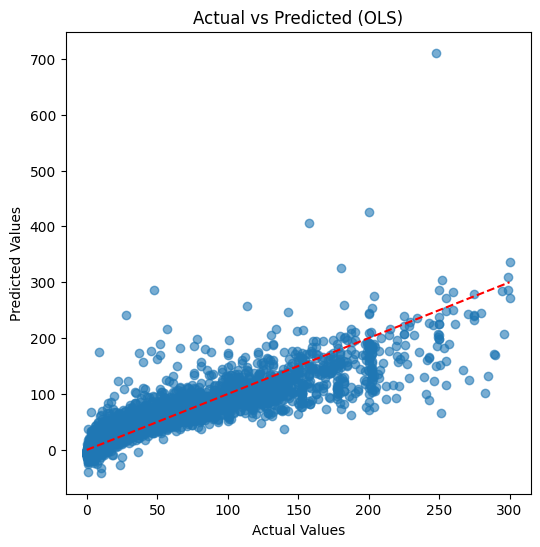

In [58]:
# let's create an actual vs predicted plot to see the 
# Reset y_test index to match predictions
y_test_reset = y_test.reset_index(drop=True)

plt.figure(figsize=(6, 6))
plt.scatter(y_test_reset, y_pred, alpha=0.6)
plt.plot(
    [y_test_reset.min(), y_test_reset.max()],
    [y_test_reset.min(), y_test_reset.max()],
    'r--'
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (OLS)")
plt.show()


Ridge and lasso regression

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
# Drop intercept (sklearn handles it)
X_train_np = X_train_selected.drop(columns="const")
X_test_np  = X_test_selected.drop(columns="const")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled  = scaler.transform(X_test_np)
ridge = Ridge(alpha=1.0)  # try multiple alphas later
ridge.fit(X_train_scaled, y_train_reset)

y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge R²:", r2_score(y_test_reset, y_pred_ridge))


Ridge R²: 0.8251834167072263


In [68]:
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train_reset)

y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso R²:", r2_score(y_test_reset, y_pred_lasso))

Lasso R²: 0.8253291995437458


KNN regressor. I choose to standardize the predictor variables so that variables of large scale
do not dominate the distance metric.

In [76]:
# Define the models in a list
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Decision Tree":DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor()
}

# Create param grids for every and each of these algorithms
params = {
    "Decision Tree": {
        'max_depth': [10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': [None, 'sqrt', 'log2']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
    }
}

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

report = {}

for model_name, model in models.items():
    para = params[model_name]
    
    param_dist = {}
    
    # GridSearch
    rs = RandomizedSearchCV(
    model,
    para,
    n_iter=5, 
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

    # We make fit on the X_train and y_train
    rs.fit(X_train, y_train)
    # Get the bestParmas 
    model.set_params(**rs.best_params_)
    
    model.fit(X_train, y_train)
    # get predicted prices on validation data
    val_predictions = model.predict(X_val)

    report[model_name] = {
        "best_params": rs.best_params_,
        "r2_test": r2_score(y_val, val_predictions),
        "rmse_test": np.sqrt(mean_squared_error(y_val, val_predictions))
    } 

In [49]:
report

{'Decision Tree': {'best_params': {'min_samples_split': 5,
   'min_samples_leaf': 2,
   'max_depth': 20},
  'r2_test': 0.9950095873767227,
  'rmse_test': np.float64(3.122622882338949)},
 'KNN': {'best_params': {'n_neighbors': 5},
  'r2_test': 0.8052462638138832,
  'rmse_test': np.float64(19.50716731064554)}}

In [73]:
report = {}

for model_name, model in models.items():
    para = params[model_name]

    # RandomizedSearchCV για tuning
    rs = GridSearchCV(
        model,
        para,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    # Fit στο training set
    rs.fit(X_train, y_train)
    model.set_params(**rs.best_params_)
    model.fit(X_train, y_train)

    # Προβλέψεις στο validation set
    val_predictions = model.predict(X_val)
    
    # Προβλέψεις στο test set
    test_predictions = model.predict(X_test)

    report[model_name] = {
        "best_params": rs.best_params_,
        "r2_val": r2_score(y_val, val_predictions),
        "rmse_val": np.sqrt(mean_squared_error(y_val, val_predictions)),
        "r2_test": r2_score(y_test, test_predictions),
        "rmse_test": np.sqrt(mean_squared_error(y_test, test_predictions))
    }

# Δες το report
import pprint  #pretty-print
pprint.pprint(report)

{'Decision Tree': {'best_params': {'max_depth': 20,
                                   'min_samples_leaf': 2,
                                   'min_samples_split': 5},
                   'r2_test': 0.9913038769056629,
                   'r2_val': 0.994741107317112,
                   'rmse_test': np.float64(4.237821409802334),
                   'rmse_val': np.float64(3.2055198018860733)},
 'KNN': {'best_params': {'n_neighbors': 5},
         'r2_test': 0.8124765512949746,
         'r2_val': 0.8052462638138832,
         'rmse_test': np.float64(19.67920737054538),
         'rmse_val': np.float64(19.50716731064554)}}


# Second Task

It is a classification problem in which we try to find if the auction leads to sell or not (0 or 1).<br>
For the purpose of this Task I will use the whole dataset (df1 + df2).

In [95]:
# First we will combine the Training and Test Subset
df_con = pd.concat([df1,df2],ignore_index=True, sort=False)
df_con.head()

EbayID  QuantitySold   Price  PricePercent  StartingBidPercent  \
0  400476160084             0    0.99        0.5892              0.5892   
1  350785007664             0  119.00        1.1427              1.1427   
2  380629932508             1    1.75        1.0416              0.4464   
3  300896813674             1   66.00        0.6338              0.0000   
4  200918931232             0    9.99        0.5197              0.5197   

           SellerName  SellerClosePercent  Category  PersonID  StartingBid  \
0          harryjean0            0.128269     73409      8215         0.99   
1          rrsports23            0.116667     27260        34       119.00   
2             mojo640            0.531599     73409      8215         0.75   
3      mintsignatures            0.971014     27260        34         0.01   
4  realdealsignatures            0.187117     27285     28504         9.99   

   AvgPrice    EndDay  HitCount  AuctionAvgHitCount  ItemAuctionSellPercent  \
0    1.6800    Sunday         5                  78                       0   
1  104.1330    Monday         6                  77                       1   
2    1.6800  Thursday         8                  78                       0   
3  104.1330  Saturday       116                  77                       0   
4   19.2203  Thursday         2                  55                       0   

   SellerSaleAvgPriceRatio  SellerAvg  SellerItemAvg  AuctionHitCountAvgRatio  \
0                 0.088608       0.42              3                        6   
1                 0.458494       1.67             50                       25   
2                 0.088608       0.30              2                        7   
3                 0.458494       0.80             49                       61   
4                 0.148515       0.28              2                        8   

   BestOffer  ReturnsAccepted  IsHOF  ItemListedCount  AuctionCount  \
0   0.064103                0      1                0            79   
1   0.077922                0      1                1          1819   
2   0.102564                0      0                0            79   
3   1.506494                0      1                1          1819   
4   0.036364                0      1                0           202   

   AuctionSaleCount  SellerAuctionCount  SellerAuctionSaleCount  \
0                 7                2791                     358   
1               834                  60                       7   
2                 7                 269                     143   
3               834                 138                     134   
4                30                 326                      61   

   AuctionMedianPrice  
0                0.99  
1               77.00  
2                0.99  
3               77.00  
4               11.00

In [96]:
df_con.shape

(296048, 28)

In [97]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296048 entries, 0 to 296047
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   EbayID                   296048 non-null  int64  
 1   QuantitySold             296048 non-null  int64  
 2   Price                    296048 non-null  float64
 3   PricePercent             296048 non-null  float64
 4   StartingBidPercent       296048 non-null  float64
 5   SellerName               296048 non-null  object 
 6   SellerClosePercent       296048 non-null  float64
 7   Category                 296048 non-null  int64  
 8   PersonID                 296048 non-null  int64  
 9   StartingBid              296048 non-null  float64
 10  AvgPrice                 296048 non-null  float64
 11  EndDay                   296048 non-null  object 
 12  HitCount                 296048 non-null  int64  
 13  AuctionAvgHitCount       296048 non-null  int64  
 14  Item

In [98]:
# Drop the columns which are not give further information (EbayID, SellerName, and PersonID)
df_con = df_con.drop(columns=['EbayID','SellerName','PersonID'],axis=1)

In [99]:
df_con.isnull().sum()

QuantitySold               0
Price                      0
PricePercent               0
StartingBidPercent         0
SellerClosePercent         0
Category                   0
StartingBid                0
AvgPrice                   0
EndDay                     0
HitCount                   0
AuctionAvgHitCount         0
ItemAuctionSellPercent     0
SellerSaleAvgPriceRatio    0
SellerAvg                  0
SellerItemAvg              0
AuctionHitCountAvgRatio    0
BestOffer                  0
ReturnsAccepted            0
IsHOF                      0
ItemListedCount            0
AuctionCount               0
AuctionSaleCount           0
SellerAuctionCount         0
SellerAuctionSaleCount     0
AuctionMedianPrice         0
dtype: int64

In [100]:
# Check for duplicated values
df_con.duplicated().sum()

np.int64(19296)

In [101]:
# Drop duplicates values
df_con = df_con.drop_duplicates()

In [102]:
df_con.shape

(276752, 25)

There are approximately 20000 duplicated values. These are 6% of the whole dataset. I will remove these duplicates permanently.

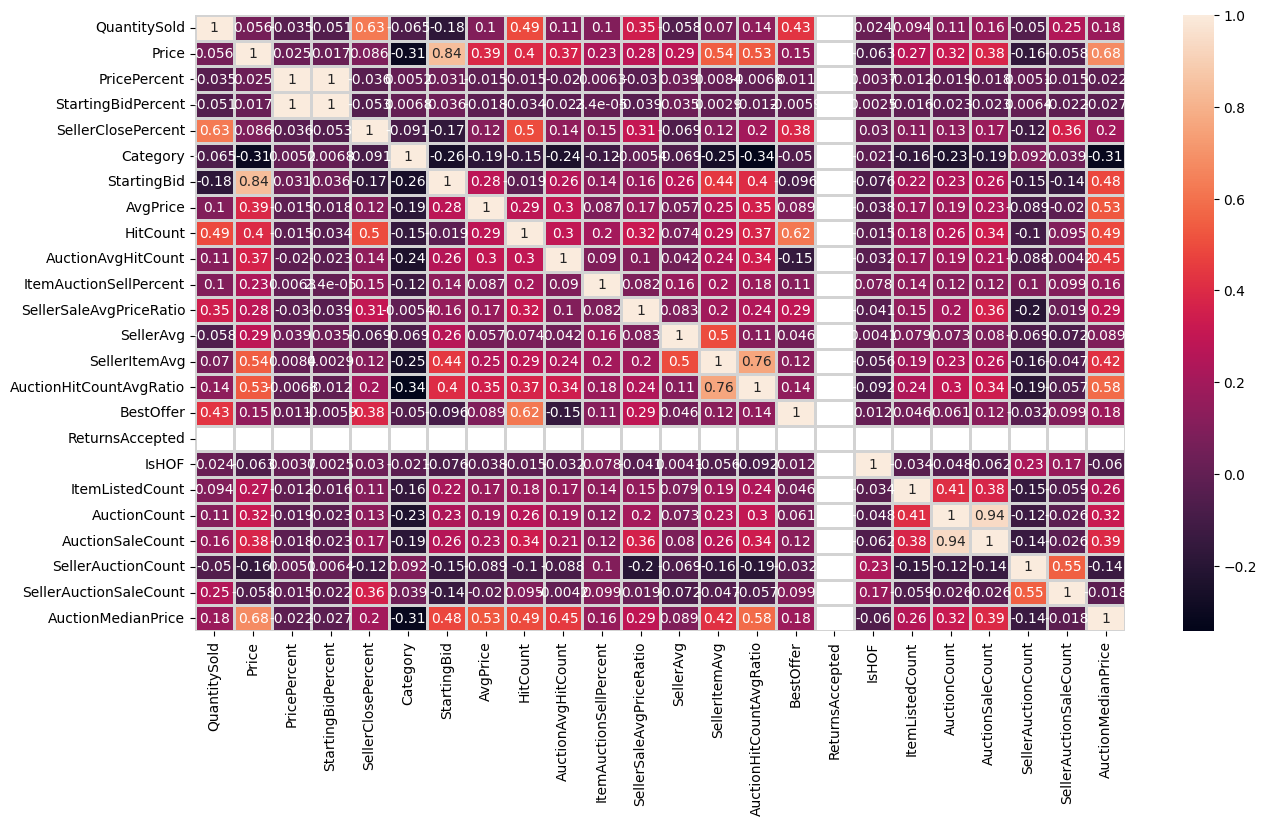

In [103]:
# Display Correlation matrix only for the numerical variables (only EndDay excluded)
plt.figure(figsize = (15, 8))
sns.heatmap(df_con.select_dtypes(include='number').corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

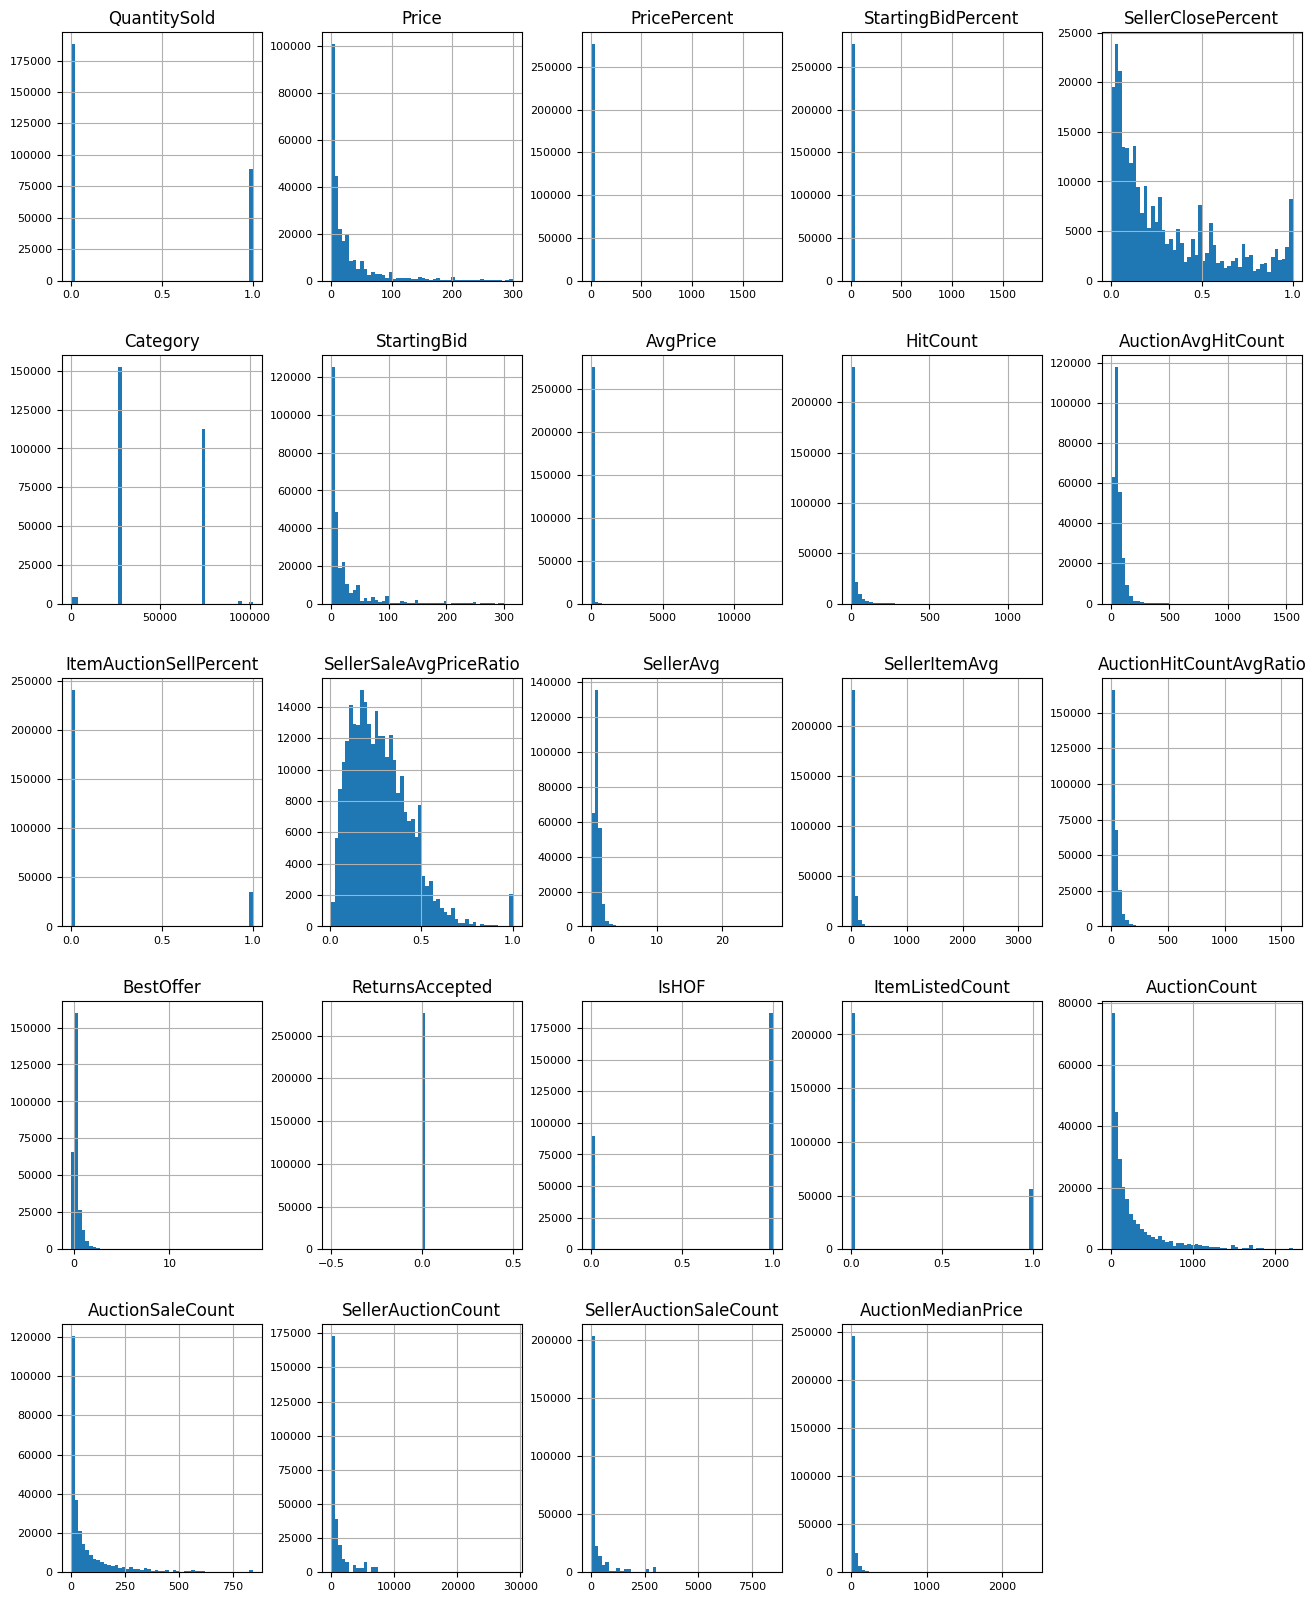

In [104]:
df_con.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [108]:
df_con.columns

Index(['QuantitySold', 'Price', 'PricePercent', 'StartingBidPercent',
       'SellerClosePercent', 'Category', 'StartingBid', 'AvgPrice', 'EndDay',
       'HitCount', 'AuctionAvgHitCount', 'ItemAuctionSellPercent',
       'SellerSaleAvgPriceRatio', 'SellerAvg', 'SellerItemAvg',
       'AuctionHitCountAvgRatio', 'BestOffer', 'ReturnsAccepted', 'IsHOF',
       'ItemListedCount', 'AuctionCount', 'AuctionSaleCount',
       'SellerAuctionCount', 'SellerAuctionSaleCount', 'AuctionMedianPrice'],
      dtype='object')

In [121]:
cont_data = [
    "Price",
    "PricePercent",
    "StartingBidPercent",
    "SellerClosePercent",
    "HitCount",
    "AvgPrice",
    "AuctionAvgHitCount",
    "SellerSaleAvgPriceRatio",
    "AuctionHitCountAvgRatio",
    "AuctionMedianPrice",
    "SellerAvg",
    "SellerItemAvg",
    'AuctionSaleCount',
    "SellerAuctionCount",
    "StartingBid",
    "SellerAuctionSaleCount",
    'BestOffer',
    'AuctionCount'
]

discr_data = [
    "Authenticated",
    "ReturnsAccepted",
    "IsHOF",
    "Category",
    'ItemListedCount',
    'QuantitySold',
    'ItemAuctionSellPercent']

ordinal = [
    "EndDay"]

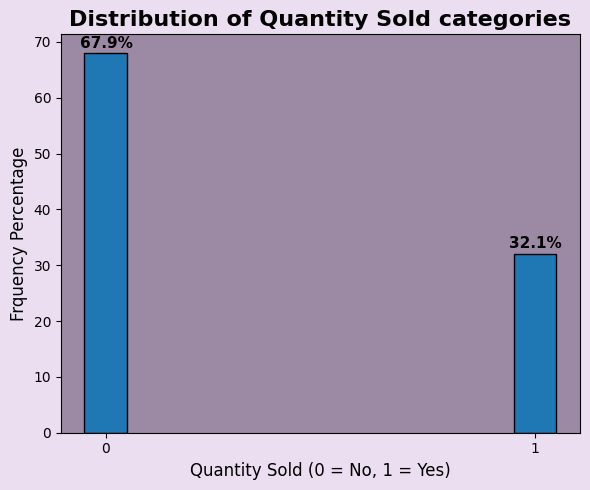

In [ ]:
# Plot the Independent (target) variable Quantity Sold
plt.figure(figsize=(6, 5))

counts = df_con['QuantitySold'].value_counts(normalize=True) * 100
categories = counts.index
values = counts.values

# Add frequency percentages to the plot
for i, v in enumerate(values):
    plt.text(categories[i], v + 1, f'{v:.1f}%', 
             ha='center', fontsize=11, fontweight='bold')
    
bars = plt.bar(categories, values, edgecolor='black', width = 0.1)
plt.title(f'Distribution of Quantity Sold categories', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frquency Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.xticks(np.arange(0, 1.1, step=1))
plt.gca().set_facecolor("#9C89A4")       
plt.gcf().set_facecolor('#EBDEF0')       
plt.grid(False)                  
plt.tight_layout()
plt.show()

As we can see from the above distribution of Quantity SoldFrequency Percentage the dataset is imbalanced.

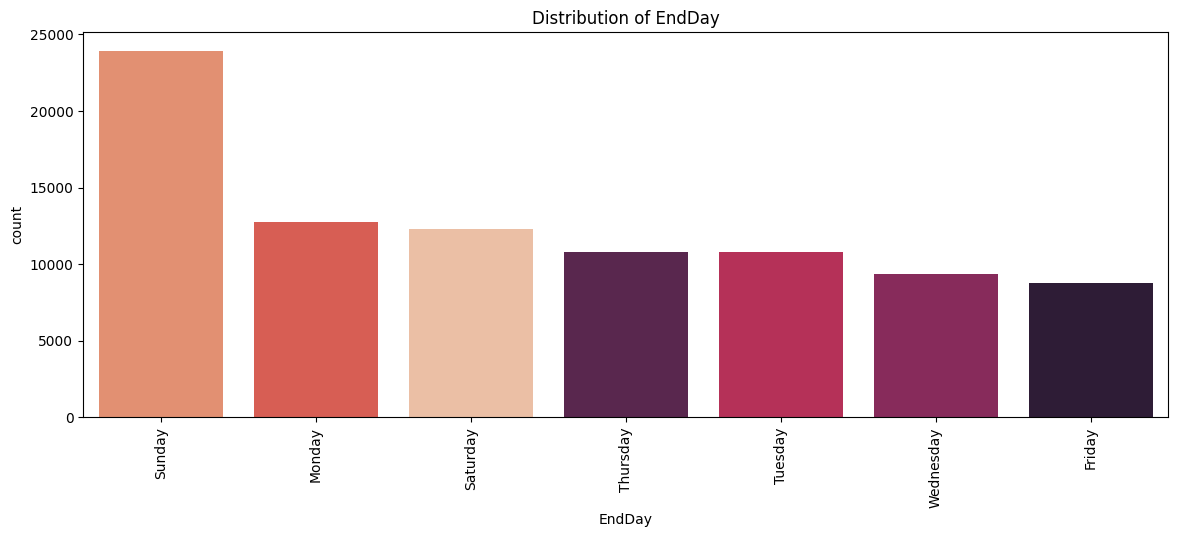

In [112]:
for i in ordinal:
    categ(i)

In [117]:
def plot_hist_box(col, color="mediumspringgreen", figsize=(20,13)):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)

    # Histogram + KDE
    sns.histplot(data=df_con, x=col, kde=True, color=color, ax=axes[0])
    axes[0].set_title(f"{col} Histogram", fontsize=18)
    axes[0].set_xlabel(None)

    # Boxplot
    sns.boxplot(data=df_con, x=col, color=color, ax=axes[1])
    axes[1].set_title(f"{col} Boxplot", fontsize=18)
    axes[1].set_xlabel(None)

    plt.tight_layout()
    plt.show()

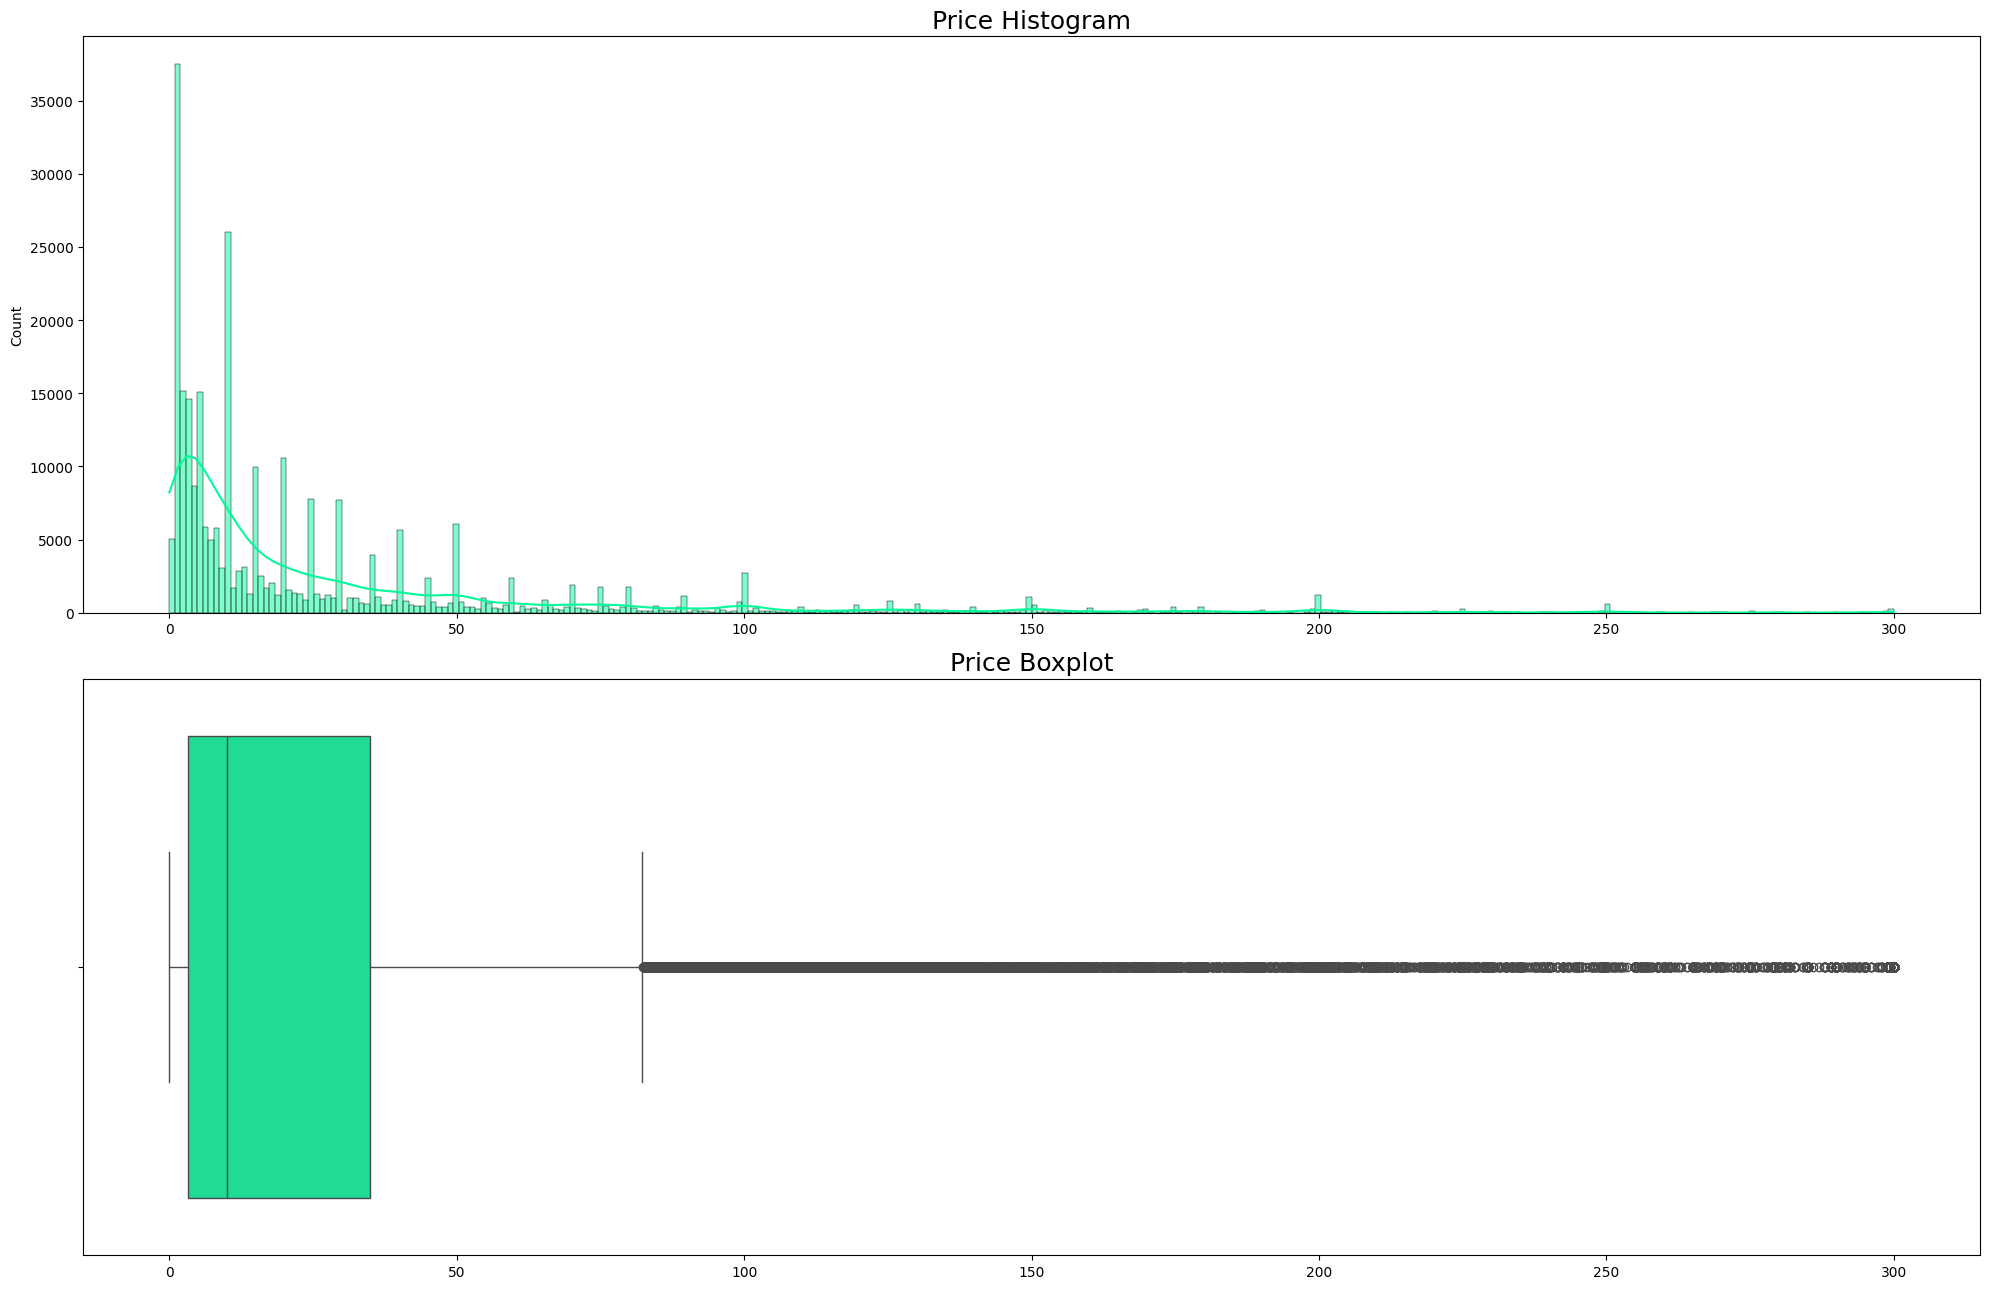

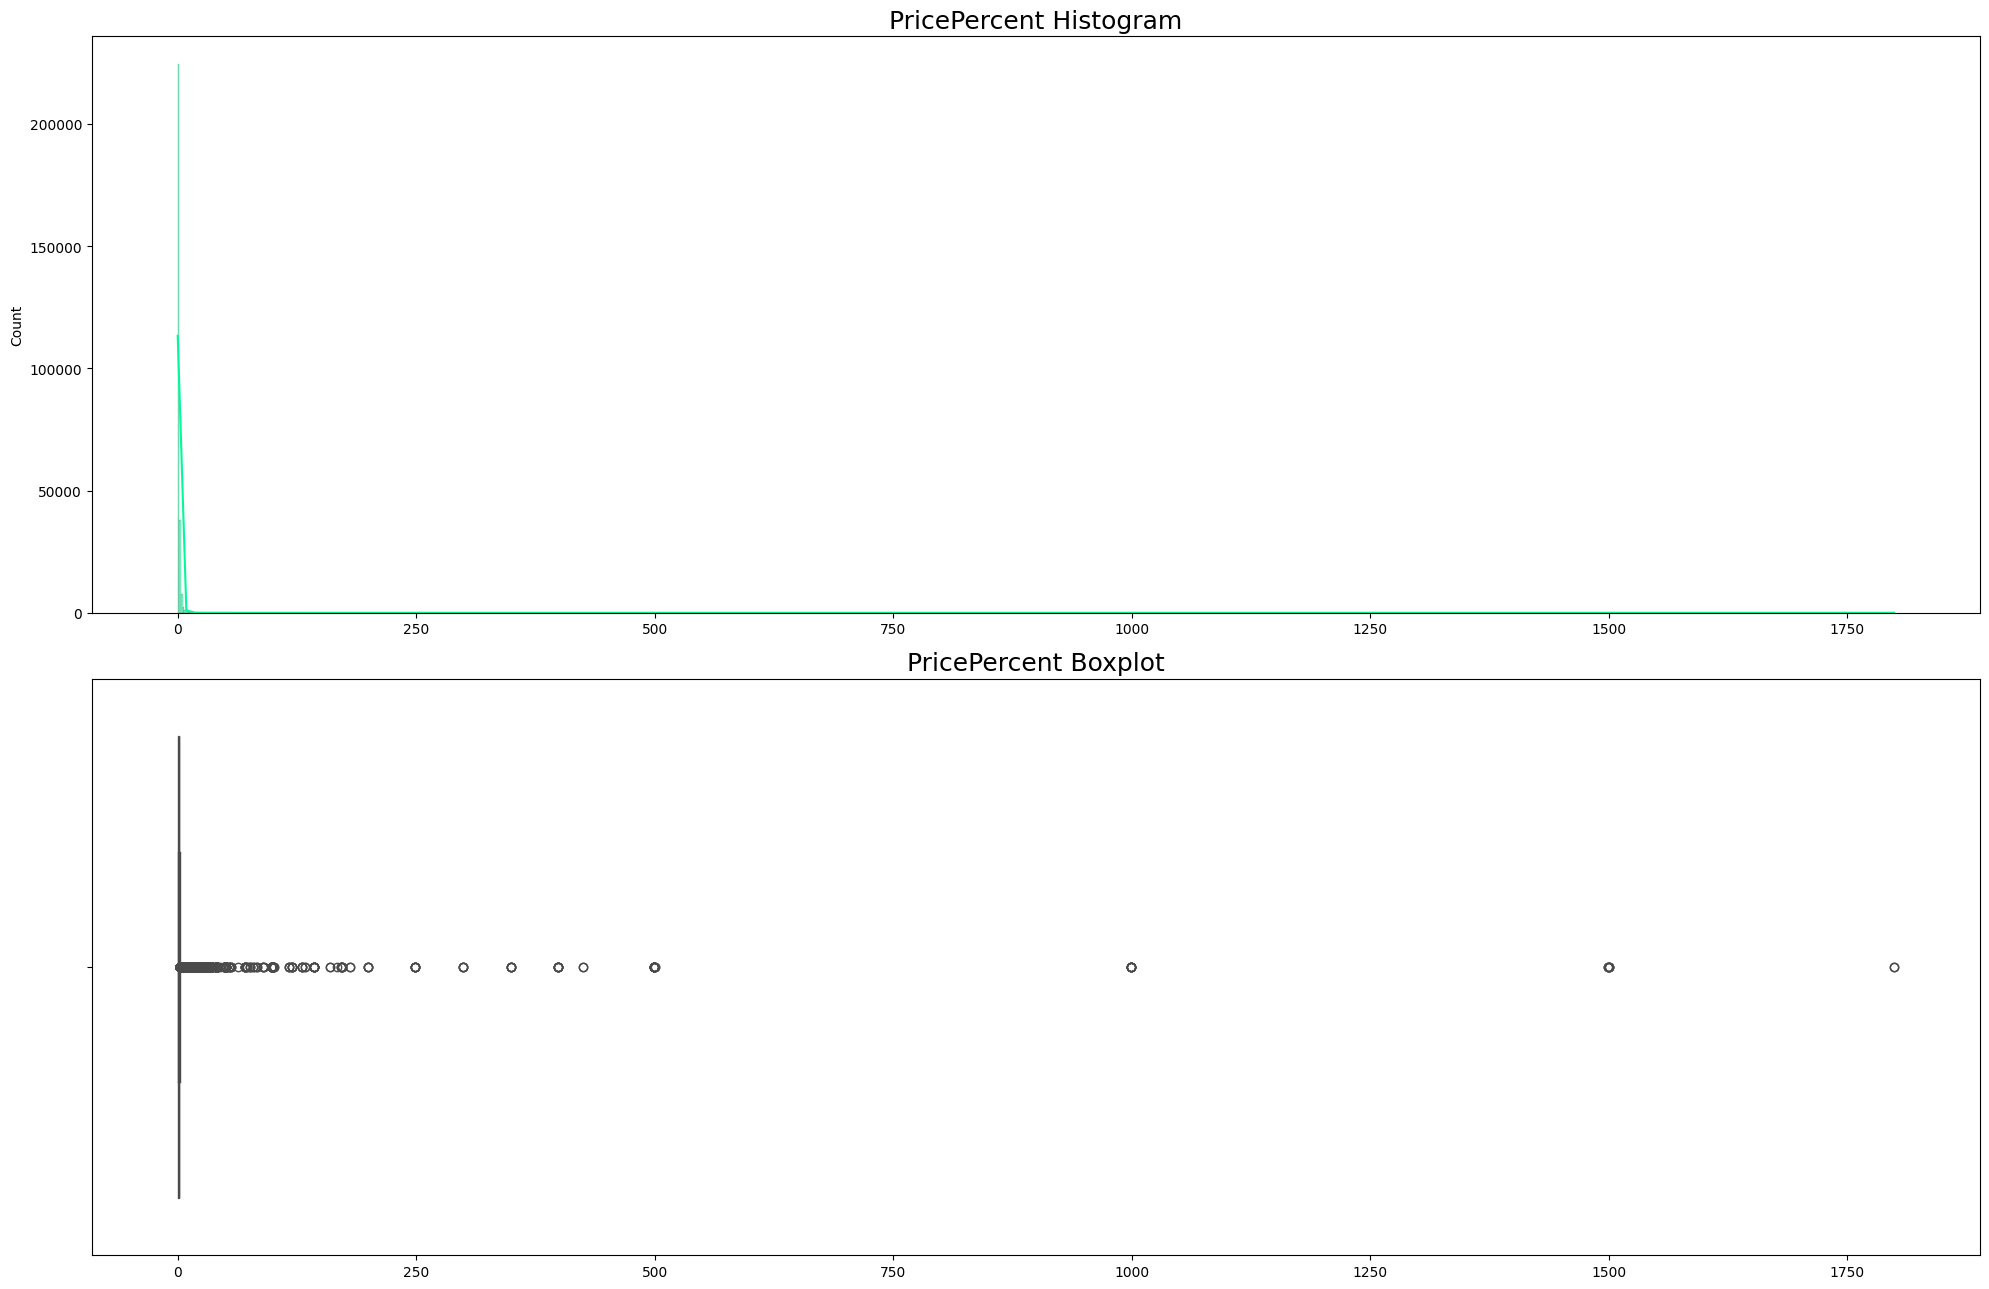

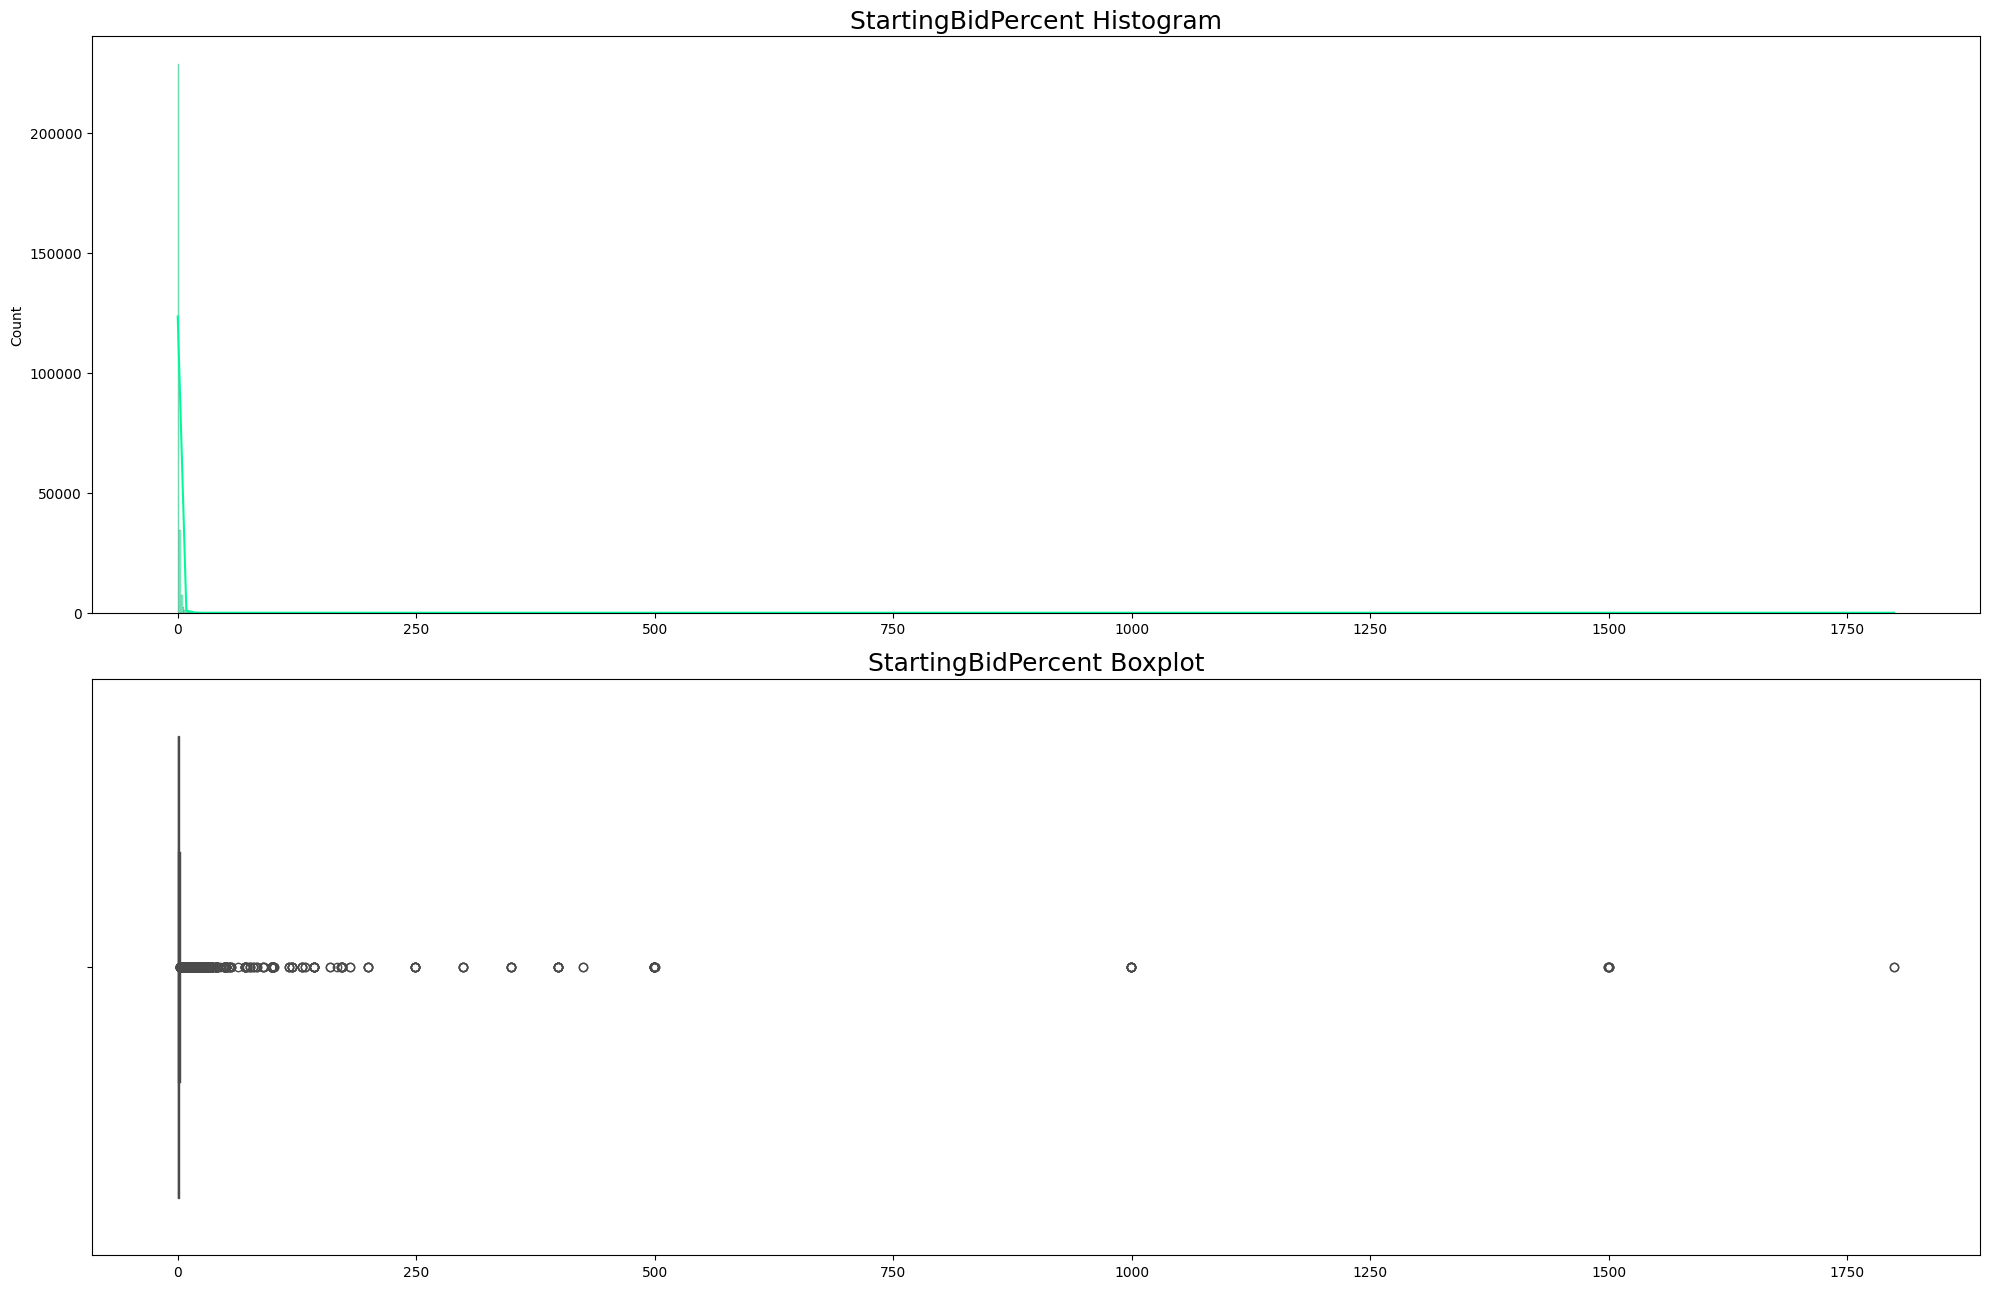

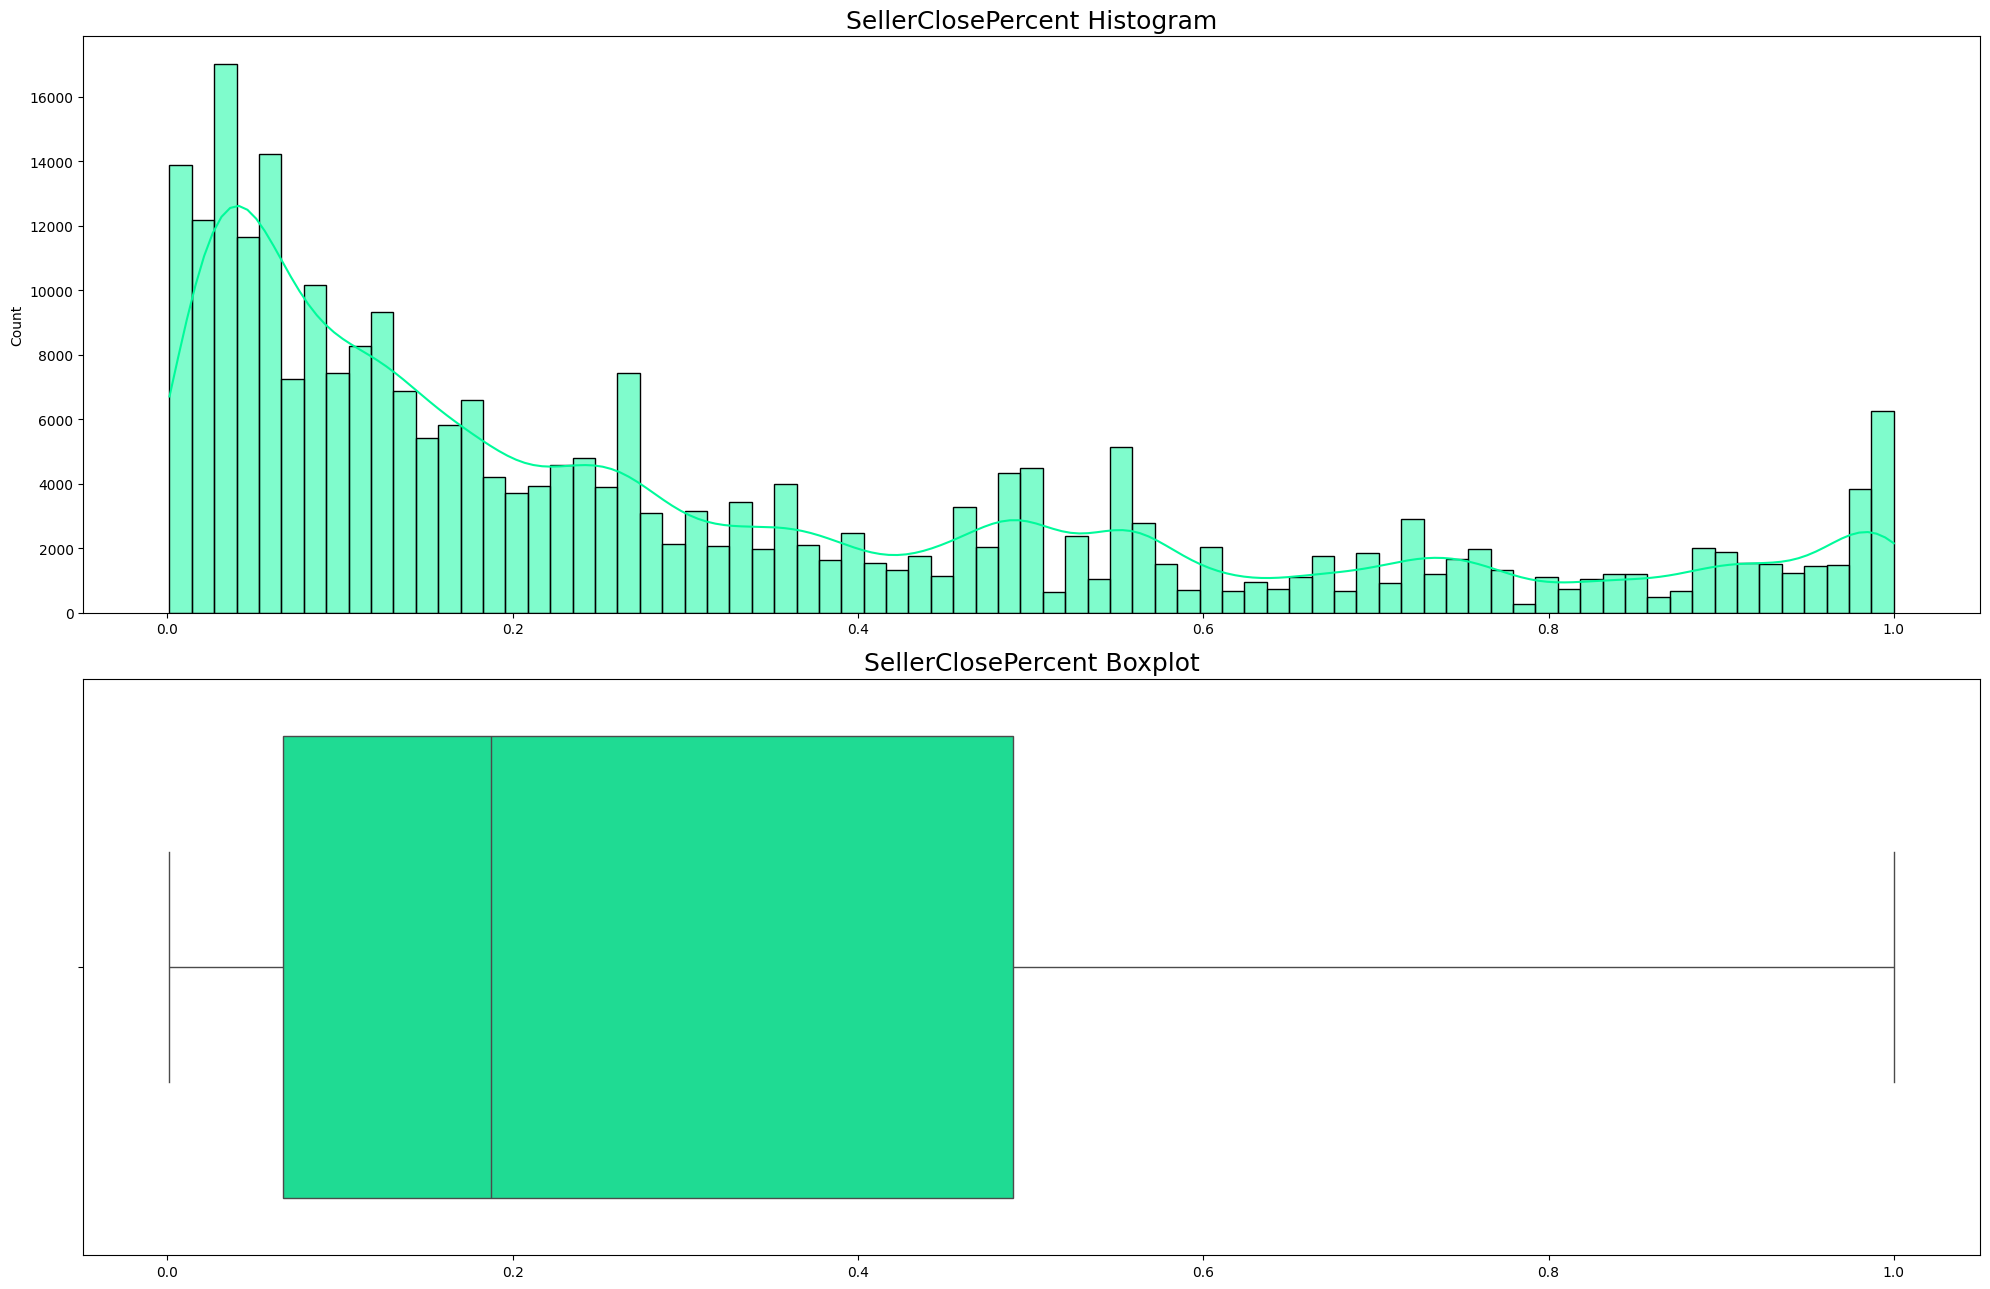

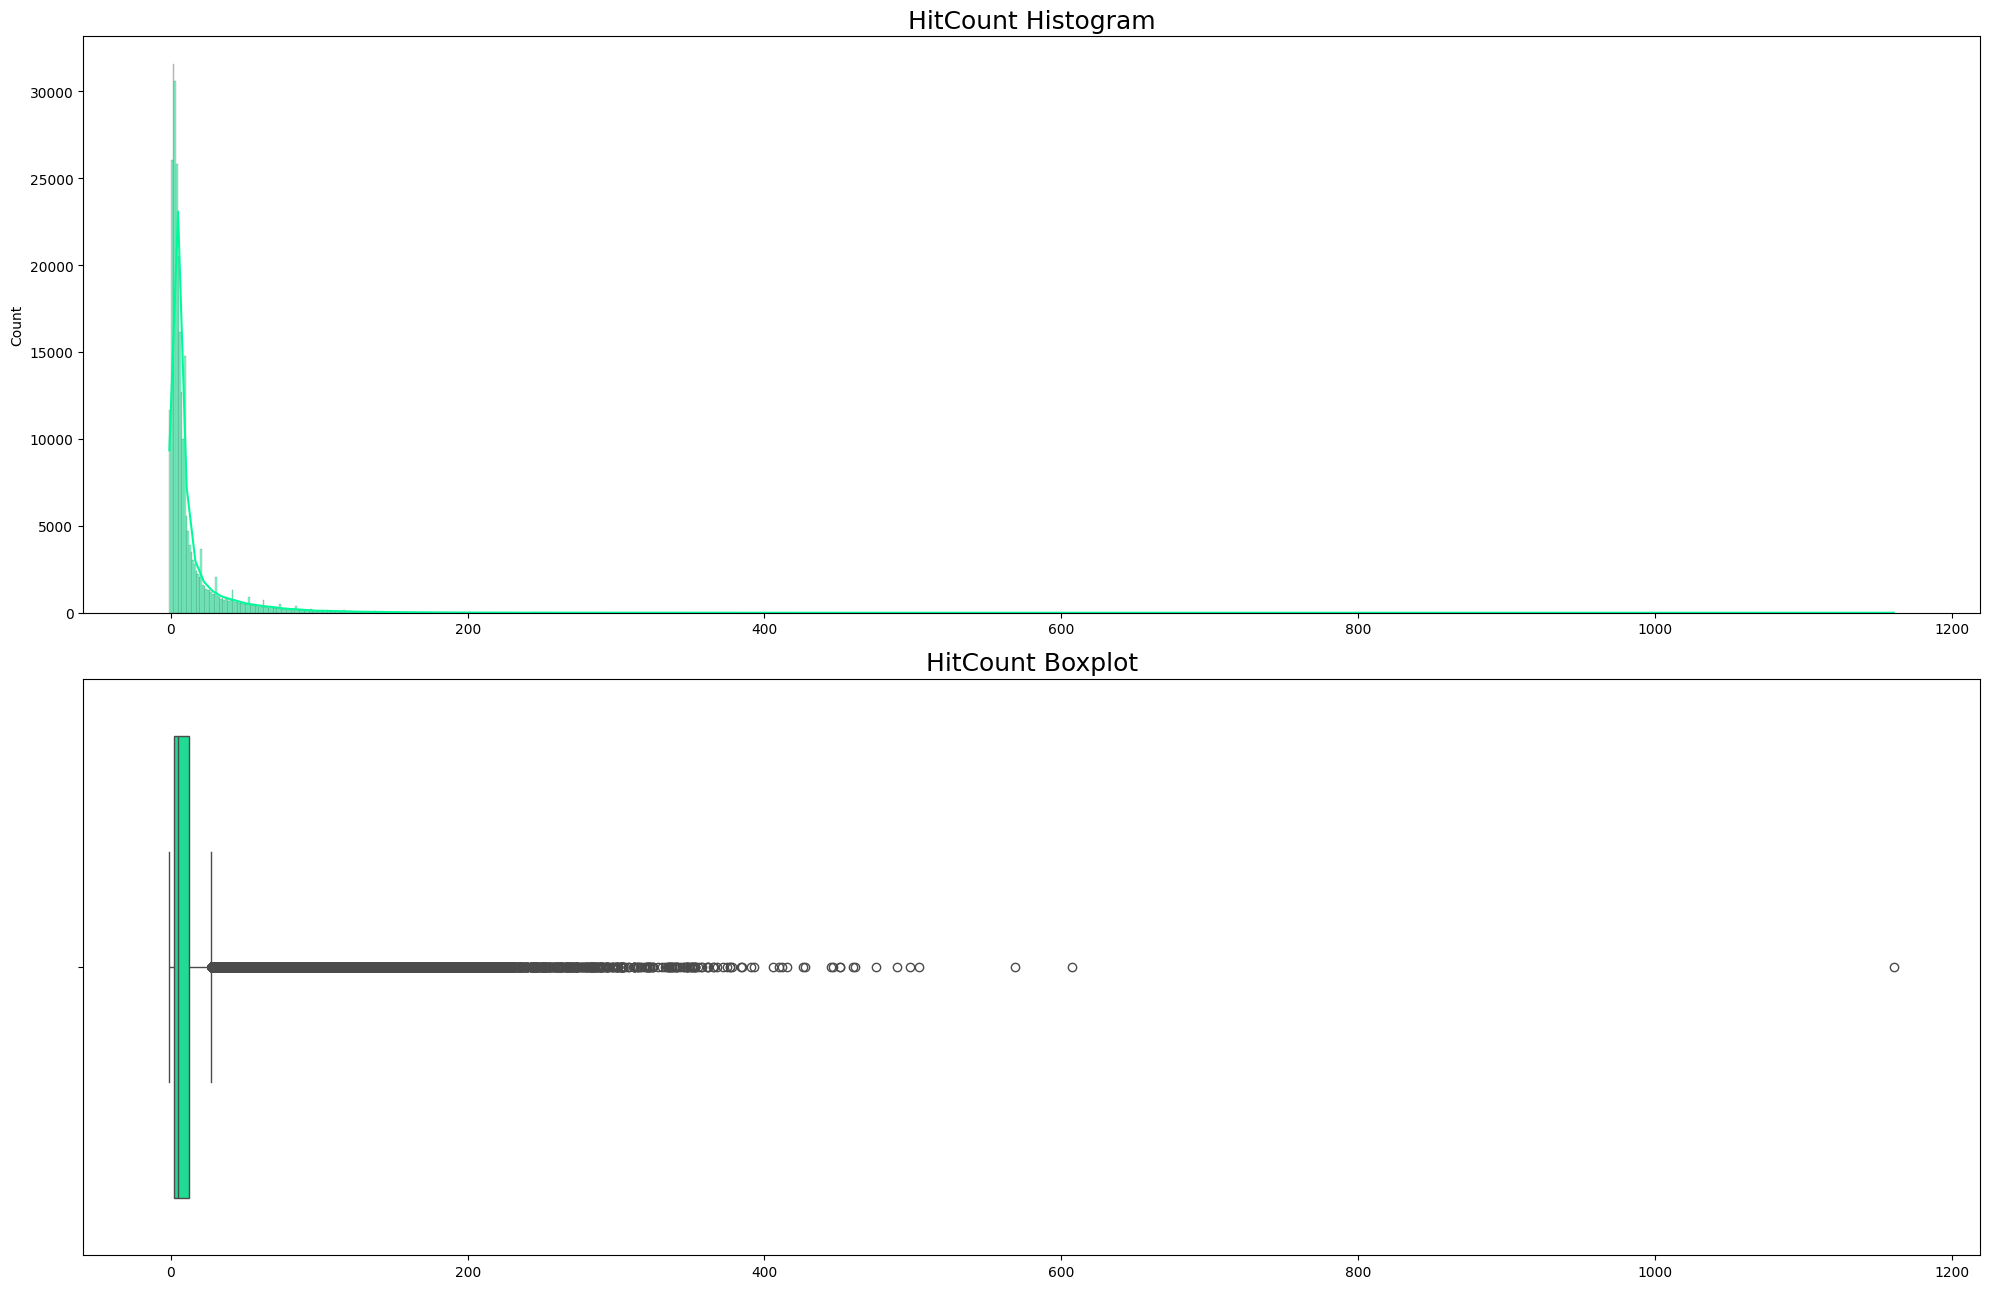

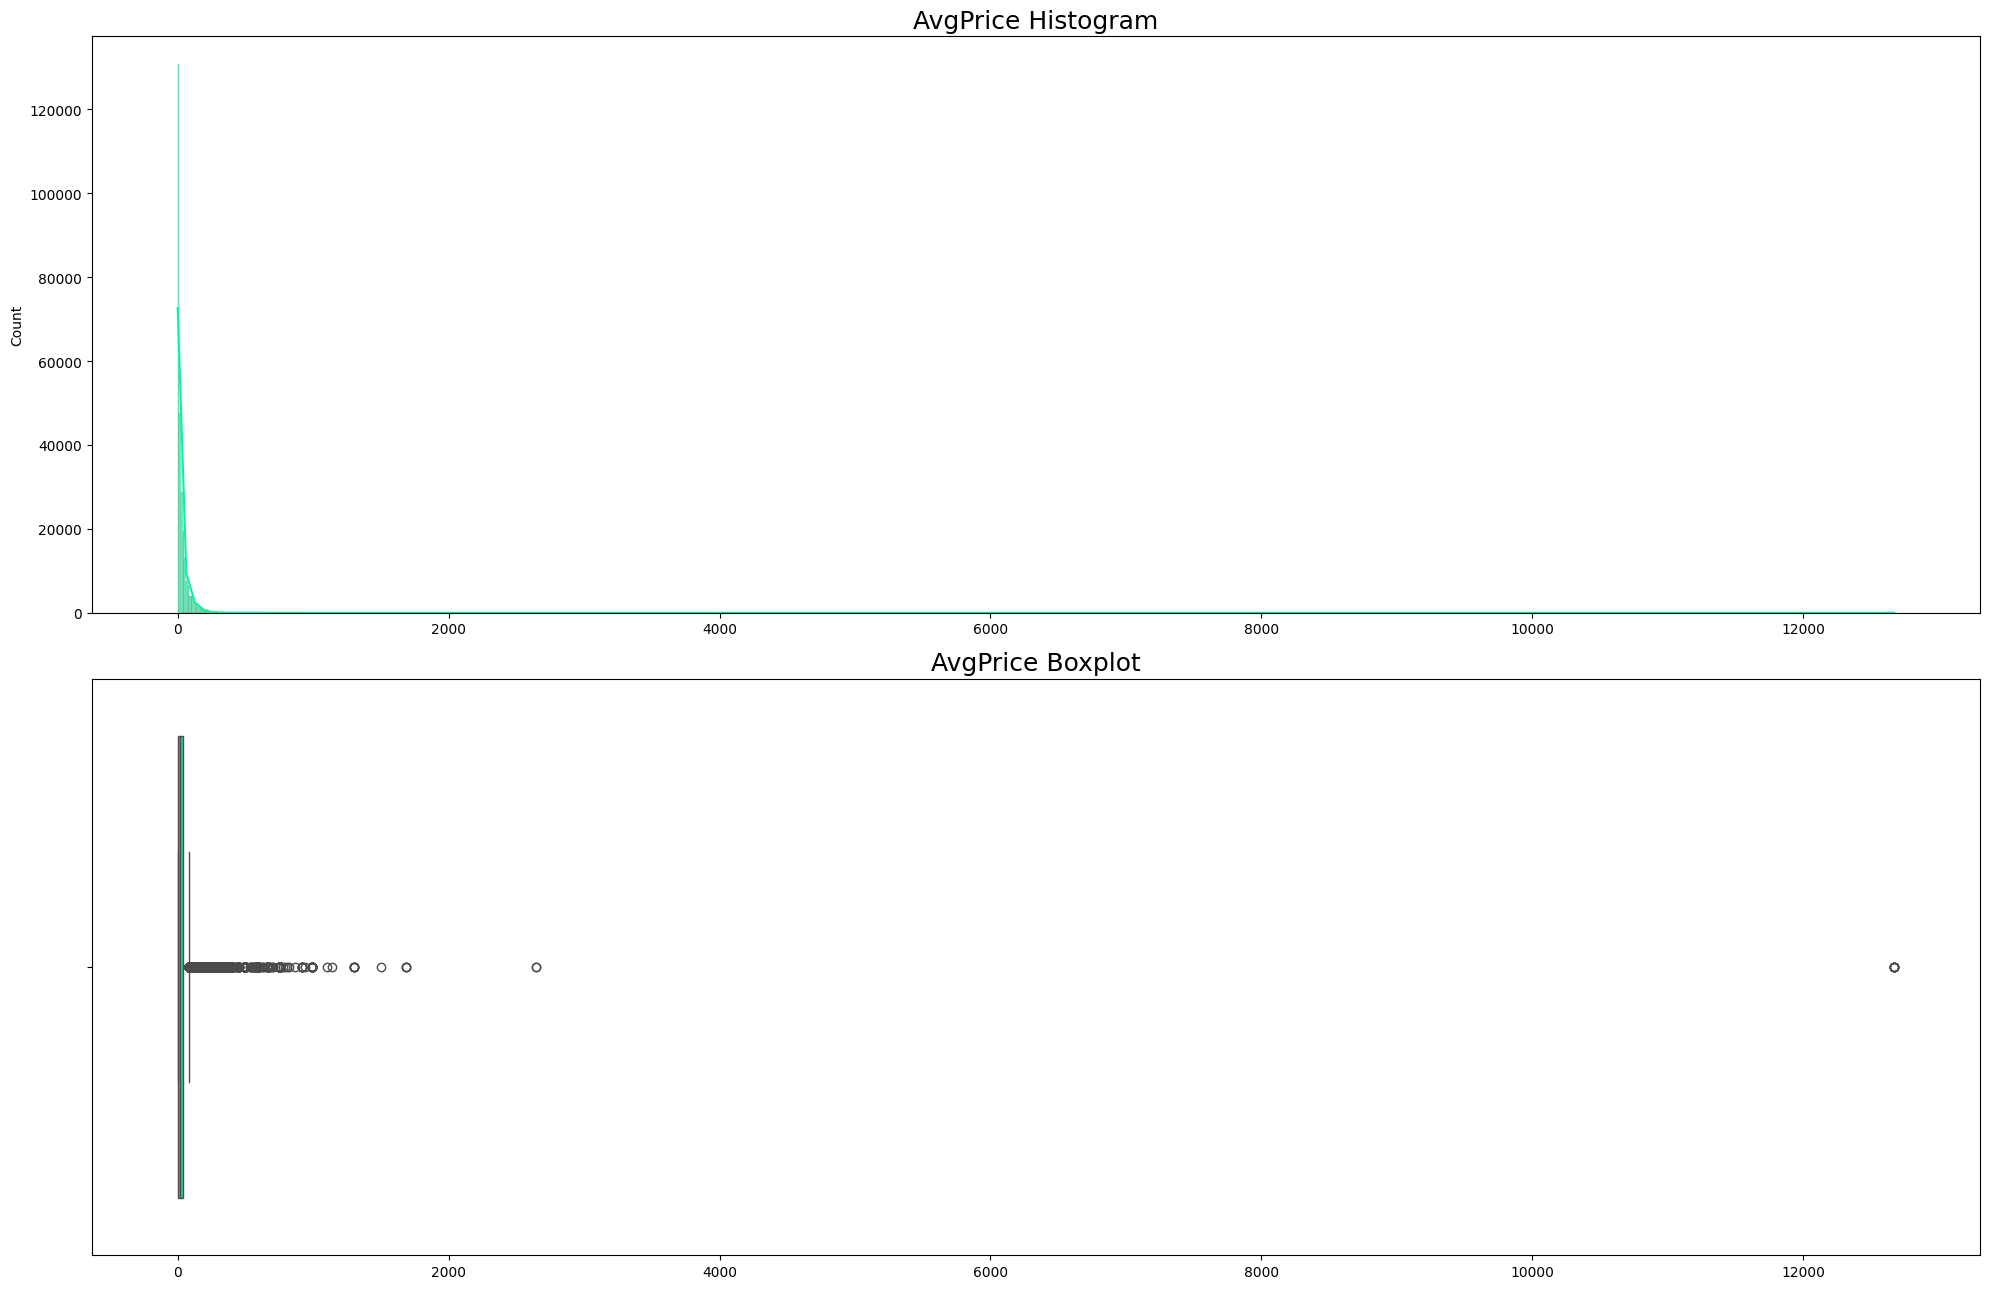

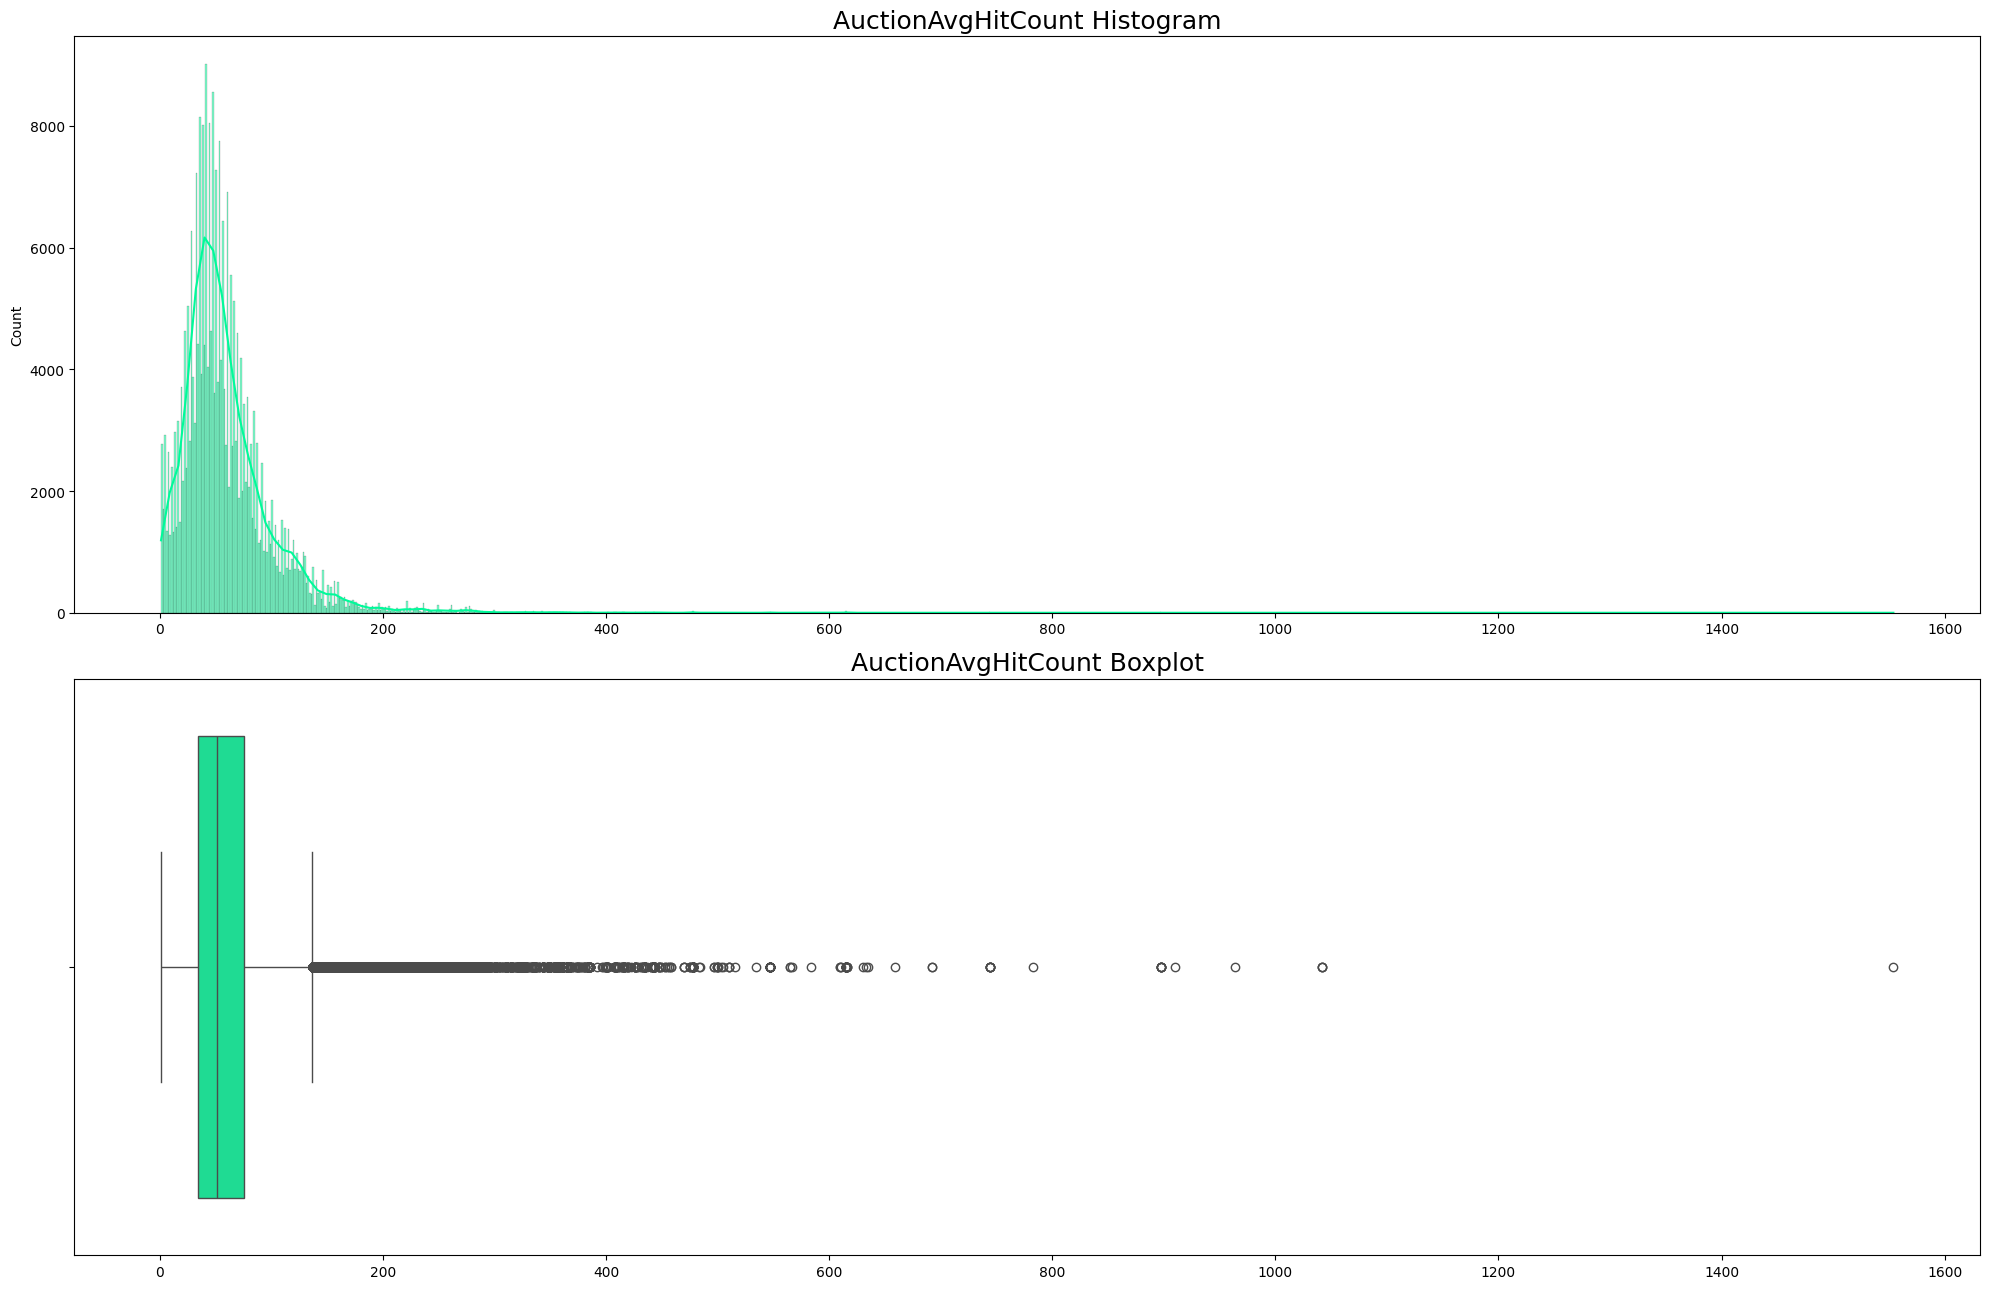

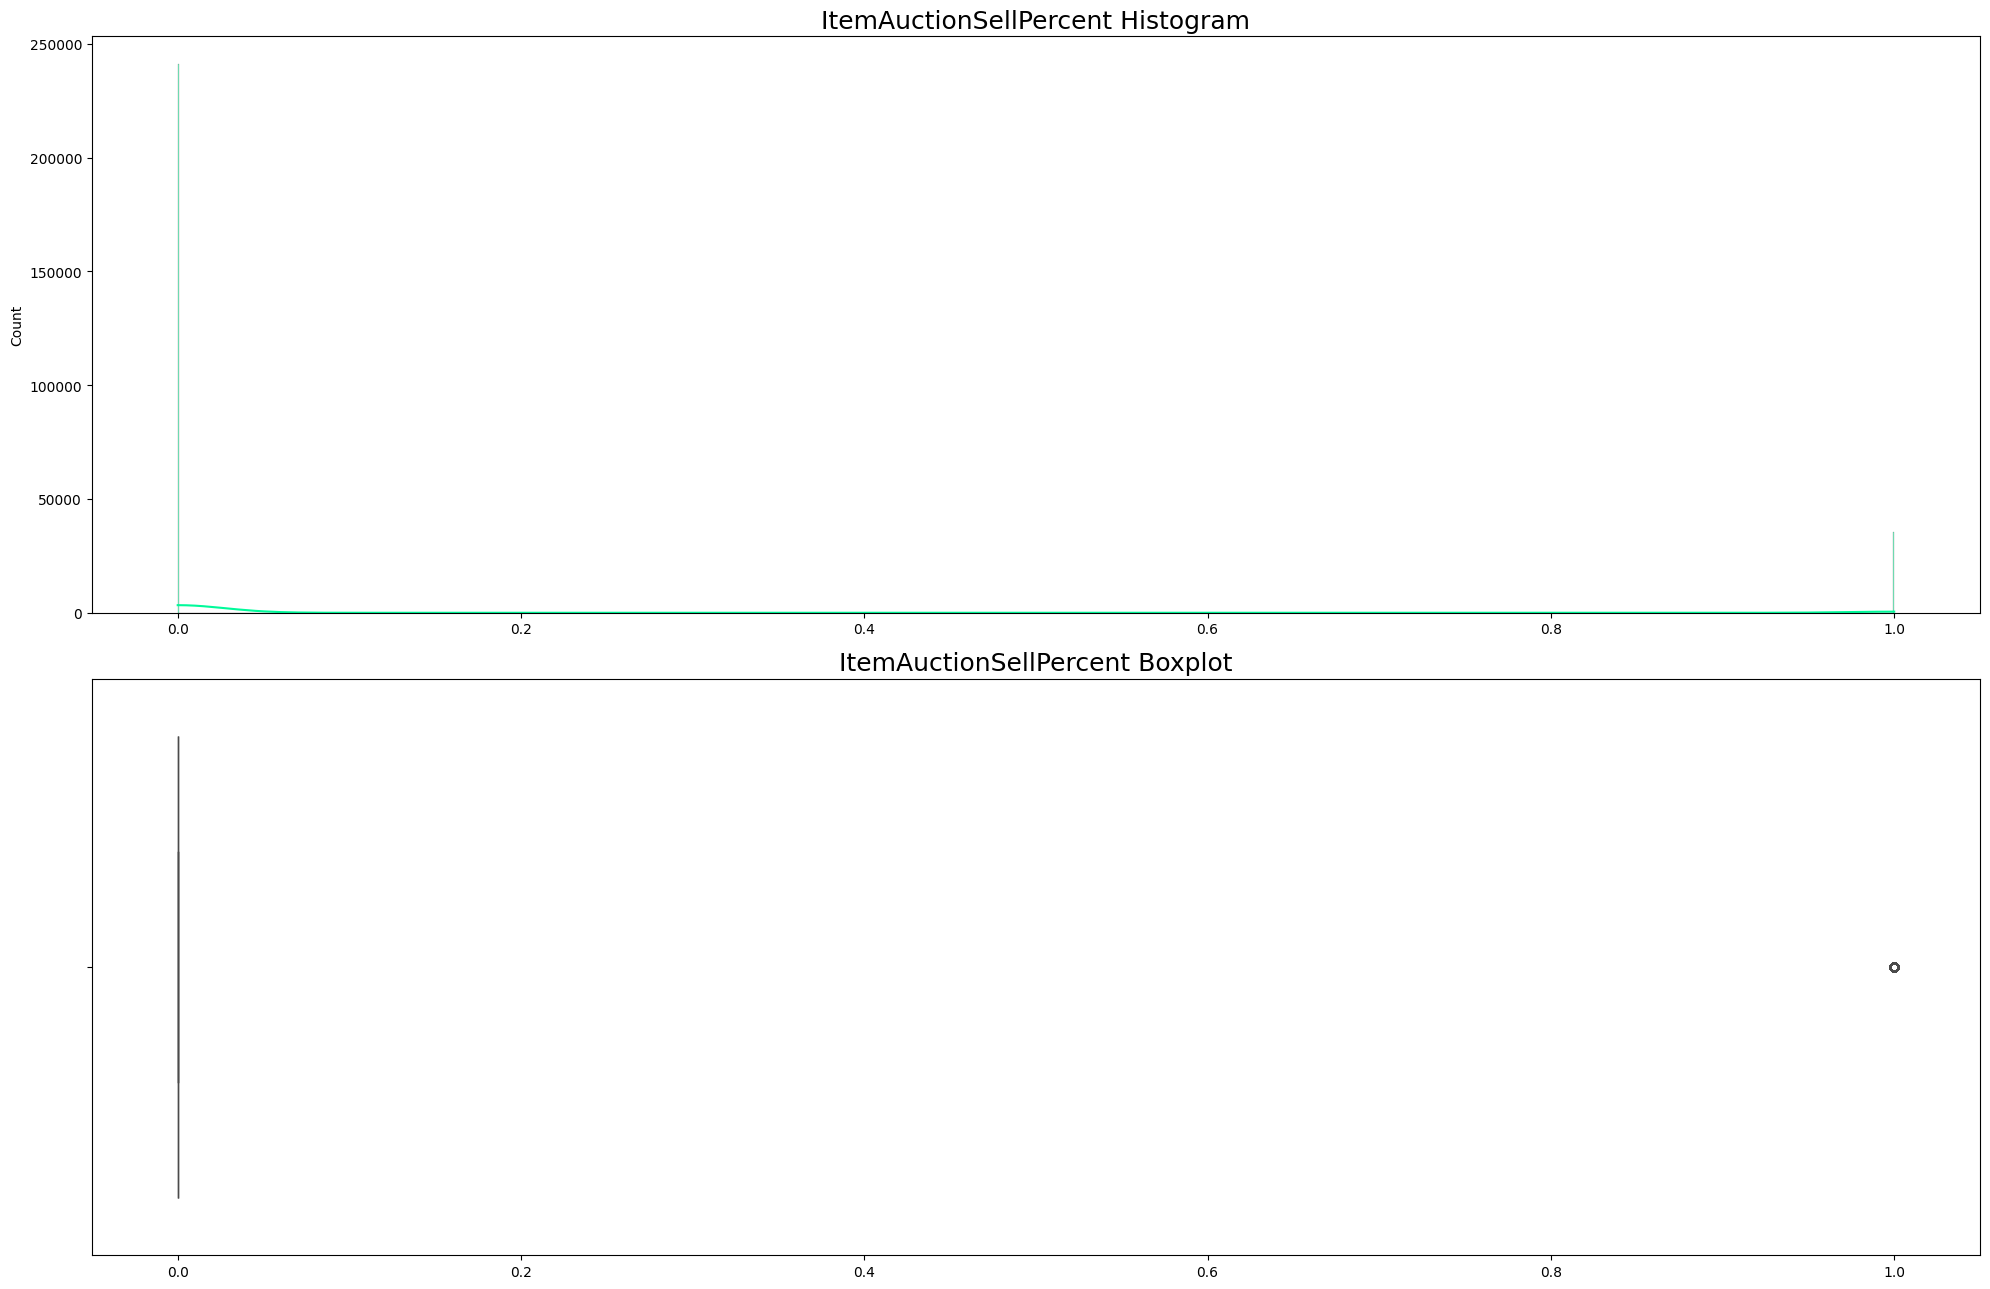

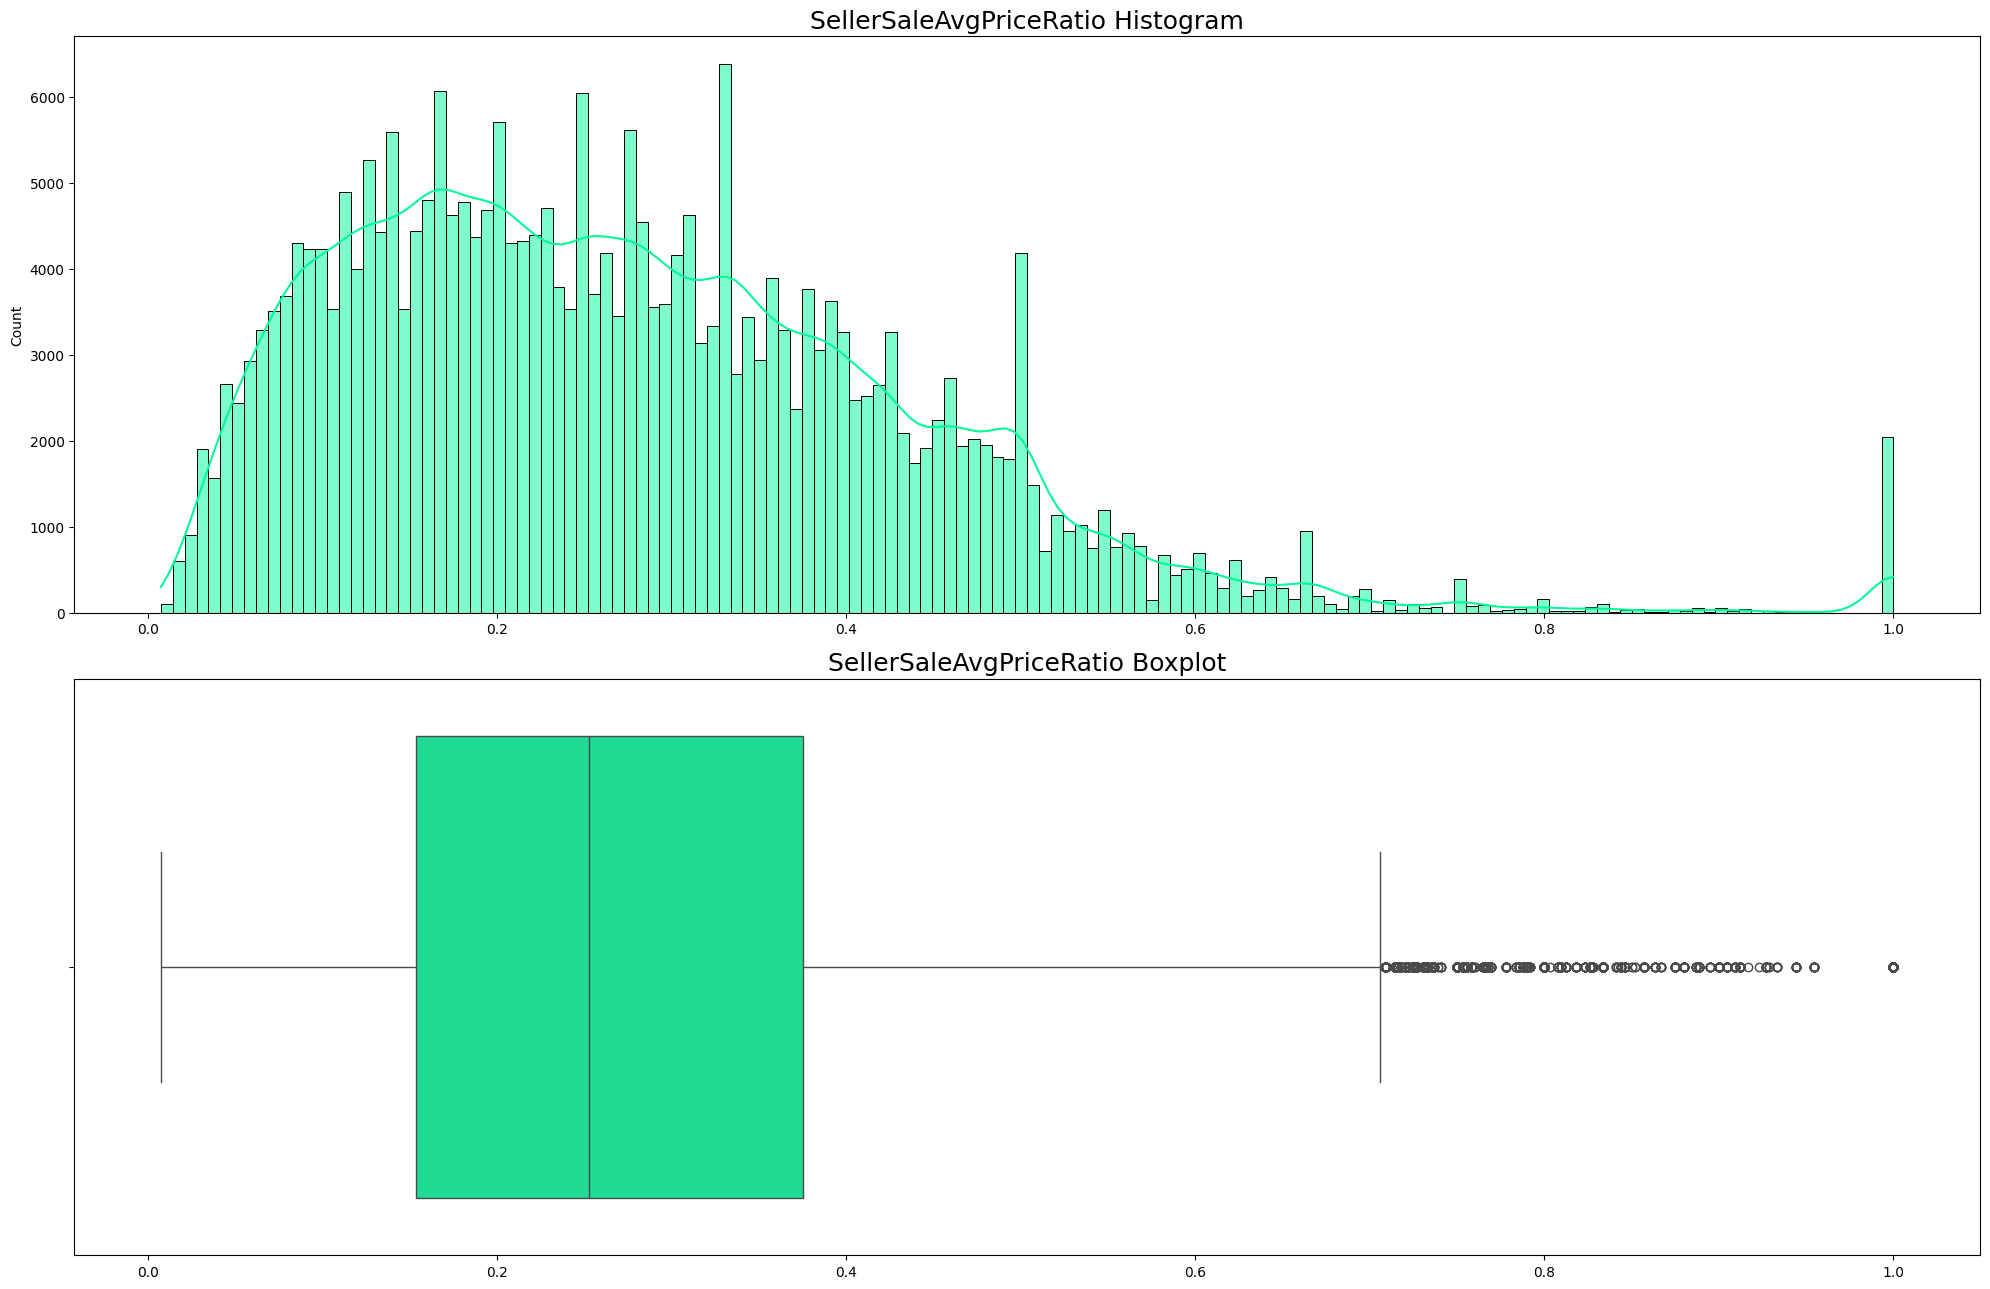

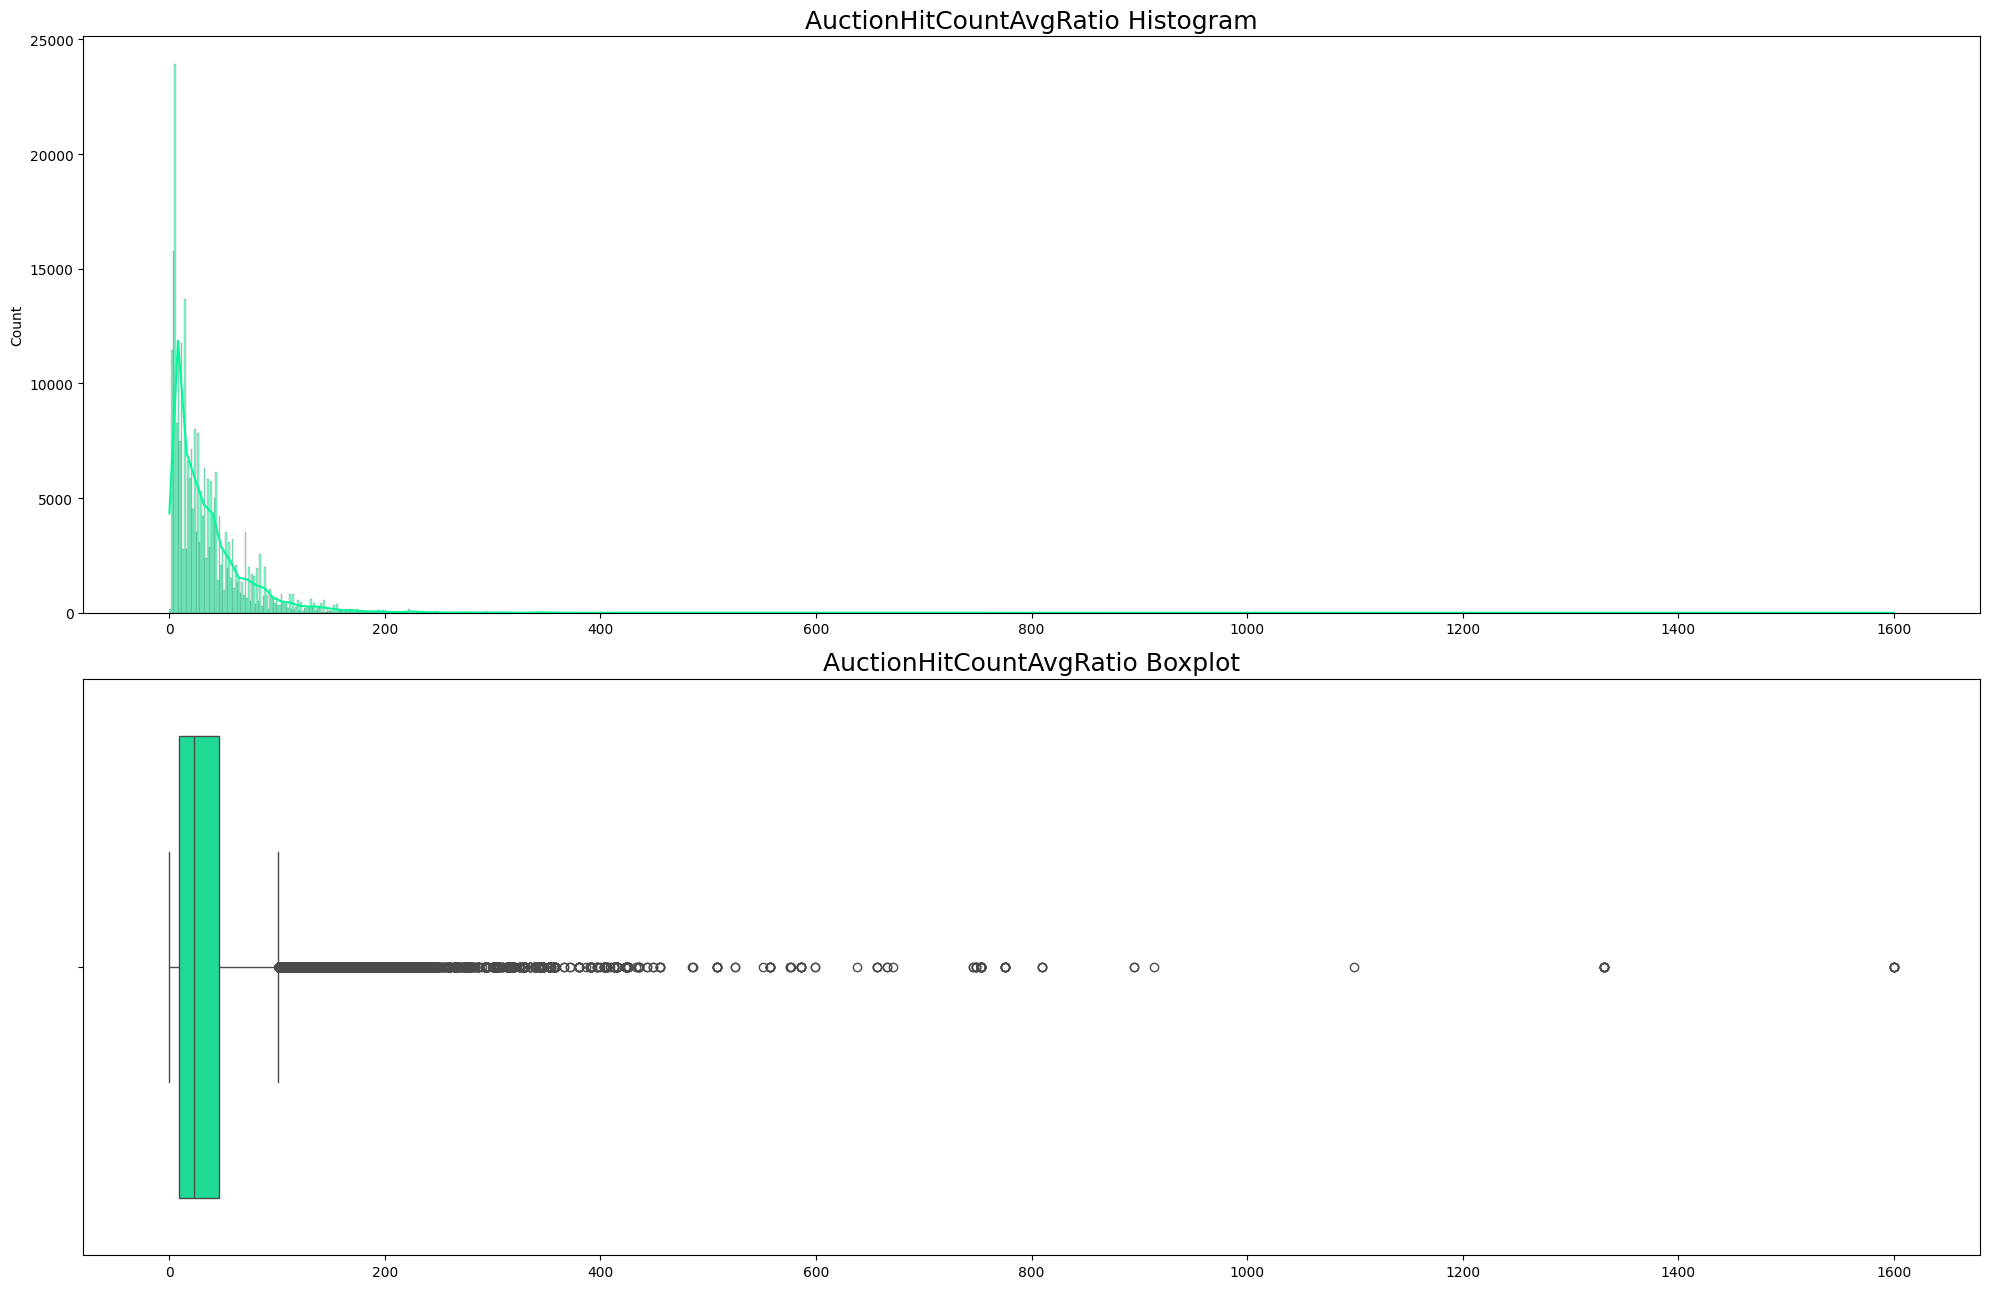

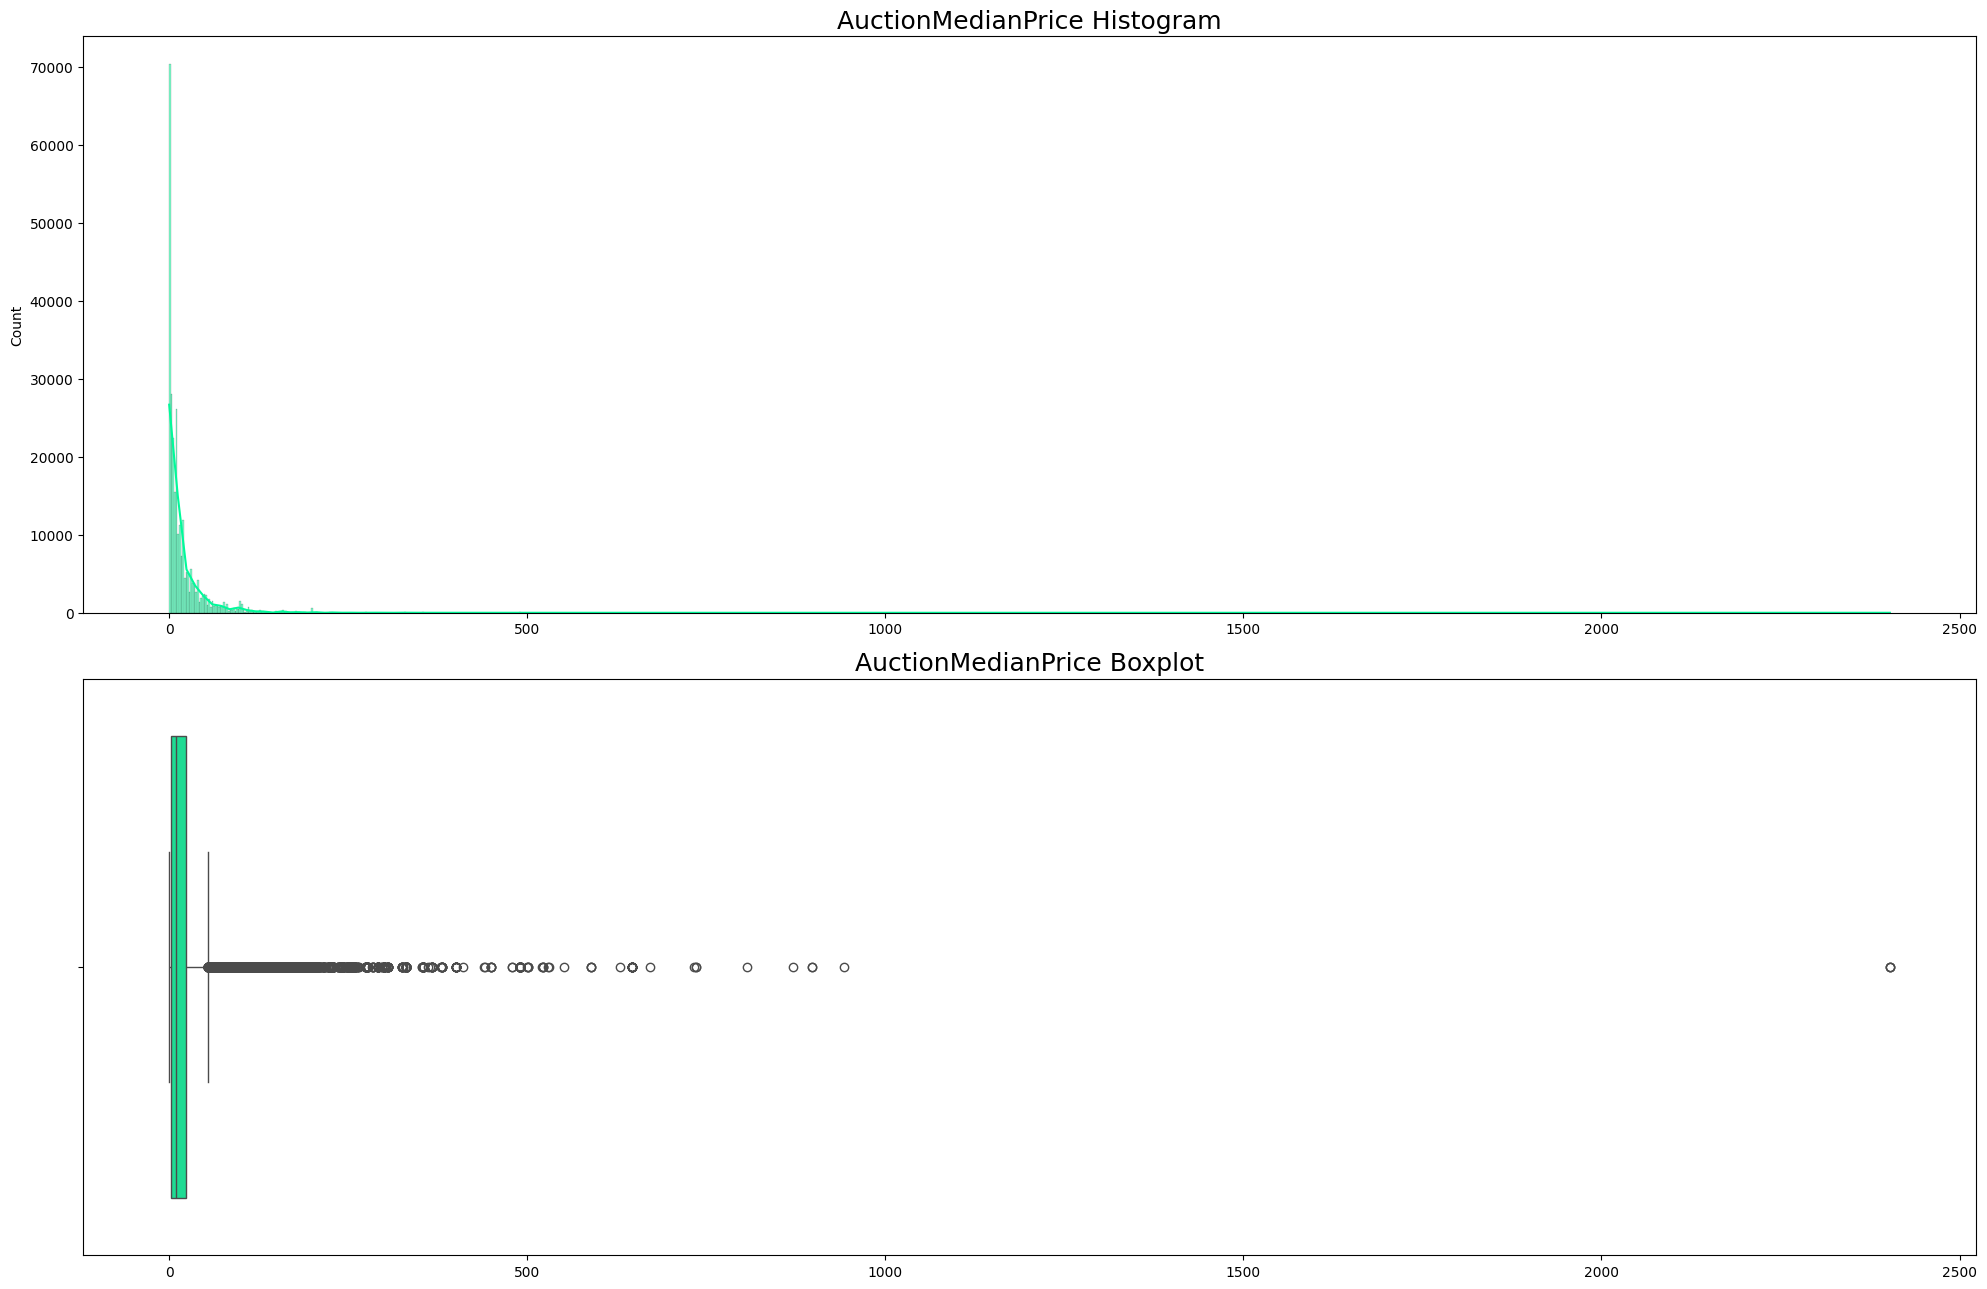

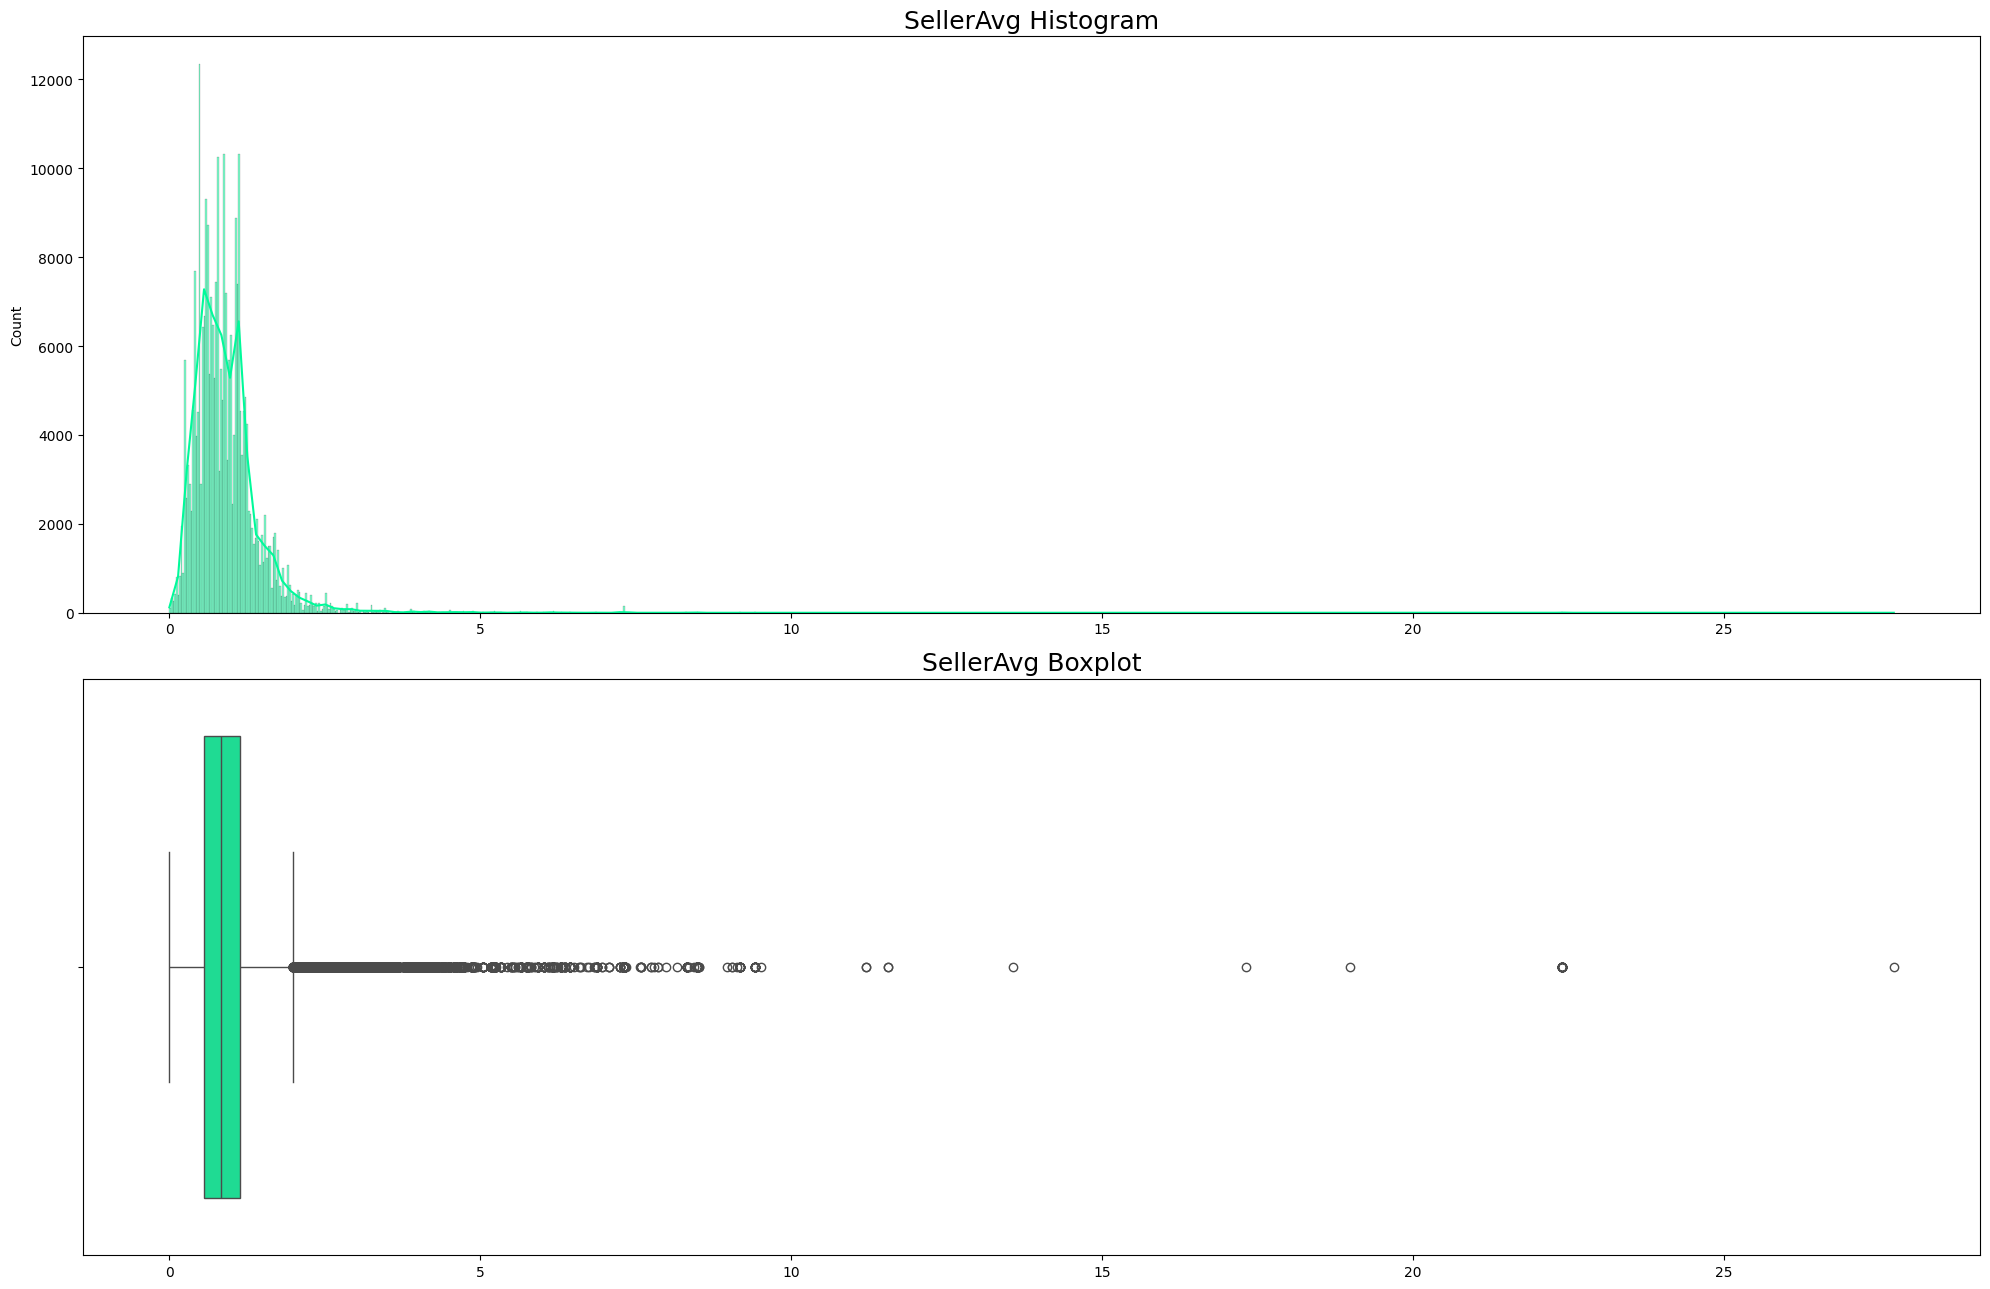

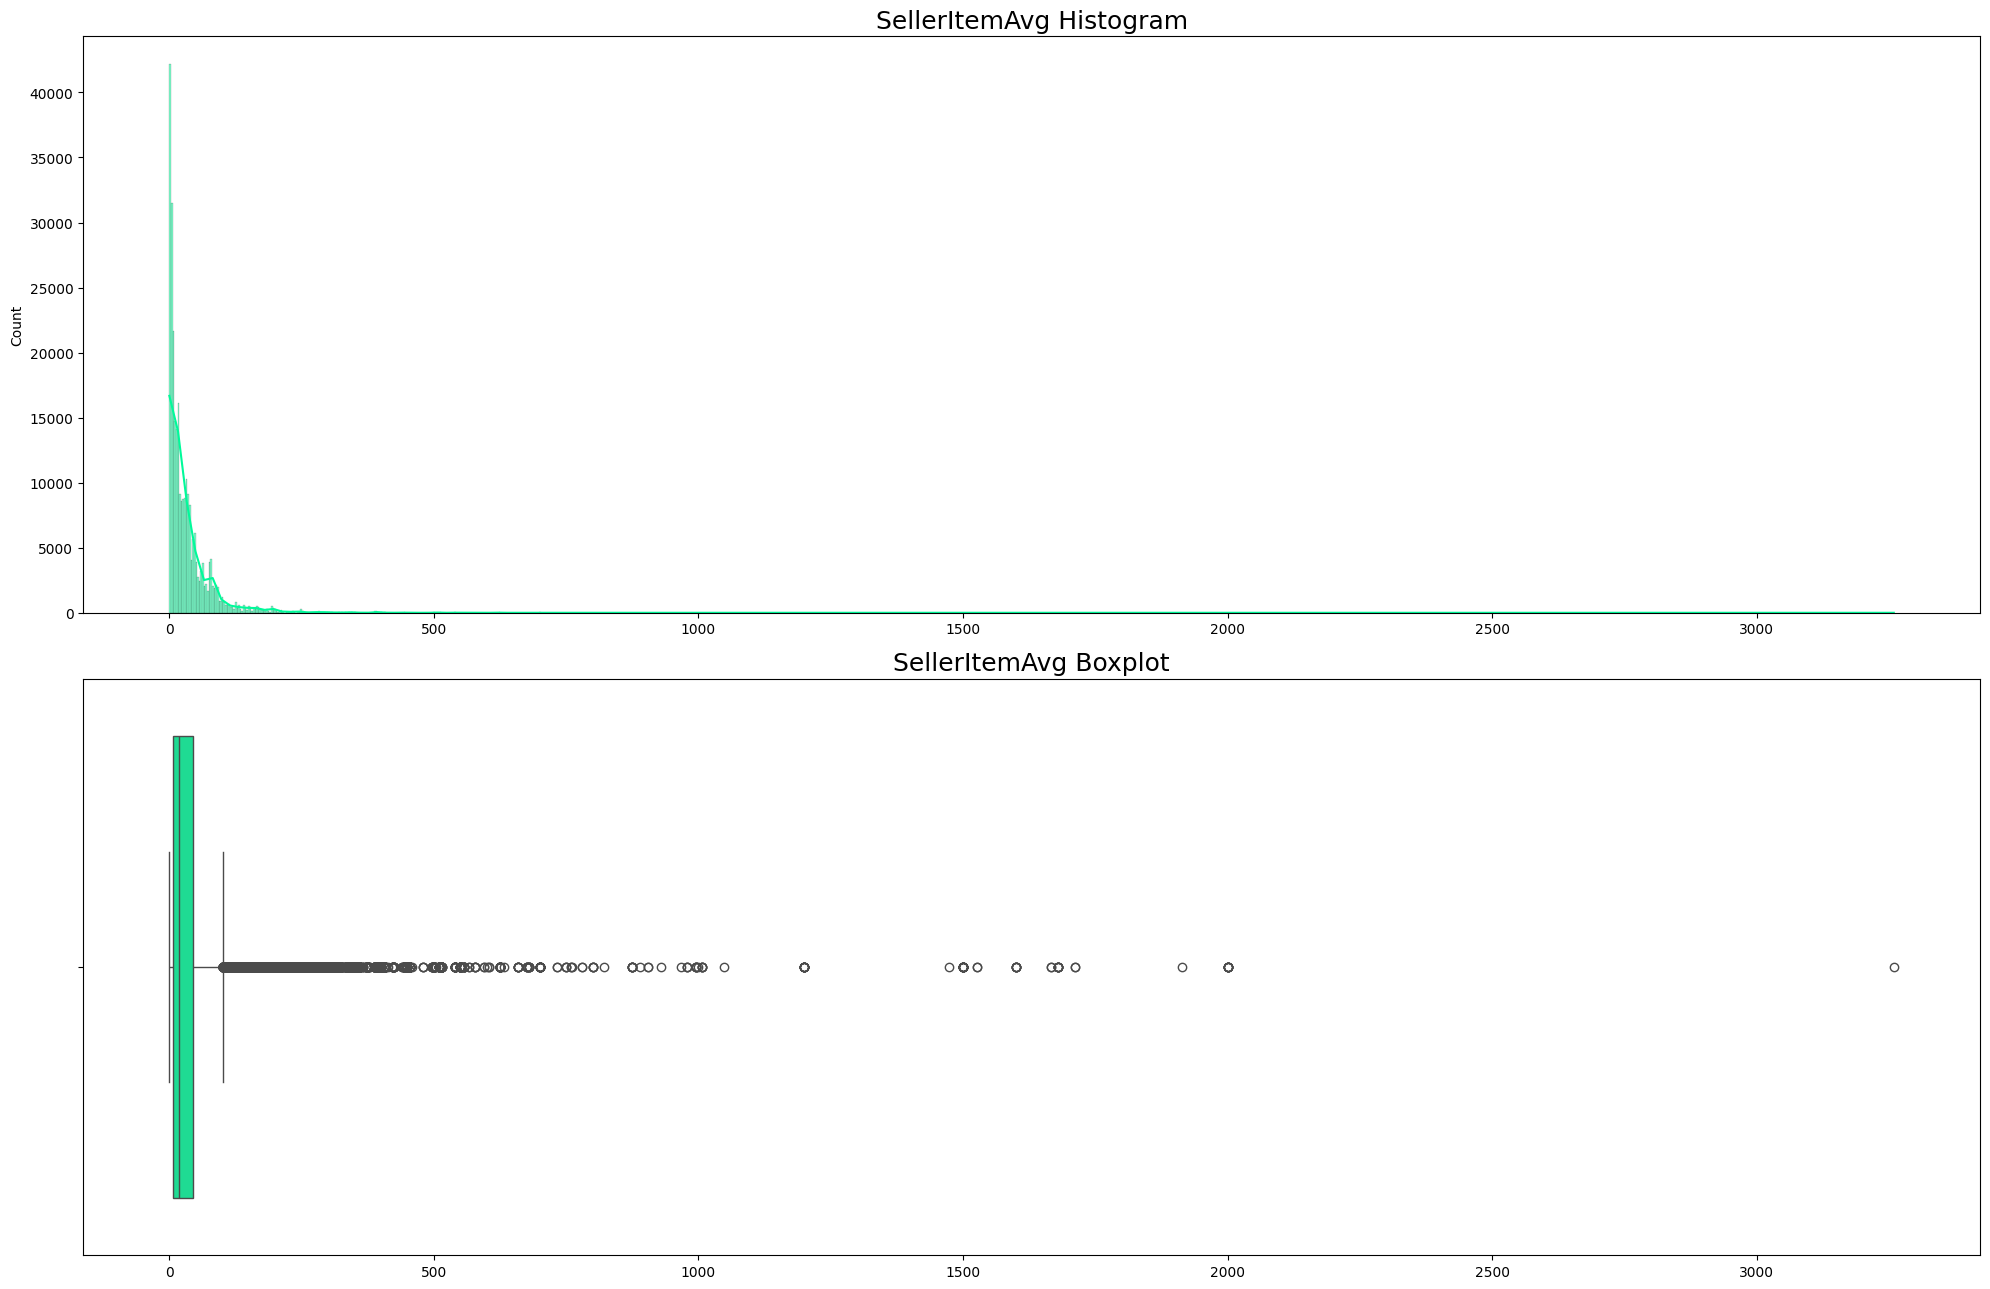

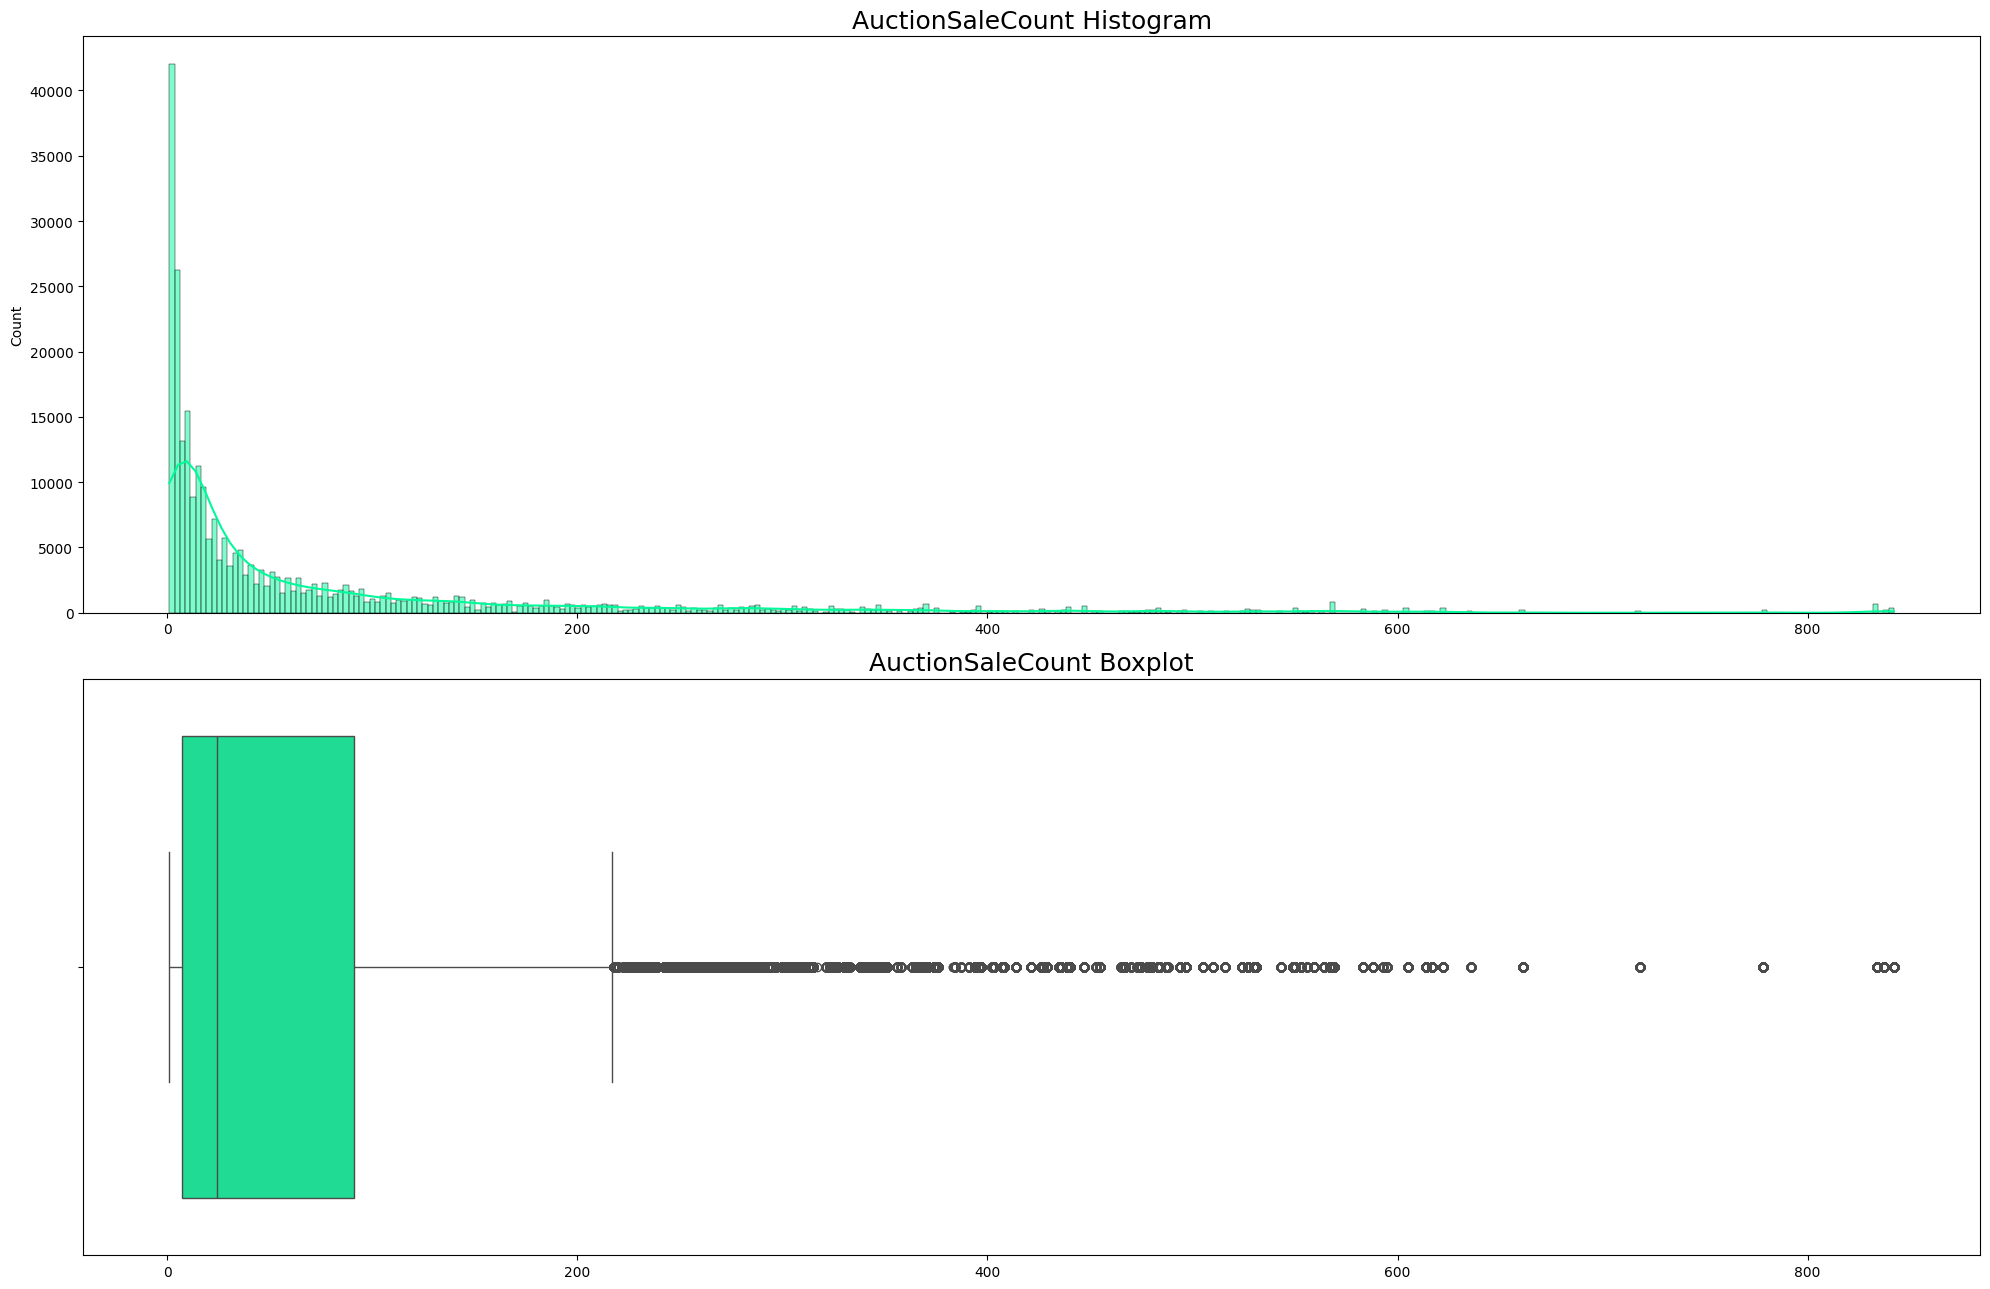

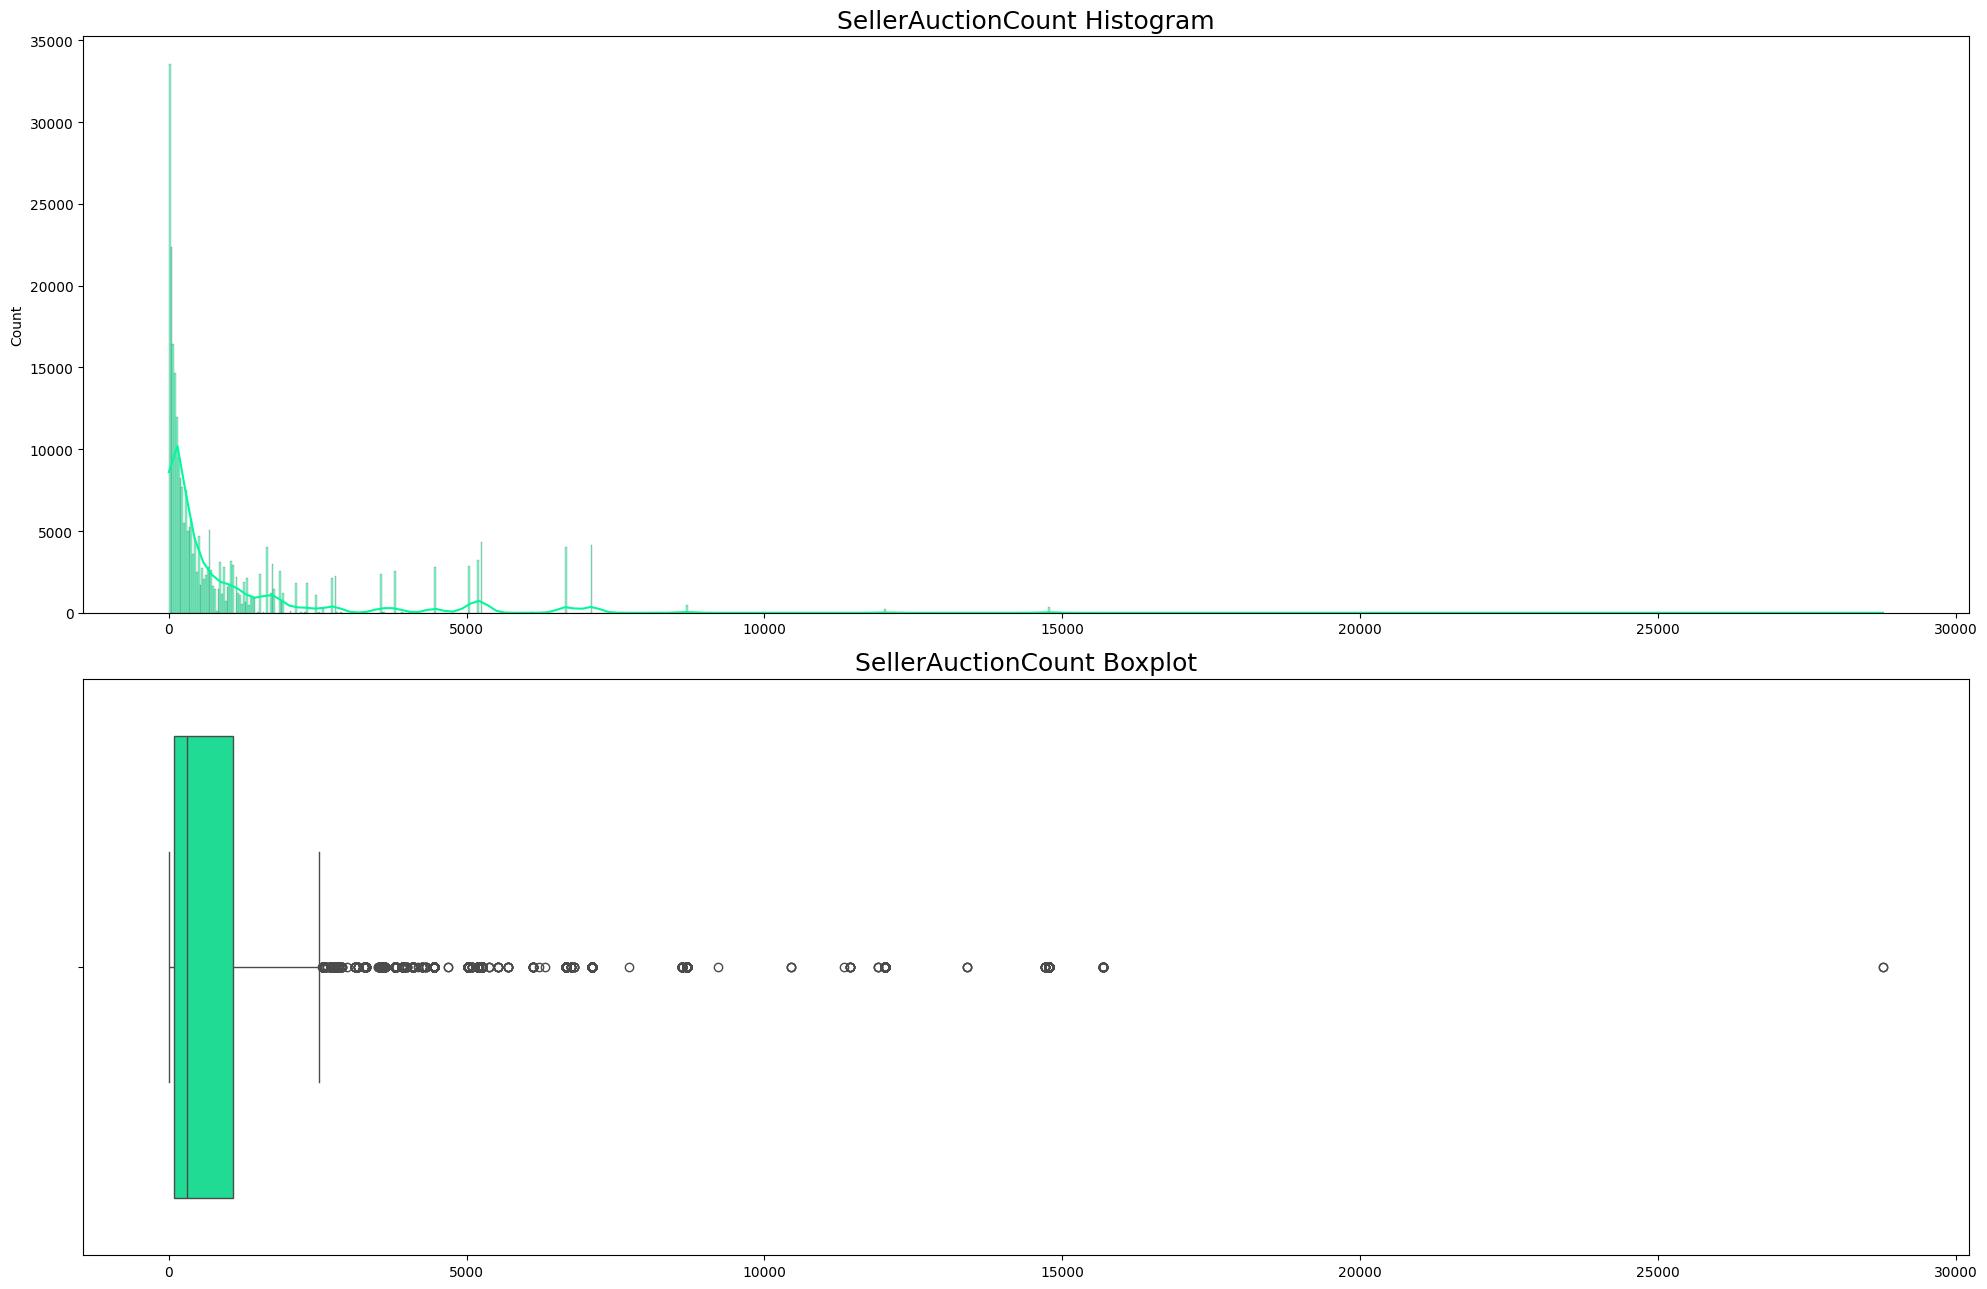

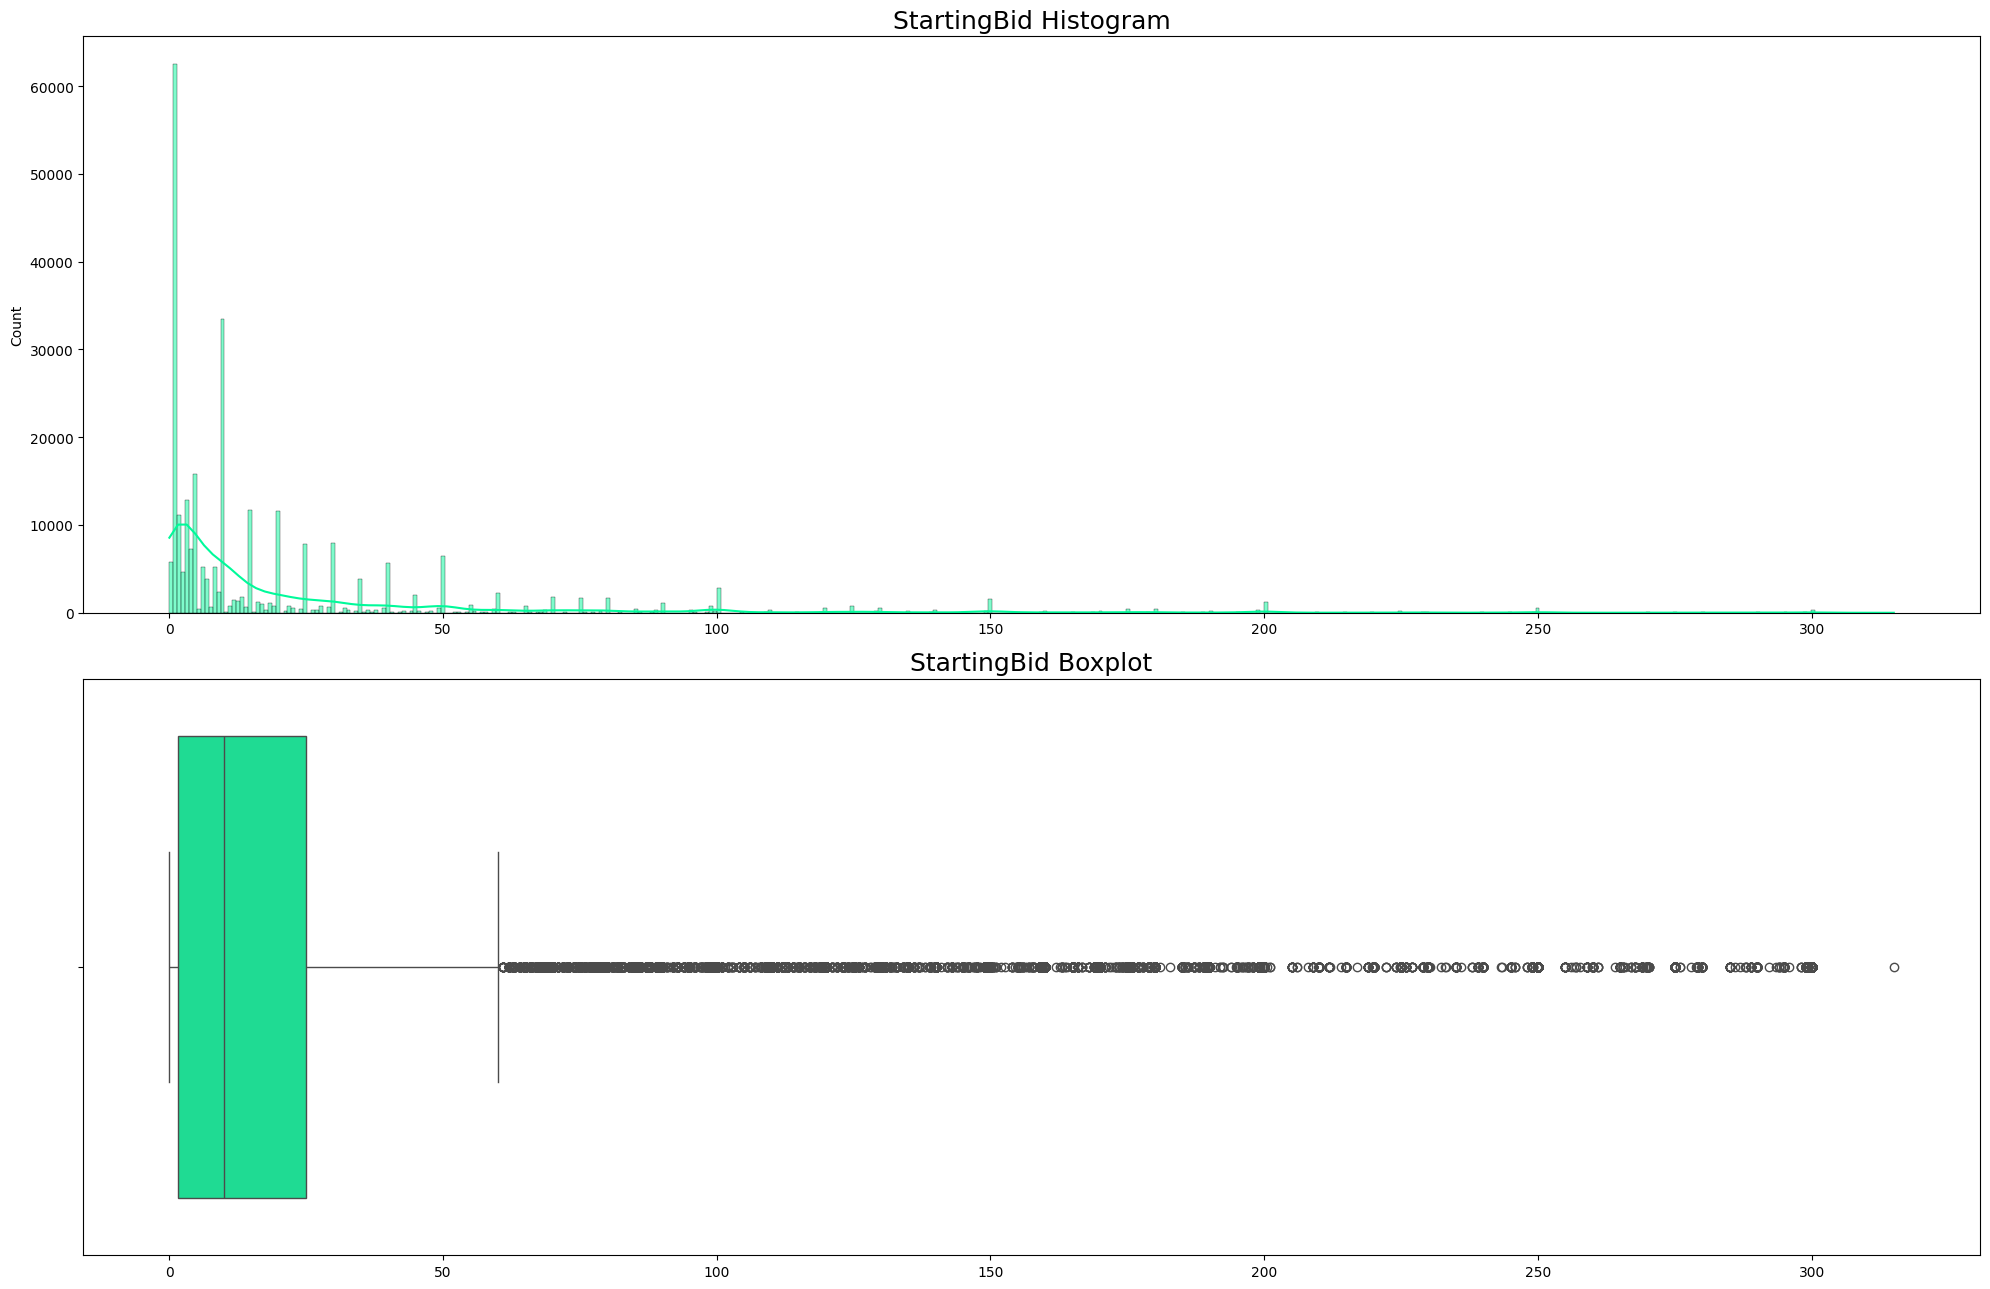

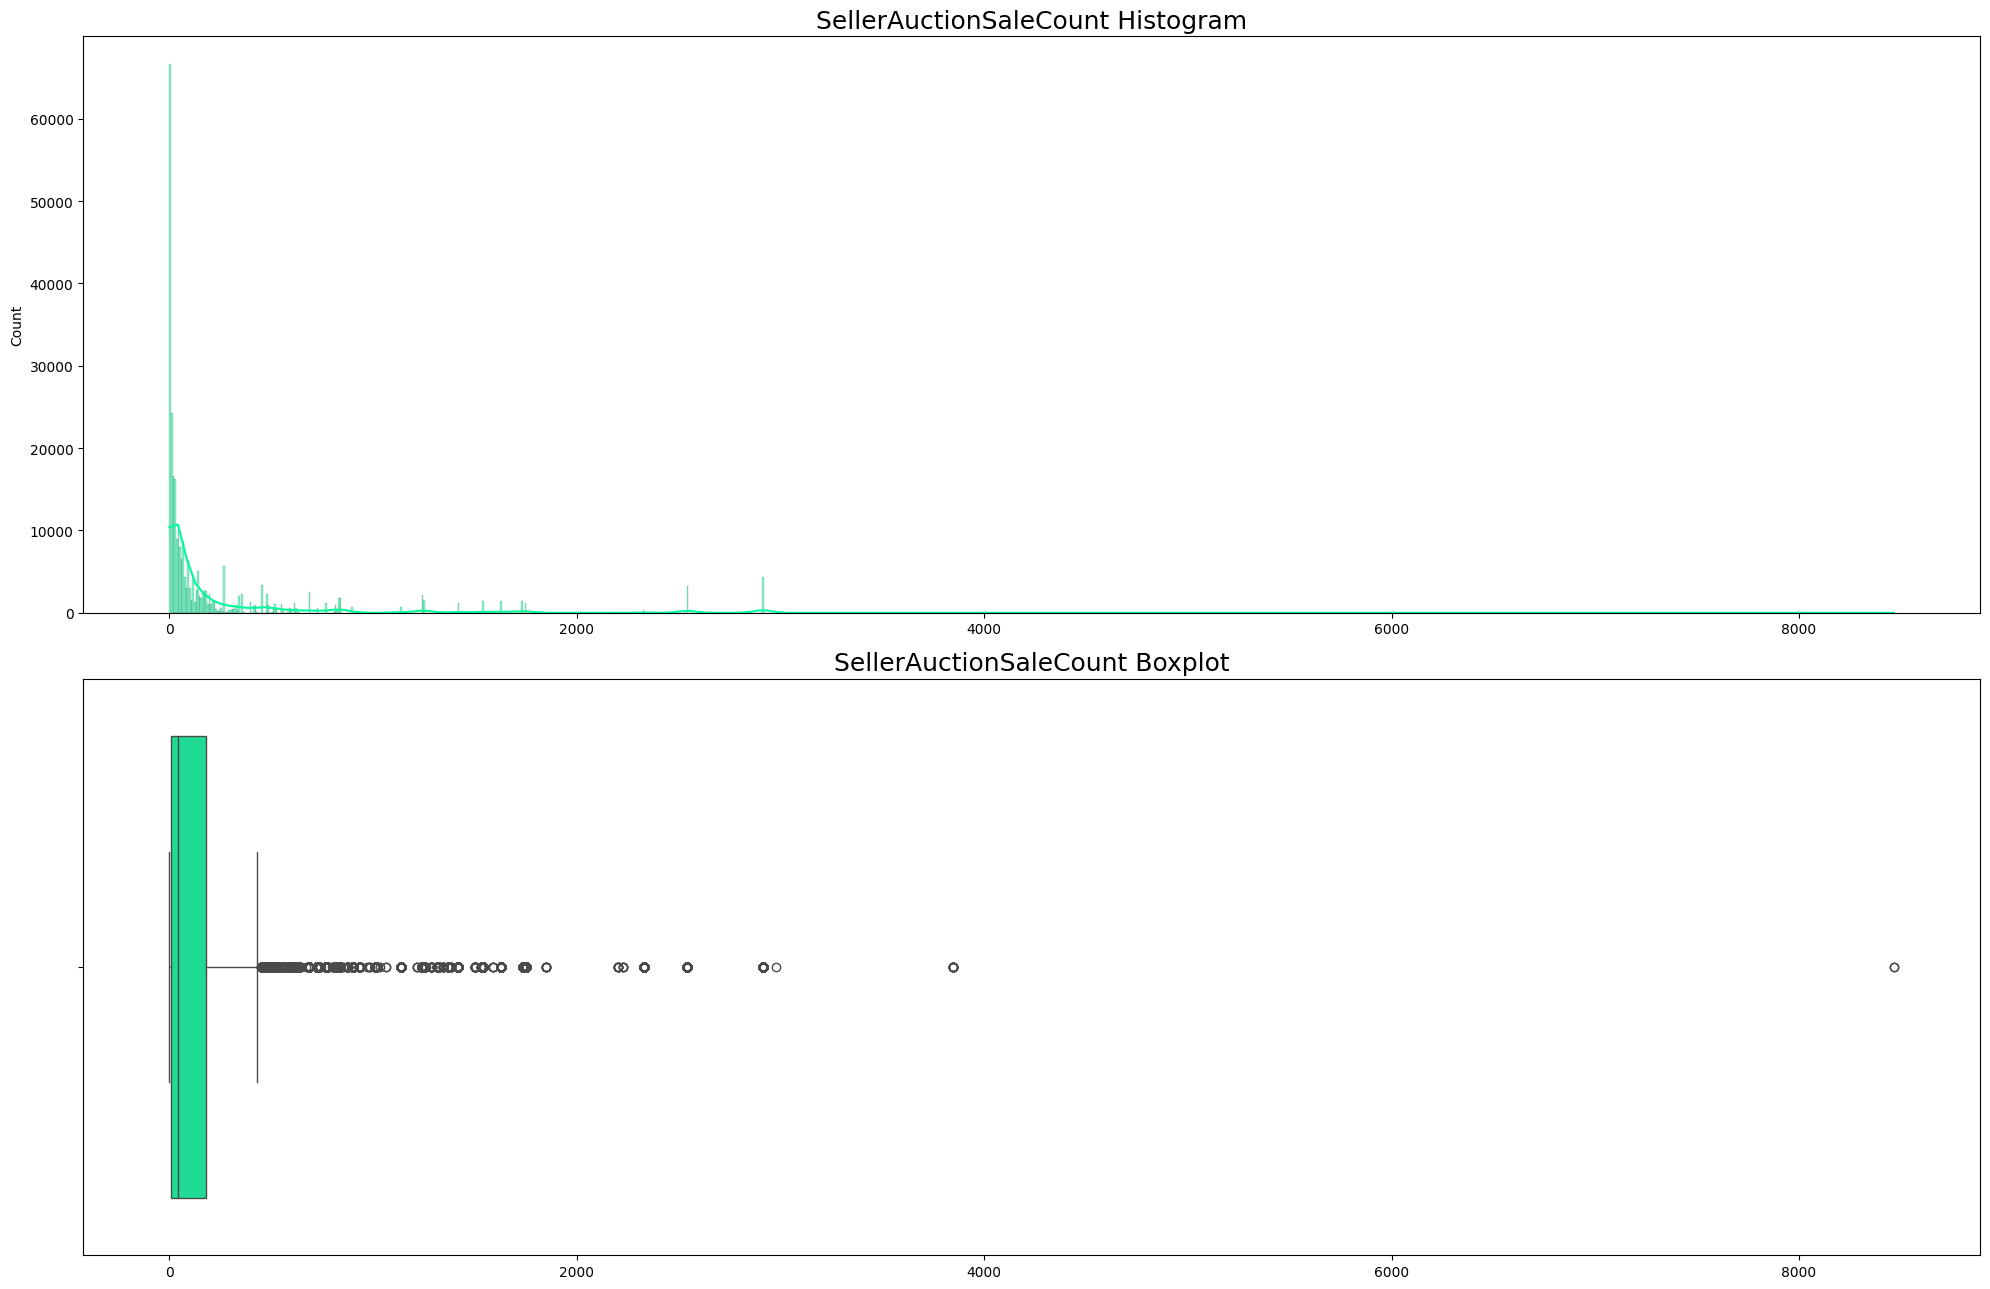

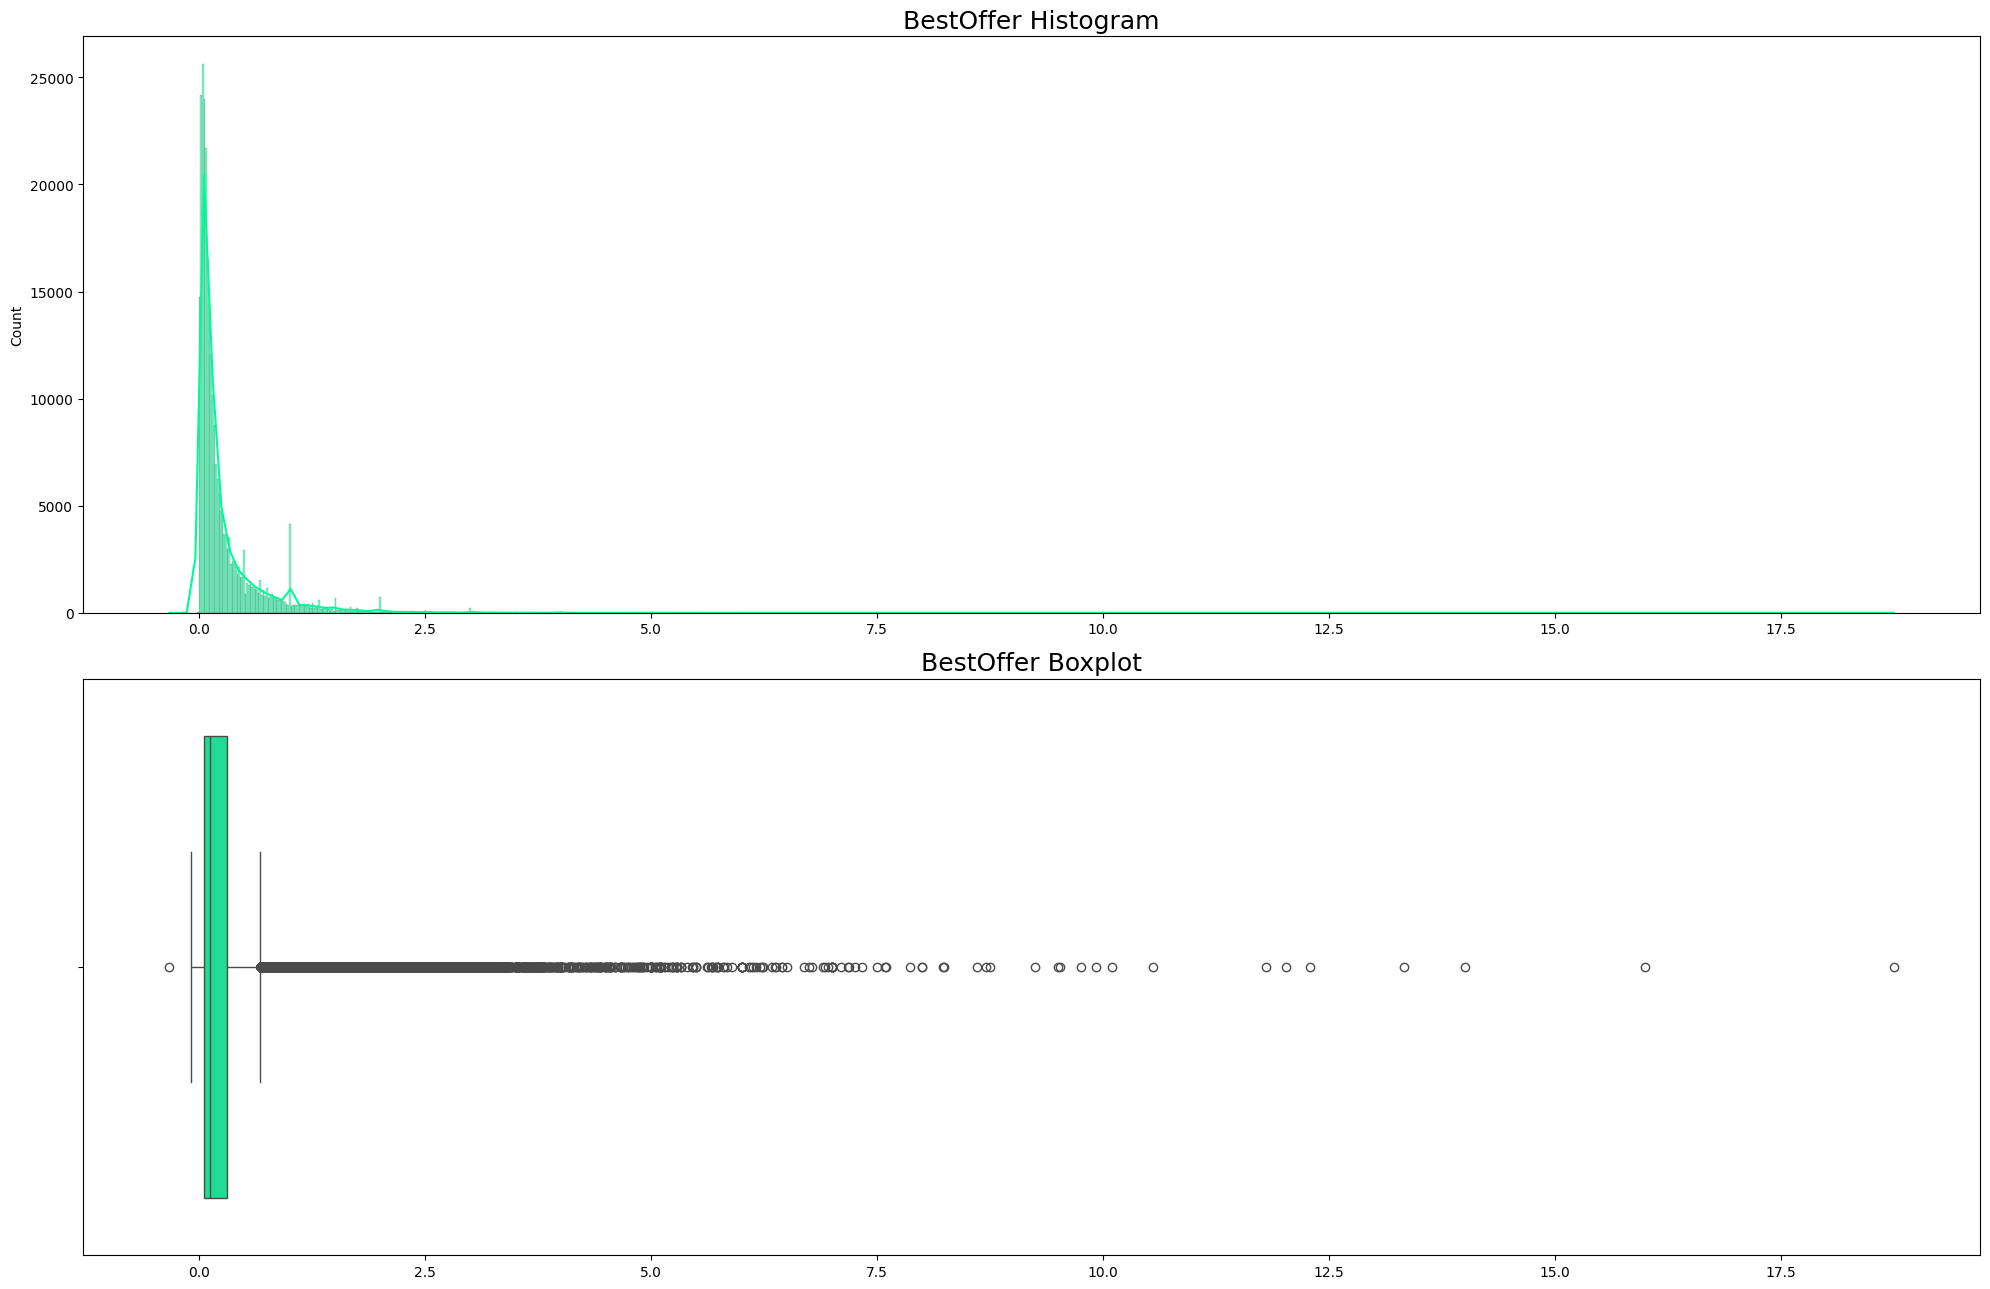

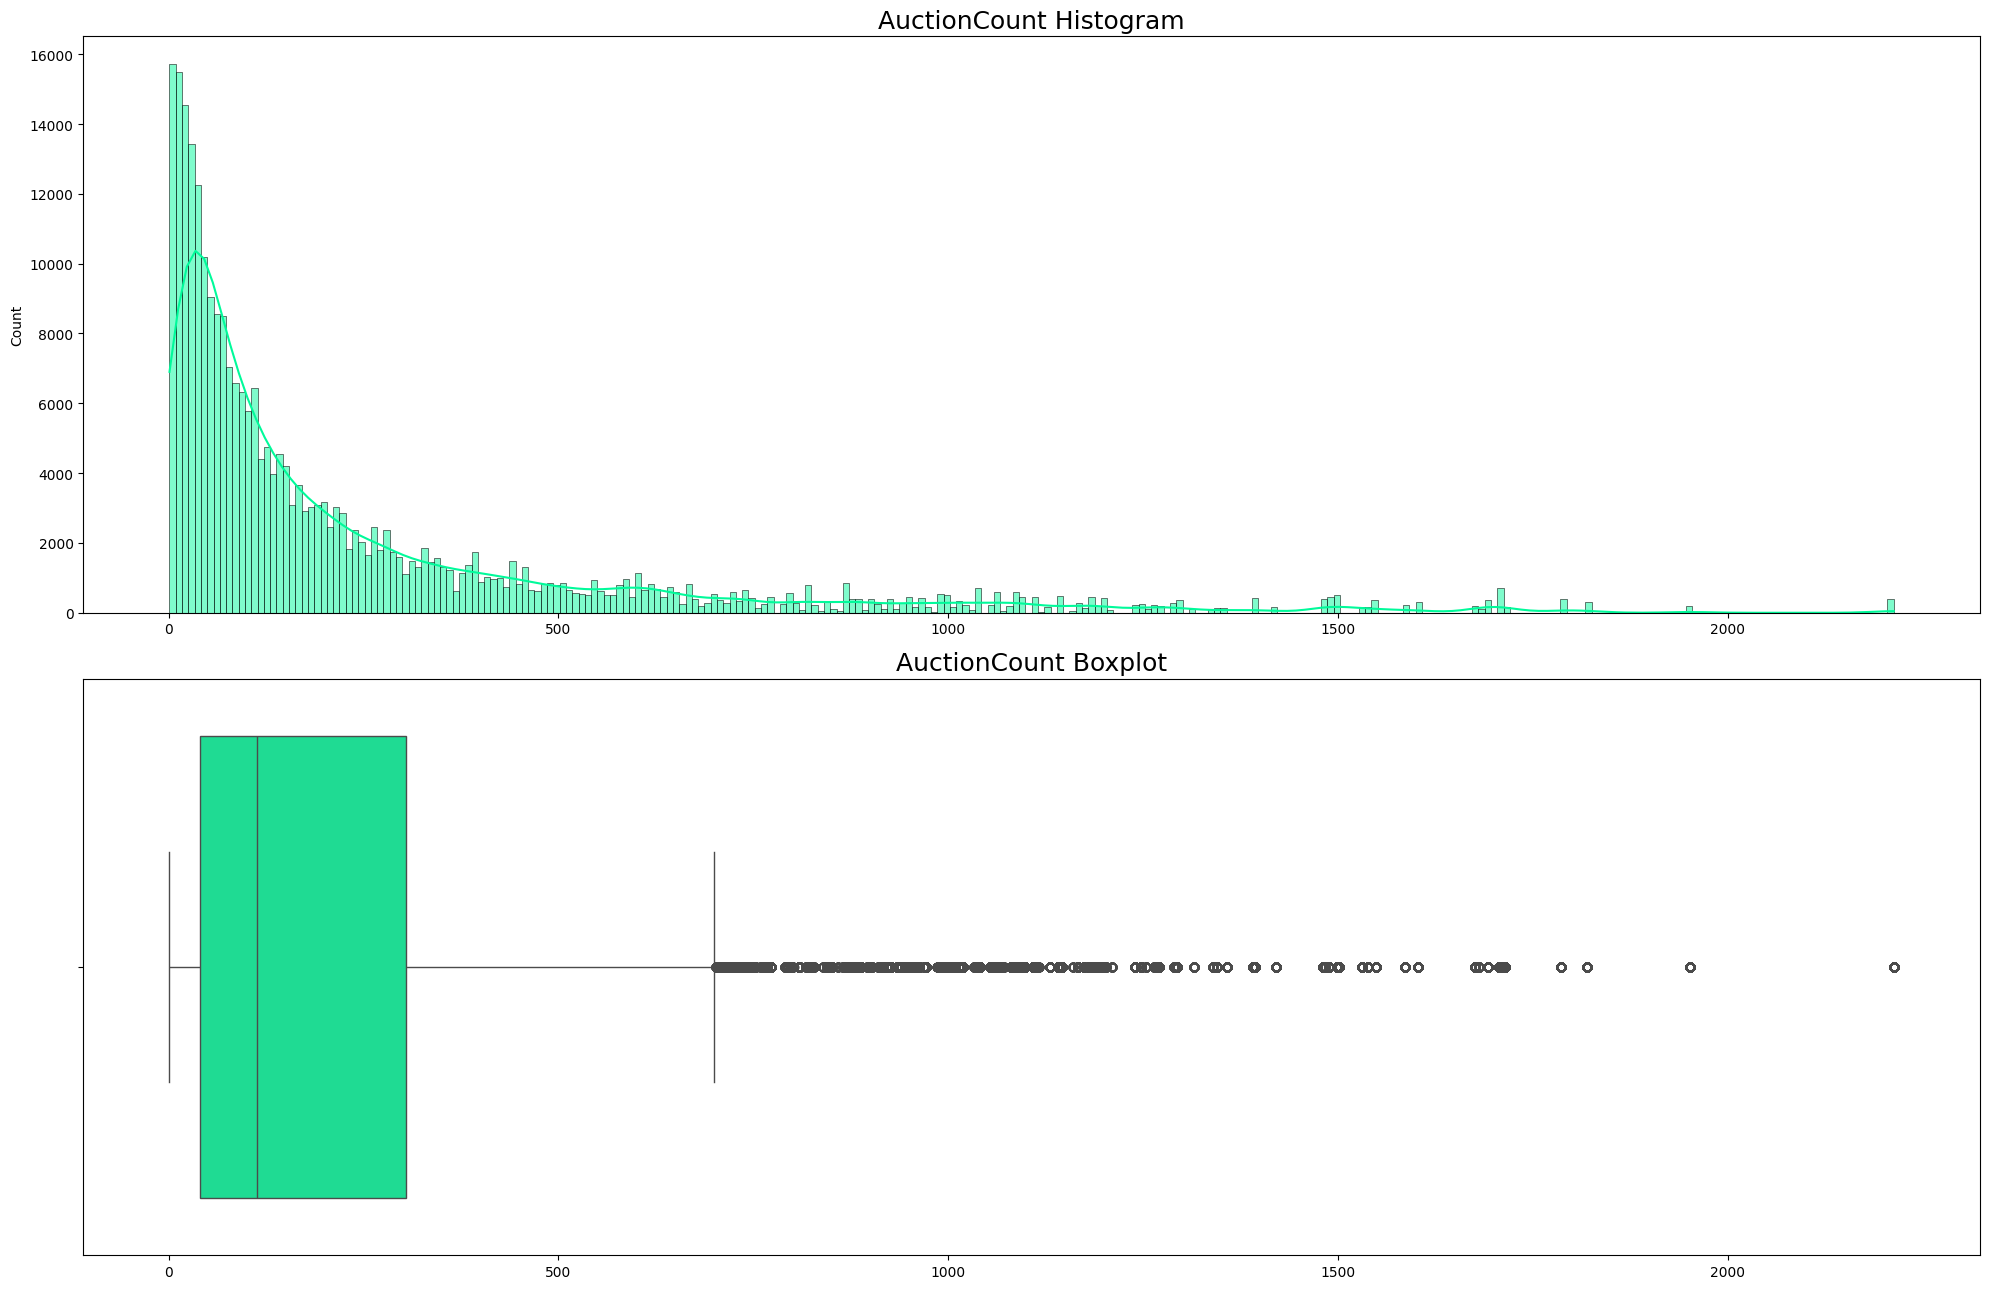

In [118]:
# loop over continuous numerical data 
for col in cont_data:
    print('\n')
    plot_hist_box(col)

In [126]:
df_con['SellerAuctionSaleCount'].value_counts()

SellerAuctionSaleCount
3      10229
2       9828
1       8150
4       7838
5       6768
       ...  
618        1
734        1
682        1
382        1
386        1
Name: count, Length: 400, dtype: int64

In [124]:
df_con.columns

Index(['QuantitySold', 'Price', 'PricePercent', 'StartingBidPercent',
       'SellerClosePercent', 'Category', 'StartingBid', 'AvgPrice', 'EndDay',
       'HitCount', 'AuctionAvgHitCount', 'ItemAuctionSellPercent',
       'SellerSaleAvgPriceRatio', 'SellerAvg', 'SellerItemAvg',
       'AuctionHitCountAvgRatio', 'BestOffer', 'ReturnsAccepted', 'IsHOF',
       'ItemListedCount', 'AuctionCount', 'AuctionSaleCount',
       'SellerAuctionCount', 'SellerAuctionSaleCount', 'AuctionMedianPrice'],
      dtype='object')

# Feature Encoding

The EndDay column is an ordinal variables. I need to encode this column since the classification models require numerical inputs.<br>
I will encode this column using One Hot Encoding Technique since the order of days do not matters.<br>
Feature Encoding will be implemented after splitting the data in order to prevent data leakage and promote better model generalization.

The classification algorithms that i will try to use are: GaussianNB, ComplementNB, BernoulliNB, CategoricalNB, Logistic Regression <br> (το χρησιμοποιεί και αυτός που έχει γράψει το άρθρο), SVM (ΔΕΣ για radial κτλπ).

For both Logistic Regression and SVM the steps before implement the algorithms. <br>
- Standard Scaling the features to have a mean of zero and a standard deviation of one.
- I will Stratified K-Fold Cross Validation since the target variable is imbalanced distributed (QuantitySold) variable (Smote).

- SVM

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

X = df_con.drop('QuantitySold', axis=1)
y = df_con['QuantitySold']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# create instance for SVM
clf = svm.SVC(probability=True)

# Columns to apply standard scaling (only on the continuous data)
cont_scaling = ColumnTransformer(
    transformers=[
        ('cont',StandardScaler(),cont_data),
        ('cat',OneHotEncoder(handle_unknown='ignore'),['EndDay'])
    ],remainder='passthrough'
    )

# scaling the independent variables

model = Pipeline([
    ('cont_scaling',cont_scaling),
    ('clf', clf)
])

# Hyperparameters
params = {
    'clf__kernel': ['linear', 'rbf', 'poly'], 
    'clf__C': [0.1, 1, 10],
}

# GridSearchCV and cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch to find best svm kernel
gsc = RandomizedSearchCV (model, params, cv=cv,n_iter=10, scoring='accuracy', n_jobs=-1)

gsc.fit(X_train, y_train)

d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Εργασια\Ebay_sales\venv\Lib\site-packages\sklearn\model_selection\_search.py:324: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV

preprocessor = ColumnTransformer(
    transformers=[
        ('cont', StandardScaler(), cont_data),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['EndDay'])
    ],
    remainder='passthrough'
)

clf = SVC(
    probability=True,
    class_weight='balanced',
    random_state=42
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', clf)
])

params = {
    'clf__kernel': ['linear', 'rbf'],
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale', 'auto']
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

gsc = RandomizedSearchCV(
    model,
    params,
    cv=cv,
    n_iter=10,
    scoring='roc_auc',  # better than accuracy for imbalance
    n_jobs=-1
)
gsc.fit(X_train, y_train)


KeyboardInterrupt: 

In [135]:
# Results of training the SVM
print("Best Parameters:", gsc.best_params_)
print("Best CV Accuracy:", gsc.best_score_)
print('Best estimators: ',gsc.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

- Logistic Regression

Best Parameters: {'preprocessor__discretizer__n_bins': np.int64(3), 'preprocessor__discretizer__strategy': 'uniform'}
Best CV Accuracy: 0.7533254044798527

Classification Report for :ComplementNB()
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     37607
           1       0.59      0.72      0.65     17744

    accuracy                           0.75     55351
   macro avg       0.72      0.74      0.73     55351
weighted avg       0.77      0.75      0.76     55351



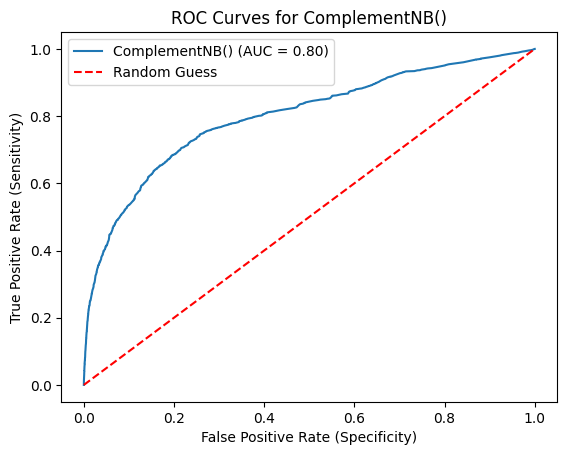

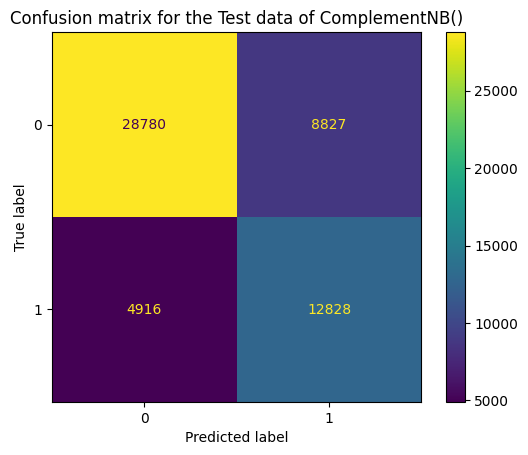

d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Εργασια\Ebay_sales\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


Best Parameters: {'preprocessor__discretizer__n_bins': np.int64(8), 'preprocessor__discretizer__strategy': 'quantile'}
Best CV Accuracy: 0.8462066425091281

Classification Report for :GaussianNB()
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     37607
           1       0.75      0.78      0.76     17744

    accuracy                           0.85     55351
   macro avg       0.82      0.83      0.83     55351
weighted avg       0.85      0.85      0.85     55351



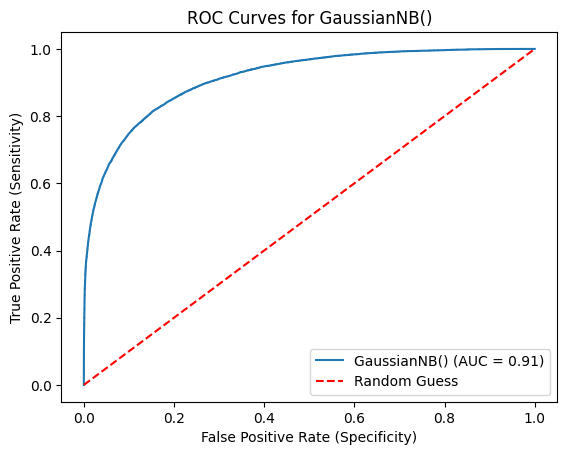

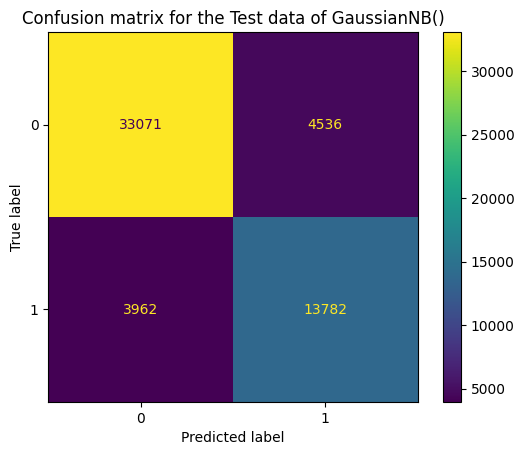

Best Parameters: {'preprocessor__discretizer__n_bins': np.int64(10), 'preprocessor__discretizer__strategy': 'kmeans'}
Best CV Accuracy: 0.8234063983714746

Classification Report for :BernoulliNB()
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     37607
           1       0.74      0.68      0.71     17744

    accuracy                           0.82     55351
   macro avg       0.80      0.78      0.79     55351
weighted avg       0.82      0.82      0.82     55351



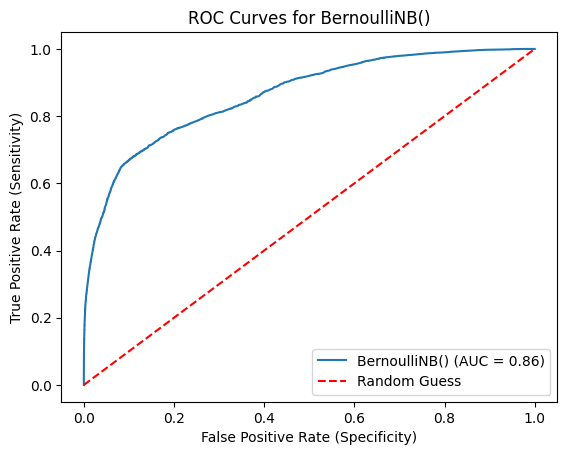

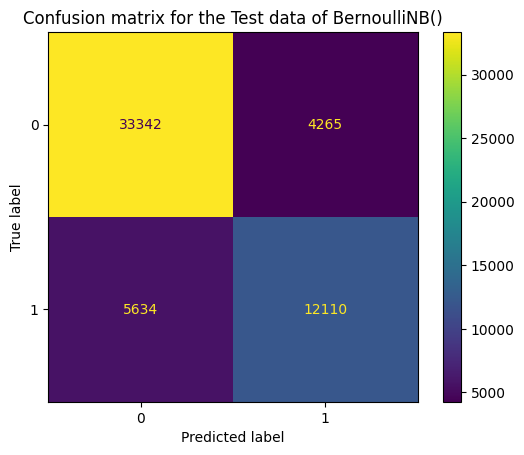

d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Εργασια\Ebay_sales\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


Best Parameters: {'preprocessor__discretizer__n_bins': np.int64(8), 'preprocessor__discretizer__strategy': 'quantile'}
Best CV Accuracy: 0.8482978772321392

Classification Report for :CategoricalNB()
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     37607
           1       0.78      0.74      0.76     17744

    accuracy                           0.85     55351
   macro avg       0.83      0.82      0.82     55351
weighted avg       0.85      0.85      0.85     55351



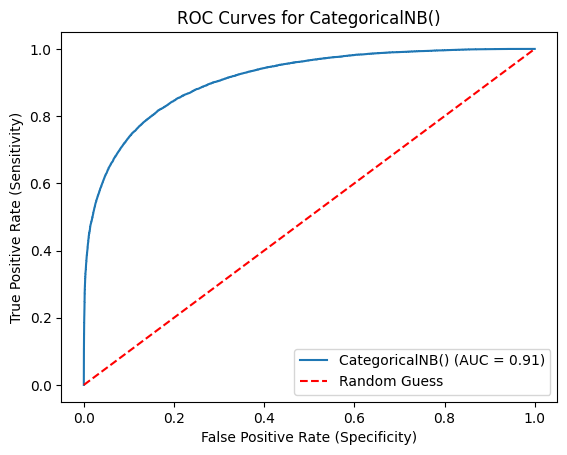

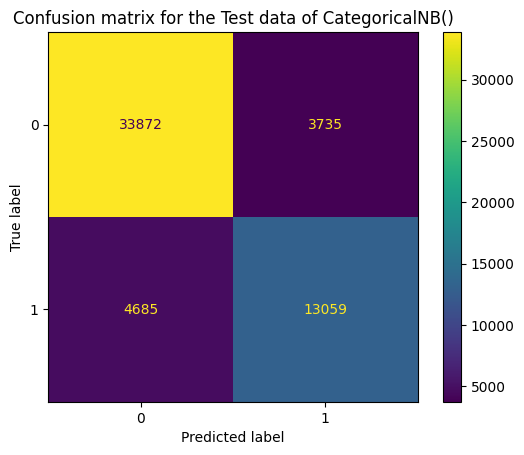

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Function to compute all of the diff kinds of naive bayes
def predictions(df_con, naive_tech):
        X = df_con.drop('QuantitySold', axis=1)
        y = df_con['QuantitySold']

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        for key,model in naive_tech.items(): 
            # Aplly discretizer only in continuous data
            preprocessor = ColumnTransformer(
                transformers=[
                    ('discretizer', KBinsDiscretizer(encode='ordinal'), cont_data),
                    ('cat',OneHotEncoder(handle_unknown='ignore'),['EndDay'])
                ],
                remainder='passthrough'  # leave other columns as they are
            )

            # Create pipeline
            pipe1 = Pipeline([
                ('preprocessor', preprocessor),
                ('model', model)
            ])

            # Parameter grid for GridSearchCV
            params = {
                'preprocessor__discretizer__strategy': ['uniform', 'quantile', 'kmeans'],
                'preprocessor__discretizer__n_bins': np.arange(2, 11)
            }

            # Stratified K-Fold cross-validation
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            # GridSearch to find best discretization settings
            gsc = GridSearchCV(pipe1, params, cv=cv, scoring='accuracy', n_jobs=-1) # n_jobs = -1 in order get only the results
            gsc.fit(X_train, y_train)

            # Best hyperparameters
            print("Best Parameters:", gsc.best_params_)
            print("Best CV Accuracy:", gsc.best_score_)

            # Predict on test set using best model
            best_model = gsc.best_estimator_
            y_pred = best_model.predict(X_test)
            y_pred_prob = best_model.predict_proba(X_test)[:, 1]

            # Evaluate performance
            acc_score = accuracy_score(y_test, y_pred)
            auc_score = roc_auc_score(y_test, y_pred_prob)

            print("="*20)
            print(f"\nClassification Report for :{model}")
            print(classification_report(y_test, y_pred))
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
            # Plot the red line
            plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

            plt.xlabel('False Positive Rate (Specificity)')
            plt.ylabel('True Positive Rate (Sensitivity)')
            plt.title(f'ROC Curves for {model}')
            plt.legend()
            plt.tight_layout
            plt.show()

            # Plot Confusion matrix on ax[1]
            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot()
            plt.title(f'Confusion matrix for the Test data of {model}')
            plt.tight_layout
            plt.show()
            
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
naive_tech = {'cnb': ComplementNB(),
              'GaussianNB':GaussianNB(),
              'BernoulliNB': BernoulliNB(),
              'CategoricalNB': CategoricalNB()}

predictions(df_con,naive_tech)